# **Import Library**#


In [ ]:
!pip install category-encoders
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from datetime import datetime
from operator import attrgetter
import calendar

import seaborn as sns
import matplotlib.pyplot as plt
#from wordcloud import WordCloud

import warnings
warnings.filterwarnings( 'ignore' )

sns.set(style='darkgrid')
plt.rcParams["figure.figsize"] = (15,7)


# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import category_encoders as ce

pd.options.display.max_columns = None

#**Import Dataset**

In [ ]:
products = pd.read_csv("/content/olist_products_dataset.csv")
prod_cat_name_tr = pd.read_csv("/content/product_category_name_translation.csv")
items = pd.read_csv("/content/olist_order_items_dataset.csv")
orders = pd.read_csv("/content/olist_orders_dataset.csv")
reviews = pd.read_csv("/content/olist_order_reviews_dataset.csv")
geoloc = pd.read_csv("/content/olist_geolocation_dataset.csv")
sellers = pd.read_csv("/content/olist_sellers_dataset.csv")
payments = pd.read_csv("/content/olist_order_payments_dataset.csv")
customers = pd.read_csv("/content/olist_customers_dataset.csv")

# Dataset

In [ ]:
#ganti nama produk ke dalam bahasa inggris
products

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

In [ ]:
prod_cat_name_tr

product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]

In [ ]:
products = products.merge(prod_cat_name_tr, on='product_category_name', how='left')

In [ ]:
products.drop ('product_category_name', axis=1, inplace=True)

In [ ]:
products

product_id  product_name_lenght  \
0      1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1      3aa071139cb16b67ca9e5dea641aaa2f                 44.0   
2      96bd76ec8810374ed1b65e291975717f                 46.0   
3      cef67bcfe19066a932b7673e239eb23d                 27.0   
4      9dc1a7de274444849c219cff195d0b71                 37.0   
...                                 ...                  ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                 45.0   
32947  bf4538d88321d0fd4412a93c974510e6                 41.0   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                 50.0   
32949  83808703fc0706a22e264b9d75f04a2e                 60.0   
32950  106392145fca363410d287a815be6de4                 58.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
0                           287.0                 1.0             225.0   
1                           276.0                 1.0            1000.0   
2                           250.0                 1.0             154.0   
3                           261.0                 1.0             371.0   
4                           402.0                 4.0             625.0   
...                           ...                 ...               ...   
32946                        67.0                 2.0           12300.0   
32947                       971.0                 1.0            1700.0   
32948                       799.0                 1.0            1400.0   
32949                       156.0                 2.0             700.0   
32950                       309.0                 1.0            2083.0   

       product_length_cm  product_height_cm  product_width_cm  \
0                   16.0               10.0              14.0   
1                   30.0               18.0              20.0   
2                   18.0                9.0              15.0   
3                   26.0                4.0              26.0   
4                   20.0               17.0              13.0   
...                  ...                ...               ...   
32946               40.0               40.0              40.0   
32947               16.0               19.0              16.0   
32948               27.0                7.0              27.0   
32949               31.0               13.0              20.0   
32950               12.0                2.0               7.0   

      product_category_name_english  
0                         perfumery  
1                               art  
2                    sports_leisure  
3                              baby  
4                        housewares  
...                             ...  
32946               furniture_decor  
32947     construction_tools_lights  
32948                bed_bath_table  
32949         computers_accessories  
32950                bed_bath_table  

[32951 rows x 9 columns]

In [ ]:
display(products.head(),orders.head(),items.head(),reviews.head(),geoloc.head(),sellers.head(),payments.head(),customers.head(),)

product_id  product_name_lenght  \
0  1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1  3aa071139cb16b67ca9e5dea641aaa2f                 44.0   
2  96bd76ec8810374ed1b65e291975717f                 46.0   
3  cef67bcfe19066a932b7673e239eb23d                 27.0   
4  9dc1a7de274444849c219cff195d0b71                 37.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       287.0                 1.0             225.0   
1                       276.0                 1.0            1000.0   
2                       250.0                 1.0             154.0   
3                       261.0                 1.0             371.0   
4                       402.0                 4.0             625.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               16.0               10.0              14.0   
1               30.0               18.0              20.0   
2               18.0                9.0              15.0   
3               26.0                4.0              26.0   
4               20.0               17.0              13.0   

  product_category_name_english  
0                     perfumery  
1                           art  
2                sports_leisure  
3                          baby  
4                    housewares

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

#Gabungkan semua table

In [ ]:
olist = orders.merge(items, on='order_id', how='left')
olist = olist.merge(payments, on='order_id', how='outer')
olist = olist.merge(reviews, on='order_id', how='outer')
olist = olist.merge(products, on='product_id', how='outer')
olist = olist.merge(customers, on='customer_id', how='outer')
olist = olist.merge(sellers, on='seller_id', how='outer')

In [ ]:
olist['product_category_name_english'].value_counts()

product_category_name_english
bed_bath_table               11988
health_beauty                10032
sports_leisure                9004
furniture_decor               8832
computers_accessories         8150
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: count, Length: 71, dtype: int64

In [ ]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

In [ ]:
olist.describe()

order_item_id          price  freight_value  payment_sequential  \
count  118310.000000  118310.000000  118310.000000       119140.000000   
mean        1.196543     120.646603      20.032387            1.094737   
std         0.699489     184.109691      15.836850            0.730141   
min         1.000000       0.850000       0.000000            1.000000   
25%         1.000000      39.900000      13.080000            1.000000   
50%         1.000000      74.900000      16.280000            1.000000   
75%         1.000000     134.900000      21.180000            1.000000   
max        21.000000    6735.000000     409.680000           29.000000   

       payment_installments  payment_value   review_score  \
count         119140.000000  119140.000000  118146.000000   
mean               2.941246     172.735135       4.015582   
std                2.777848     267.776077       1.400436   
min                0.000000       0.000000       1.000000   
25%                1.000000      60.850000       4.000000   
50%                2.000000     108.160000       5.000000   
75%                4.000000     189.240000       5.000000   
max               24.000000   13664.080000       5.000000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count        116601.000000               116601.000000       116601.000000   
mean             48.767498                  785.967822            2.205161   
std              10.033540                  652.584121            1.717452   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  346.000000            1.000000   
50%              52.000000                  600.000000            1.000000   
75%              57.000000                  983.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count     118290.000000      118290.000000      118290.000000   
mean        2112.250740          30.265145          16.619706   
std         3786.695111          16.189367          13.453584   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1800.000000          38.000000          20.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  customer_zip_code_prefix  seller_zip_code_prefix  
count     118290.000000             119143.000000           118310.000000  
mean          23.074799              35033.451298            24442.410413  
std           11.749139              29823.198969            27573.004511  
min            6.000000               1003.000000             1001.000000  
25%           15.000000              11250.000000             6429.000000  
50%           20.000000              24240.000000            13660.000000  
75%           30.000000              58475.000000            27972.000000  
max          118.000000              99990.000000            99730.000000

# Data Cleansing

**Perbaiki Info Kolom**

In [ ]:
olist['order_purchase_timestamp'] = pd.to_datetime(olist.order_purchase_timestamp)
olist['order_approved_at'] = pd.to_datetime(olist.order_approved_at)
olist['order_delivered_carrier_date'] = pd.to_datetime(olist.order_delivered_carrier_date)
olist['order_delivered_customer_date'] = pd.to_datetime(olist.order_delivered_customer_date)
olist['order_estimated_delivery_date'] = pd.to_datetime(olist.order_estimated_delivery_date)
olist['shipping_limit_date'] = pd.to_datetime(olist.shipping_limit_date)
olist['review_creation_date'] = pd.to_datetime(olist.review_creation_date)

In [ ]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   order_item_id                  118310 non-null  float64       
 9   product_id                     118310 non-null  object        
 10  seller_id                      118310 non-null  object        
 11  

In [ ]:
olist.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
product_name_lenght                2542
product_description_lenght         2542
product_photos_qty                 2542
product_weight_g                    853
product_length_cm                   853
product_height_cm                   853
product_width_cm                    853
product_category_name_english      2567
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
seller_zip_code_prefix              833
seller_city                         833
seller_state                        833
dtype: int64

In [ ]:
olist['review_comment_title'].isna().sum()/olist.shape[0]

np.float64(0.8825864717188588)

In [ ]:
df=olist.copy()

In [ ]:
df.drop(columns=['review_comment_title','review_comment_message','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','seller_zip_code_prefix','seller_city'],axis=1,inplace=True)

Kolom-kolom yang kita drop adalah kolom-kolom yang tidak digunakan, review title dan review comment memiliki missing value diatas 85% dan menggunakan bahasa portugis. Sedangkan kolom seller juga kita drop karena fokus kita untuk menganalisa customer segmentation jadi kita tidak menggunakan kolom-kolom seller tersebut

# Handling Duplicates Data and Missing Value

In [ ]:
df.head()

order_id                       customer_id  \
0  d455a8cb295653b55abda06d434ab492  944b72539d7e1f7f7fc6e46639ef1fe3   
1  7f39ba4c9052be115350065d07583cac  d7fc82cbeafea77bd0a8fbbf6296e387   
2  9dc8d1a6f16f1b89874c29c9d8d30447  d9442164acf4b03109425633efaa0cfc   
3  0f548bd29148ebc519d6495e37a284e1  015faf9ec36eccd957c0f2782aab09a4   
4  0f548bd29148ebc519d6495e37a284e1  015faf9ec36eccd957c0f2782aab09a4   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-09-26 22:17:05 2017-09-27 22:24:16   
1    delivered      2017-10-18 08:16:34 2017-10-18 23:56:20   
2    delivered      2017-10-12 13:33:22 2017-10-12 13:49:22   
3    delivered      2017-09-03 08:06:30 2017-09-03 08:25:50   
4    delivered      2017-09-03 08:06:30 2017-09-03 08:25:50   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-09-29 15:53:03           2017-10-07 16:12:47   
1          2017-10-20 14:29:01           2017-10-27 16:46:05   
2          2017-10-17 15:42:42           2017-10-24 20:17:44   
3          2017-09-04 22:03:06           2017-09-08 16:26:55   
4          2017-09-04 22:03:06           2017-09-08 16:26:55   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-30            1.0   
1                    2017-11-09            1.0   
2                    2017-11-06            1.0   
3                    2017-09-27            1.0   
4                    2017-09-27            2.0   

                         product_id                         seller_id  \
0  a2ff5a97bf95719e38ea2e3b4105bce8  0015a82c2db000af6aaaf3ae2ecb0532   
1  a2ff5a97bf95719e38ea2e3b4105bce8  0015a82c2db000af6aaaf3ae2ecb0532   
2  a2ff5a97bf95719e38ea2e3b4105bce8  0015a82c2db000af6aaaf3ae2ecb0532   
3  08574b074924071f4e201e151b152b4e  001cca7ae9ae17fb1caed9dfb1094831   
4  08574b074924071f4e201e151b152b4e  001cca7ae9ae17fb1caed9dfb1094831   

  shipping_limit_date  price  freight_value  payment_sequential payment_type  \
0 2017-10-12 22:24:16  895.0          21.02                 1.0  credit_card   
1 2017-10-24 23:56:20  895.0          21.02                 1.0  credit_card   
2 2017-10-18 14:49:22  895.0          21.02                 1.0  credit_card   
3 2017-09-08 08:25:50   99.0          33.08                 1.0  credit_card   
4 2017-09-08 08:25:50   99.0          33.08                 1.0  credit_card   

   payment_installments  payment_value                         review_id  \
0                  10.0         916.02  f6923b4d17e0f4e87b38cb26c758d3c6   
1                   8.0         916.02  2abb25fde5aafe9bc85d031dffb2f4ac   
2                   4.0         916.02  799c3e3362ac0d09cfa1b39b51647490   
3                   2.0         264.16  f402ea966112bd28646760b72d7f677f   
4                   2.0         264.16  f402ea966112bd28646760b72d7f677f   

   review_score review_creation_date review_answer_timestamp  \
0           5.0           2017-10-08     2017-10-11 21:42:45   
1           1.0           2017-10-28     2017-10-28 14:32:42   
2           5.0           2017-10-25     2017-10-25 23:15:15   
3           5.0           2017-09-09     2017-09-09 20:51:47   
4           5.0           2017-09-09     2017-09-09 20:51:47   

  product_category_name_english                customer_unique_id  \
0              small_appliances  3c7e305796add66698959fc7ad176f6b   
1              small_appliances  9de5797cddb92598755a0f76383ddbbb   
2              small_appliances  9915eb9f74b6c11aaf04833f65b00e93   
3                  garden_tools  dce323533e45e74d215e0fe7fb114118   
4                  garden_tools  dce323533e45e74d215e0fe7fb114118   

   customer_zip_code_prefix        customer_city customer_state seller_state  
0                     87502             umuarama             PR           SP  
1                     35490  entre rios de minas             MG           SP  
2                     38600             paracatu             MG           SP  
3                     24710   

In [ ]:
df[df.duplicated(['order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date','payment_sequential'])==True]

order_id                       customer_id  \
4       0f548bd29148ebc519d6495e37a284e1  015faf9ec36eccd957c0f2782aab09a4   
14      226e16e7eb6dcefe180d80127468de8b  1063de5cc98f570e53eccb32723746e2   
16      42aaabf39b810fa0a3390fe791dbb880  11259004e69dac0f64c28698b2e702d3   
19      f585ab48a4d0027744dd2912cb42a2cb  133d446a88638f9aa5aac7f8c5e5164b   
22      0aed18a03ea2ccdb5981aea3524b304d  186d5e15485ff2afa04f02bd00aee4a4   
...                                  ...                               ...   
118251  ab2a998670fda3ed78ed05b73fa62ef9  6dde1019a8b279889cf5599591d096ce   
118263  ece1fa4a929c6a0e8b6678e10b2ac642  a4c800a16c71d3bb4b77665ba11d8525   
118517  151e44f3dd461fe0838b6f59f884749f  4874fe3c17665962a71cdcdf3f9cd9a0   
118631  02e723e8edb4a123d414f56cc9c4665e  6e9f7d9e943f9c0bdea278d9d7a1c9b9   
119106  ceb533871105f7cda81fafc19e1ee38e  f86da6175d72ff2d6a9de63342e1d303   

       order_status order_purchase_timestamp   order_approved_at  \
4         delivered      2017-09-03 08:06:30 2017-09-03 08:25:50   
14        delivered      2017-12-06 16:52:25 2017-12-06 17:13:09   
16        delivered      2017-03-17 14:22:50 2017-03-17 14:22:50   
19        delivered      2017-10-08 18:04:57 2017-10-09 09:49:34   
22        delivered      2017-09-08 12:16:48 2017-09-12 04:55:21   
...             ...                      ...                 ...   
118251    delivered      2017-11-11 16:59:40 2017-11-11 17:15:32   
118263    delivered      2017-11-26 17:44:33 2017-11-26 18:30:56   
118517  unavailable      2018-02-22 16:06:11 2018-02-24 02:55:40   
118631     canceled      2017-08-18 14:30:19                 NaT   
119106  unavailable      2017-10-20 07:33:11 2017-10-21 03:07:36   

       order_delivered_carrier_date order_delivered_customer_date  \
4               2017-09-04 22:03:06           2017-09-08 16:26:55   
14              2017-12-07 19:41:35           2017-12-28 21:48:58   
16              2017-03-22 10:20:38           2017-03-31 11:47:39   
19              2017-10-16 18:35:55           2017-10-23 20:53:58   
22              2017-09-13 22:23:41           2017-09-23 01:23:34   
...                             ...                           ...   
118251          2017-11-13 22:27:05           2017-11-21 16:22:22   
118263          2017-11-28 21:22:11           2017-12-07 15:07:05   
118517                          NaT                           NaT   
118631                          NaT                           NaT   
119106                          NaT                           NaT   

       order_estimated_delivery_date  order_item_id  \
4                         2017-09-27            2.0   
14                        2018-01-08            2.0   
16                        2017-04-07            2.0   
19                        2017-11-03            2.0   
22                        2017-10-03            1.0   
...                              ...            ...   
118251                    2017-12-04            1.0   
118263                    2017-12-20            2.0   
118517                    2018-03-19            NaN   
118631                    2017-09-21            NaN   
119106                    2017-11-10            NaN   

                              product_id                         seller_id  \
4       08574b074924071f4e201e151b152b4e  001cca7ae9ae17fb1caed9dfb1094831   
14      08574b074924071f4e201e151b152b4e  001cca7ae9ae17fb1caed9dfb1094831   
16      e251ebd2858be1aa7d9b2087a6992580  001cca7ae9ae17fb1caed9dfb1094831   
19      08574b074924071f4e201e151b152b4e  001cca7ae9ae17fb1caed9dfb1094831   
22      98a8c2fa16d7239c606640f5555768e4  001cca7ae9ae17fb1caed9dfb1094831   
...                                  ...                               ...   
118251  d43c65f300c5cfaae005f1f954fc0b15  fffd5413c0700ac820c7069d66d98c89   
118263  8ddbf2c953e42ed2a627c4ac08706bc2  fffd5413c0700ac820c7069d66d98c89   
118517                               NaN                               NaN   
118631  

In [ ]:
df.iloc[64:66] #menunjukan data duplicate

order_id                       customer_id  \
64  ac3fcd67437432bd0f3a05aade719e7b  3f1ea323922032ac23b7ef91f69a95a3   
65  58faef88b9fbcce2db4d1b68bdb0c2a3  4062747ee07fe2bcd812937bbfc4304f   

   order_status order_purchase_timestamp   order_approved_at  \
64      shipped      2017-05-02 15:23:09 2017-05-03 15:31:52   
65    delivered      2017-03-23 21:08:47 2017-03-23 21:22:42   

   order_delivered_carrier_date order_delivered_customer_date  \
64          2017-05-04 11:50:39                           NaT   
65          2017-03-28 14:05:23           2017-04-04 09:32:54   

   order_estimated_delivery_date  order_item_id  \
64                    2017-05-25            1.0   
65                    2017-04-13            1.0   

                          product_id                         seller_id  \
64  08574b074924071f4e201e151b152b4e  001cca7ae9ae17fb1caed9dfb1094831   
65  547b95702aec86f05ac37e61d164891c  001cca7ae9ae17fb1caed9dfb1094831   

   shipping_limit_date  price  freight_value  payment_sequential payment_type  \
64 2017-05-09 15:30:08  135.0          31.69                 1.0  credit_card   
65 2017-03-29 21:22:42   99.5          32.98                 1.0  credit_card   

    payment_installments  payment_value                         review_id  \
64                   3.0         166.69  c85222ec2ed67542ddf2b33bd848cea6   
65                  10.0         529.92  11caf9720507b40da458d09dfef17f87   

    review_score review_creation_date review_answer_timestamp  \
64           1.0           2017-05-28     2017-05-28 12:28:45   
65           1.0           2017-04-05     2017-04-05 23:53:24   

   product_category_name_english                customer_unique_id  \
64                  garden_tools  18aef158fe07c1e9ca8e1a5e3b7b723a   
65                  garden_tools  cb7b0a31f4d257be90adf28f7a0afc47   

    customer_zip_code_prefix       customer_city customer_state seller_state  
64                     25585  sao joao de meriti             RJ           ES  
65                     37120           paraguacu             MG           ES

In [ ]:
df=df.drop_duplicates(subset={'order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date','payment_sequential'},keep='first').reset_index(drop=True)

terdapat 15.256 data duplicate yang kita drop, karena sisa nya memiliki payment menthod dan payment sequential yang berbeda sehingga payment value nya berbeda sedangkan 15.256 data yang kita drop memiliki payment value yang sama karena payment sequential dan payment type nya sama

<Axes: >

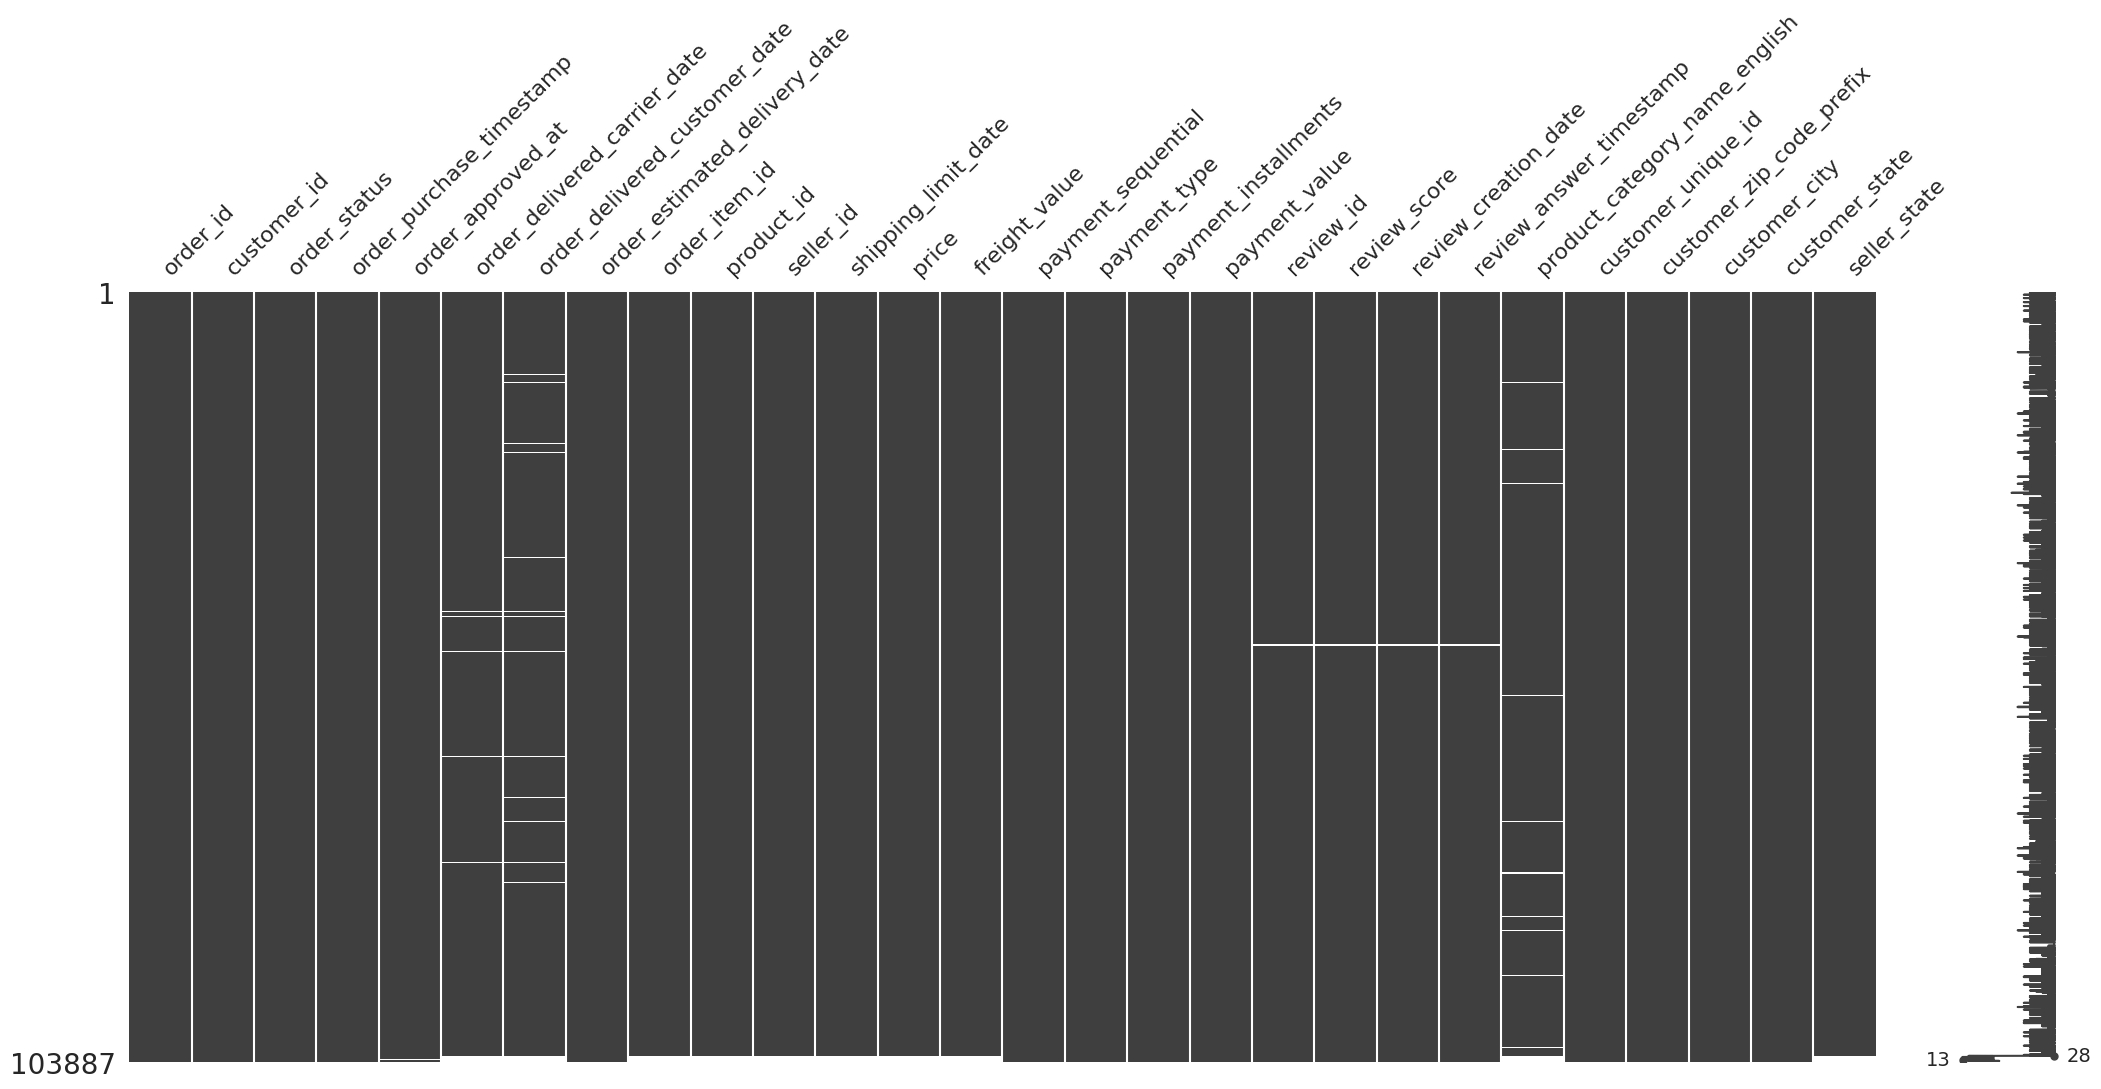

In [ ]:
missingno.matrix(df)

<Axes: >

<Figure size 1200x1200 with 0 Axes>

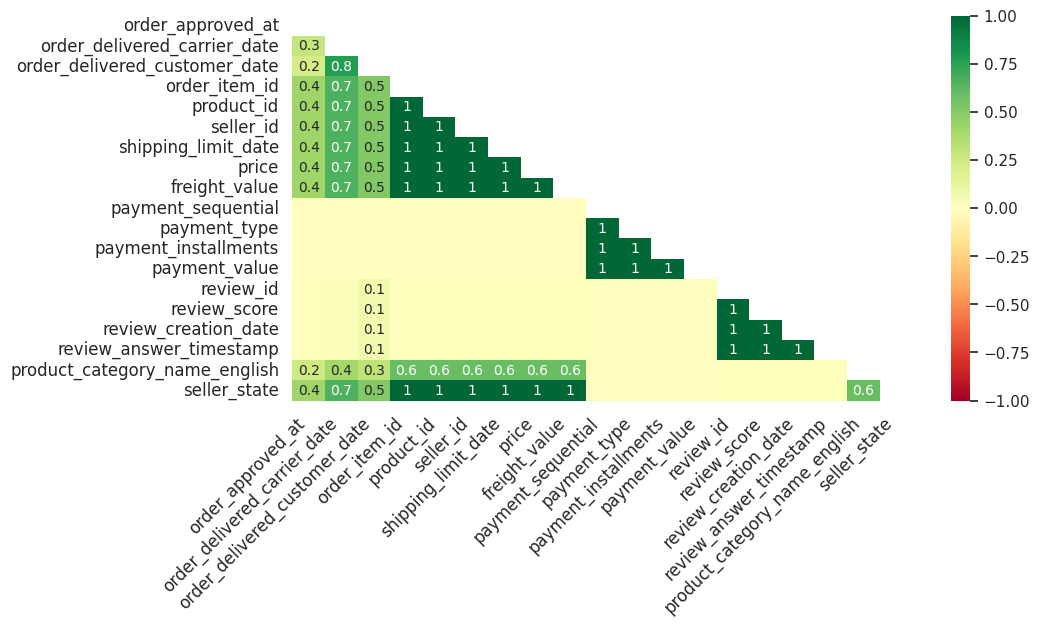

In [ ]:
plt.figure(figsize=(12,12))
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12)

Jika dilihat dari heatmap diatas, missing value pada dataset ini memiliki korelasi satu sama lain yaitu order yang statusnya belum sampai atau selain `delivered`. Mayoritas dari missing value diatas adalah tipe data timestamp karena itu handling missing value dilakukan dengan cara di drop.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape[0]

98620

In [ ]:
df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
product_category_name_english    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
seller_state                     0
dtype: int64

# EDA

In [ ]:
mais_vendidos = df.groupby(['product_category_name_english'], as_index=False)['customer_state'].count().rename( columns = {'customer_state':'total'})
# calculo porcentagem
mais_vendidos['%'] = round((mais_vendidos['total'] / mais_vendidos['total'].sum()) * 100, 2)
mais_vendidos.nlargest(3, 'total')

#Which product categories have the most sales?

product_category_name_english  total     %
7                 bed_bath_table   9622  9.76
43                 health_beauty   8839  8.96
65                sports_leisure   7716  7.82

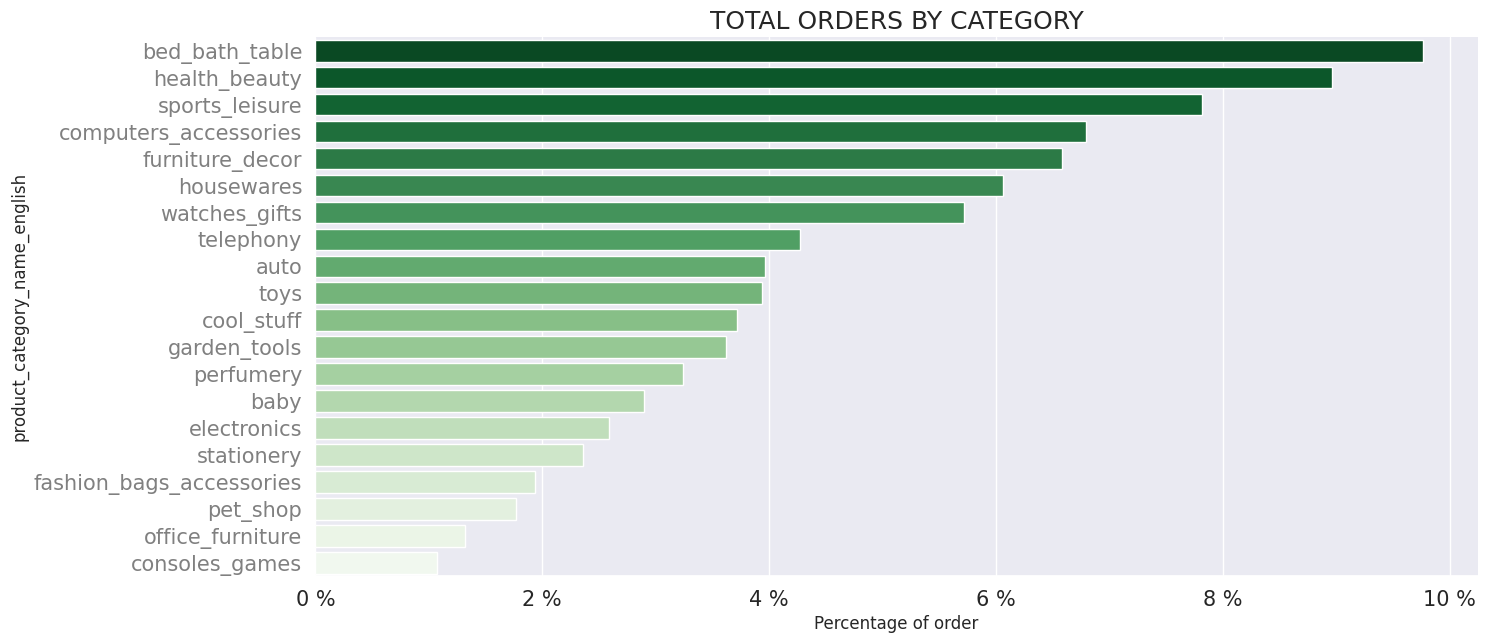

In [ ]:
g = sns.barplot(y='product_category_name_english', x='%', palette='Greens_r', data=mais_vendidos.nlargest(20, '%'))

plt.title('TOTAL ORDERS BY CATEGORY', size=18)
plt.yticks(fontsize=15, color='gray');
plt.xticks([0,2,4,6,8,10],['0 %', '2 %', '4 %', '6 %', '8 %', '10 %'], fontsize=15);
plt.xlabel("Percentage of order");
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)

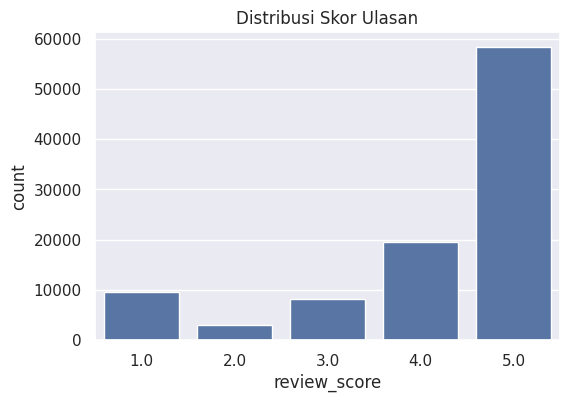

In [ ]:
# Memeriksa Distribusi Nilai Kolom Skor Ulasan
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='review_score')
plt.title('Distribusi Skor Ulasan')
plt.show()

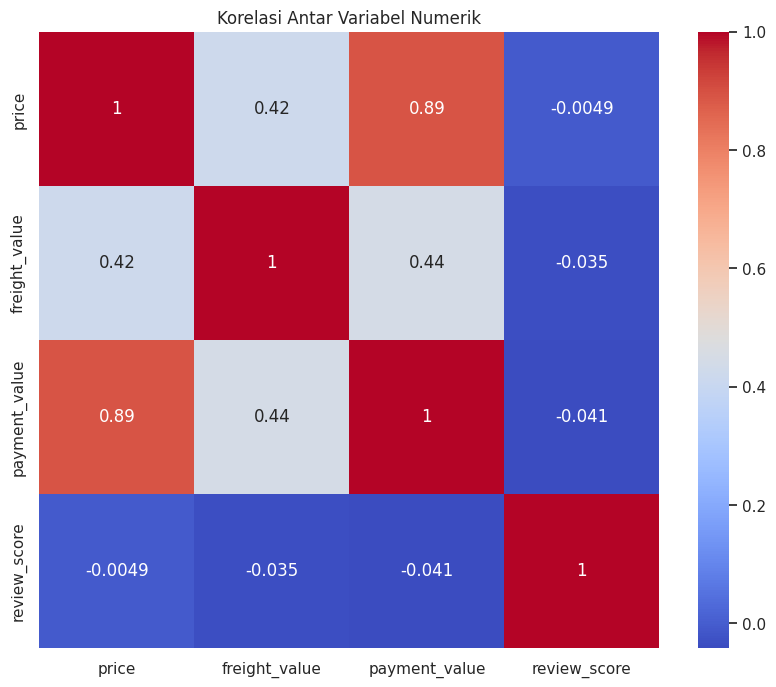

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['price', 'freight_value', 'payment_value', 'review_score']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

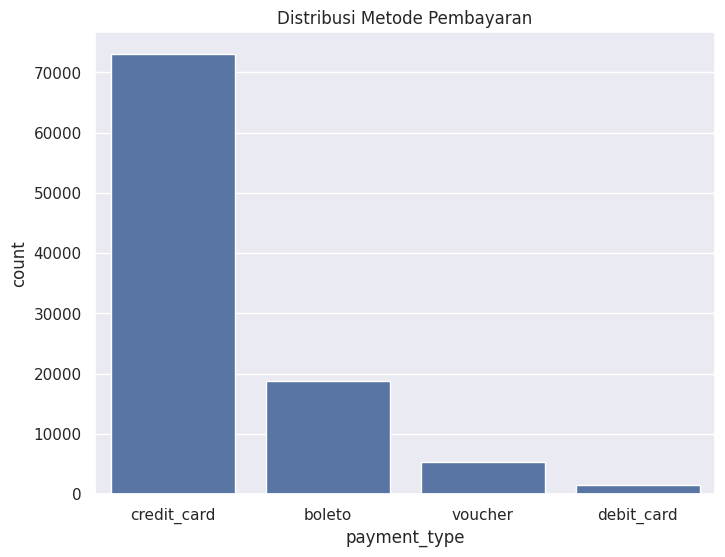

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='payment_type', order=df['payment_type'].value_counts().index)
plt.title('Distribusi Metode Pembayaran')
plt.show()

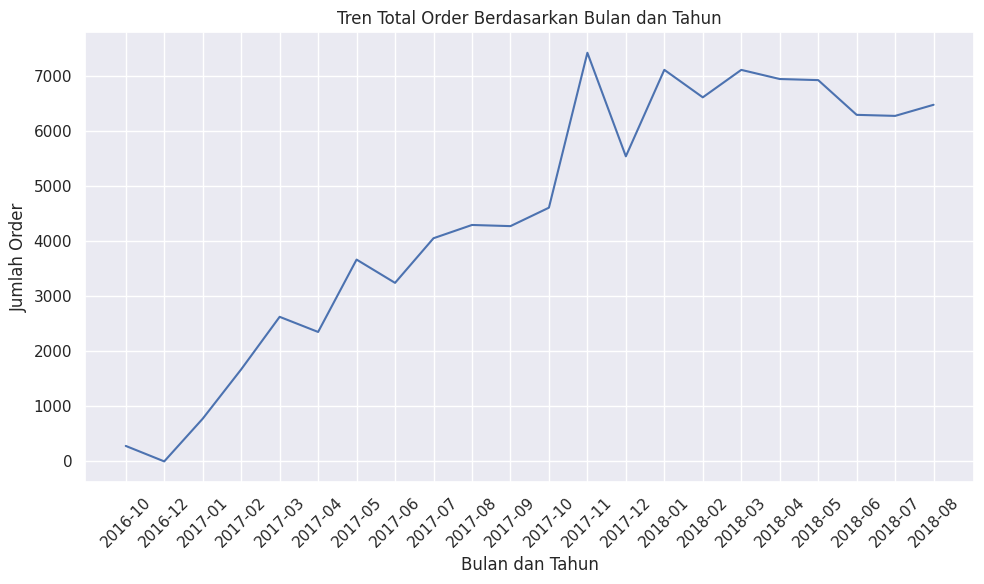

In [ ]:
# Membuat kolom baru untuk bulan dan tahun dari tanggal pesanan
df['order_month_year'] = df['order_purchase_timestamp'].dt.to_period('M')

# Menghitung jumlah pesanan per bulan dan tahun
monthly_order_trend = df.groupby('order_month_year').size()

# Visualisasi tren total pesanan dari waktu ke waktu
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_order_trend.index.astype(str), y=monthly_order_trend.values)
plt.title("Tren Total Order Berdasarkan Bulan dan Tahun")
plt.xlabel("Bulan dan Tahun")
plt.ylabel("Jumlah Order")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cohort Analyst

In [ ]:
df_cohort=df.copy()

In [ ]:
df_cohort.sort_values(by='order_purchase_timestamp', inplace=True)

In [ ]:
df_cohort['cohort_month']=df_cohort.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')

In [ ]:
df_cohort['current_month']=df_cohort['order_purchase_timestamp'].dt.to_period('M')

In [ ]:
df_cohort['current_month'].nunique()

22

In [ ]:
df_cohort.head()

order_id                       customer_id  \
33514  3b697a20d9e427646d92567910af6d57  355077684019f7f60a031656bd7262b8   
97164  be5bc2f0da14d8071e2d45451ad119d9  7ec40b22510fdbea1b08921dd39e63d8   
96049  65d1e226dfaeb8cdc42f665422522d14  70fc57eeae292675927697fe03ad3ff5   
26466  a41c8759fbe7aab36ea07e038b2d4465  6f989332712d3222b6571b1cf5b835ce   
82359  d207cc272675637bfed0062edffd0818  b8cf418e97ae795672d326288dfab7a7   

      order_status order_purchase_timestamp   order_approved_at  \
33514    delivered      2016-10-03 09:44:50 2016-10-06 15:50:54   
97164    delivered      2016-10-03 16:56:50 2016-10-06 16:03:44   
96049     canceled      2016-10-03 21:01:41 2016-10-04 10:18:57   
26466    delivered      2016-10-03 21:13:36 2016-10-05 03:11:49   
82359    delivered      2016-10-03 22:06:03 2016-10-04 10:28:07   

      order_delivered_carrier_date order_delivered_customer_date  \
33514          2016-10-23 14:02:13           2016-10-26 14:02:13   
97164          2016-10-21 16:33:46           2016-10-27 18:19:38   
96049          2016-10-25 12:14:28           2016-11-08 10:58:34   
26466          2016-10-25 11:57:59           2016-11-03 10:58:07   
82359          2016-10-21 14:23:37           2016-10-31 11:07:42   

      order_estimated_delivery_date  order_item_id  \
33514                    2016-10-27            1.0   
97164                    2016-11-07            1.0   
96049                    2016-11-25            1.0   
26466                    2016-11-29            1.0   
82359                    2016-11-23            1.0   

                             product_id                         seller_id  \
33514  3ae08df6bcbfe23586dd431c40bddbb7  522620dcb18a6b31cd7bdf73665113a9   
97164  fd7fd78fd3cbc1b0a6370a7909c0a629  f09b760d23495ac9a7e00d29b769007c   
96049  9c7bdf67b06b419aefb93cfdfc96c55d  ed49da7cadefc454d6a67de249eab240   
26466  b72b39418216e944bb34e35f4d3ea8c7  45d33f715e24d15a6ccf5c17b3a23e3c   
82359  107177bf61755f05c604fe57e02467d6  cca3071e3e9bb7d12640c9fbe2301306   

      shipping_limit_date   price  freight_value  payment_sequential  \
33514 2016-10-21 16:27:20   29.90          15.56                 1.0   
97164 2016-10-21 16:33:46   21.90          17.19                 1.0   
96049 2016-10-21 16:24:43   21.50          14.11                 1.0   
26466 2016-10-21 16:18:26   36.49          17.24                 1.0   
82359 2016-10-21 16:23:06  119.90          13.56                 1.0   

      payment_type  payment_installments  payment_value  \
33514       boleto                   1.0          45.46   
97164       boleto                   1.0          39.09   
96049  credit_card                   1.0          35.61   
26466       boleto                   1.0          53.73   
82359  credit_card                   6.0         133.46   

                              review_id  review_score review_creation_date  \
33514  9fe0f66724df77fd63fcc0c94a323978           4.0           2016-10-26   
97164  dc62f1e20d7f280e54066b6a92841086           4.0           2016-10-28   
96049  f9fe37d91c506b29a0b4d9107f667bde           1.0           2016-11-09   
26466  657654f17abc5a7ce8290f148efb3dd3           3.0           2016-11-04   
82359  444d04d7ca0131b3b40619f81d0facd5           1.0           2016-11-01   

      review_answer_timestamp product_category_name_english  \
33514     2016-10-30 21:32:15                 watches_gifts   
97164     2016-10-29 11:29:53                sports_leisure   
96049     2016-11-09 21:04:42                sports_leisure   
26466     2016-11-04 23:45:17                sports_leisure   
82359     2016-11-02 16:52:00               furniture_decor   

                     customer_unique_id  customer_zip_code_prefix  \
33514  32ea3bdedab835c3aa6cb68ce66565ef                      4106   
97164  2f64e403852e6893ae37485d5fcacdaf                     98280   
96049  b8b8726af116a5cfb35b0315ecef9172                     22770   
26466  61db744d2f835035a5625b59350c6b63                 

In [ ]:
df_cohort=df_cohort.groupby(['cohort_month','current_month']).agg(n_customer=('customer_unique_id','nunique')).reset_index()

In [ ]:
df_cohort.head()

cohort_month current_month  n_customer
0      2016-10       2016-10         262
1      2016-10       2017-04           1
2      2016-10       2017-07           1
3      2016-10       2017-09           1
4      2016-10       2017-11           1

In [ ]:
(df_cohort['current_month']-df_cohort['cohort_month']).apply(attrgetter('n'))

0       0
1       6
2       9
3      11
4      13
       ..
212     1
213     2
214     0
215     1
216     0
Length: 217, dtype: int64

In [ ]:
df_cohort['period']=(df_cohort['current_month']-df_cohort['cohort_month']).apply(attrgetter('n'))

In [ ]:
df_cohort.head()

cohort_month current_month  n_customer  period
0      2016-10       2016-10         262       0
1      2016-10       2017-04           1       6
2      2016-10       2017-07           1       9
3      2016-10       2017-09           1      11
4      2016-10       2017-11           1      13

In [ ]:
cohort_pivot=df_cohort.pivot_table(index='cohort_month',columns='period',values='n_customer')
cohort_pivot

period            0     1     2     3     4     5     6     7     8     9   \
cohort_month                                                                 
2016-10        262.0   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   1.0   
2016-12          1.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-01        697.0   2.0   2.0   1.0   3.0   1.0   3.0   1.0   NaN   NaN   
2017-02       1560.0   3.0   5.0   1.0   7.0   2.0   4.0   3.0   1.0   3.0   
2017-03       2438.0  11.0   9.0   9.0   9.0   4.0   4.0   8.0   8.0   2.0   
2017-04       2181.0  14.0   5.0   4.0   6.0   6.0   7.0   7.0   7.0   4.0   
2017-05       3345.0  16.0  15.0  10.0   9.0  11.0  14.0   5.0   7.0   7.0   
2017-06       2963.0  15.0  11.0  11.0   9.0  11.0  10.0   6.0   4.0   5.0   
2017-07       3676.0  20.0  12.0   9.0  10.0   8.0  11.0   4.0   7.0  10.0   
2017-08       3972.0  27.0  14.0  11.0  13.0  21.0  11.0  10.0   6.0   6.0   
2017-09       3921.0  27.0  20.0  11.0  18.0   8.0   9.0  10.0  11.0   7.0   
2017-10       4246.0  29.0  11.0   3.0   9.0   8.0   9.0  15.0  12.0   8.0   
2017-11       6913.0  39.0  26.0  10.0  11.0  12.0   8.0  13.0   8.0   4.0   
2017-12       5166.0   9.0  15.0  17.0  12.0  11.0   8.0   1.0  10.0   NaN   
2018-01       6629.0  21.0  25.0  20.0  20.0  11.0  12.0  15.0   NaN   NaN   
2018-02       6149.0  20.0  25.0  19.0  16.0  14.0  11.0   NaN   NaN   NaN   
2018-03       6609.0  25.0  20.0  20.0   8.0   8.0   NaN   NaN   NaN   NaN   
2018-04       6477.0  39.0  18.0  16.0   8.0   NaN   NaN   NaN   NaN   NaN   
2018-05       6445.0  34.0  17.0  12.0   NaN   NaN   NaN   NaN   NaN   NaN   
2018-06       5833.0  24.0  16.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-07       5865.0  29.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-08       6098.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

period          10    11   12   13   14   15   16   17   19   20  
cohort_month                                                      
2016-10        NaN   1.0  NaN  1.0  NaN  1.0  NaN  1.0  2.0  2.0  
2016-12        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-01        3.0   1.0  4.0  3.0  1.0  1.0  2.0  3.0  1.0  NaN  
2017-02        2.0   5.0  2.0  3.0  2.0  1.0  1.0  3.0  NaN  NaN  
2017-03        8.0   3.0  5.0  3.0  4.0  6.0  2.0  3.0  NaN  NaN  
2017-04        6.0   2.0  1.0  1.0  2.0  2.0  3.0  NaN  NaN  NaN  
2017-05        9.0   9.0  8.0  1.0  5.0  7.0  NaN  NaN  NaN  NaN  
2017-06        9.0  10.0  5.0  5.0  7.0  NaN  NaN  NaN  NaN  NaN  
2017-07        8.0  11.0  5.0  9.0  NaN  NaN  NaN  NaN  NaN  NaN  
2017-08       10.0   7.0  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-09       10.0   3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-10        9.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-11        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-12        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-01        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-02        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-03        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-04        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-05        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-06        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-07        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-08        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [ ]:
cohort_pivot.iloc[:,0]
cohort_percentage=cohort_pivot.divide(cohort_pivot.iloc[:,0],axis=0)
cohort_percentage

period         0         1         2         3         4         5         6   \
cohort_month                                                                    
2016-10       1.0       NaN       NaN       NaN       NaN       NaN  0.003817   
2016-12       1.0  1.000000       NaN       NaN       NaN       NaN       NaN   
2017-01       1.0  0.002869  0.002869  0.001435  0.004304  0.001435  0.004304   
2017-02       1.0  0.001923  0.003205  0.000641  0.004487  0.001282  0.002564   
2017-03       1.0  0.004512  0.003692  0.003692  0.003692  0.001641  0.001641   
2017-04       1.0  0.006419  0.002293  0.001834  0.002751  0.002751  0.003210   
2017-05       1.0  0.004783  0.004484  0.002990  0.002691  0.003288  0.004185   
2017-06       1.0  0.005062  0.003712  0.003712  0.003037  0.003712  0.003375   
2017-07       1.0  0.005441  0.003264  0.002448  0.002720  0.002176  0.002992   
2017-08       1.0  0.006798  0.003525  0.002769  0.003273  0.005287  0.002769   
2017-09       1.0  0.006886  0.005101  0.002805  0.004591  0.002040  0.002295   
2017-10       1.0  0.006830  0.002591  0.000707  0.002120  0.001884  0.002120   
2017-11       1.0  0.005642  0.003761  0.001447  0.001591  0.001736  0.001157   
2017-12       1.0  0.001742  0.002904  0.003291  0.002323  0.002129  0.001549   
2018-01       1.0  0.003168  0.003771  0.003017  0.003017  0.001659  0.001810   
2018-02       1.0  0.003253  0.004066  0.003090  0.002602  0.002277  0.001789   
2018-03       1.0  0.003783  0.003026  0.003026  0.001210  0.001210       NaN   
2018-04       1.0  0.006021  0.002779  0.002470  0.001235       NaN       NaN   
2018-05       1.0  0.005275  0.002638  0.001862       NaN       NaN       NaN   
2018-06       1.0  0.004115  0.002743       NaN       NaN       NaN       NaN   
2018-07       1.0  0.004945       NaN       NaN       NaN       NaN       NaN   
2018-08       1.0       NaN       NaN       NaN       NaN       NaN       NaN   

period              7         8         9         10        11        12  \
cohort_month                                                               
2016-10            NaN       NaN  0.003817       NaN  0.003817       NaN   
2016-12            NaN       NaN       NaN       NaN       NaN       NaN   
2017-01       0.001435       NaN       NaN  0.004304  0.001435  0.005739   
2017-02       0.001923  0.000641  0.001923  0.001282  0.003205  0.001282   
2017-03       0.003281  0.003281  0.000820  0.003281  0.001231  0.002051   
2017-04       0.003210  0.003210  0.001834  0.002751  0.000917  0.000459   
2017-05       0.001495  0.002093  0.002093  0.002691  0.002691  0.002392   
2017-06       0.002025  0.001350  0.001687  0.003037  0.003375  0.001687   
2017-07       0.001088  0.001904  0.002720  0.002176  0.002992  0.001360   
2017-08       0.002518  0.001511  0.001511  0.002518  0.001762  0.001007   
2017-09       0.002550  0.002805  0.001785  0.002550  0.000765       NaN   
2017-10       0.003533  0.002826  0.001884  0.002120       NaN       NaN   
2017-11       0.001881  0.001157  0.000579       NaN       NaN       NaN   
2017-12       0.000194  0.001936       NaN       NaN       NaN       NaN   
2018-01       0.002263       NaN       NaN       NaN       NaN       NaN   
2018-02            NaN       NaN       NaN       NaN       NaN       NaN   
2018-03            NaN       NaN       NaN       NaN       NaN       NaN   
2018-04            NaN       NaN       NaN       NaN       NaN       NaN   
2018-05            NaN       NaN       NaN       NaN       NaN       NaN   
2018-06            NaN       NaN       NaN       NaN       NaN       NaN   
2018-07            NaN       NaN       NaN       NaN       NaN       NaN   
2018-08            NaN       NaN       NaN       NaN       NaN       NaN   

period              13        14        15        16        17        19  \
cohort_month                                                               
2016-10       0.003817       NaN  0.003817       NaN  0.003817  0.007634   
20

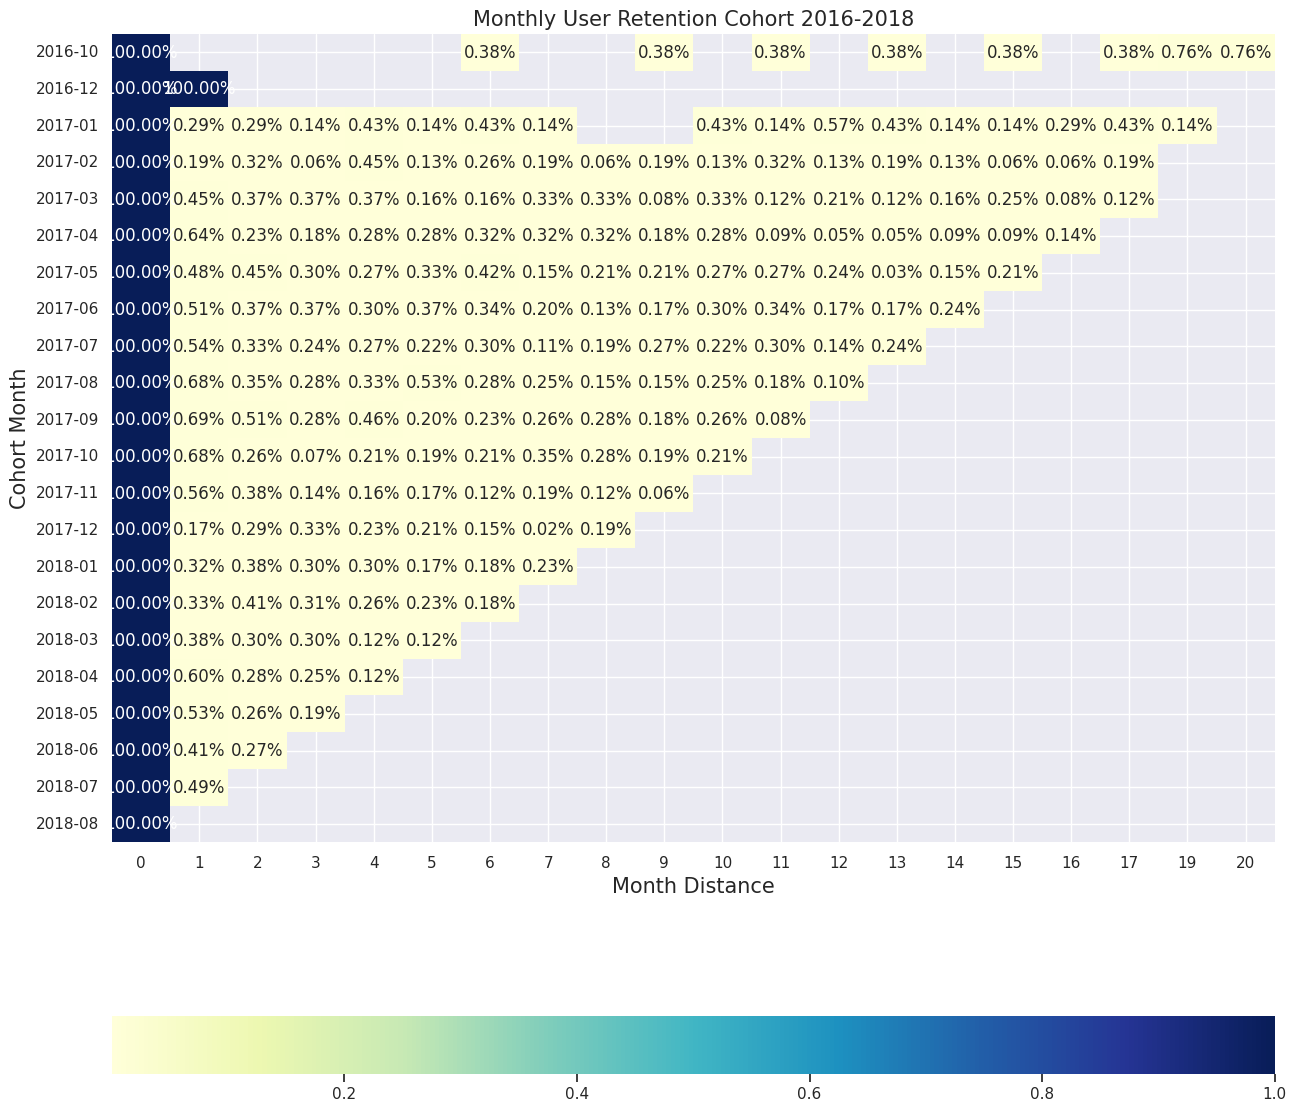

In [ ]:
plt.figure(figsize=(15,15))

sns.heatmap(cohort_percentage,
            annot=True,
            cmap='YlGnBu',
            fmt='.2%',
            cbar_kws={'orientation':'horizontal'}
           )
plt.xlabel('Month Distance',size=15)
plt.ylabel('Cohort Month',size=15)
plt.title('Monthly User Retention Cohort 2016-2018',size=15)
plt.show()

Dari heatmap hasil cohort analysis diatas terlihat bahwa pengguna baru yang melakukan transaksi berikutnya di bulan-bulan setelahnya tidak lebih dari 1%, yang menandakan hanya sedikit dari pengguna yang melakukan pembelian kembali

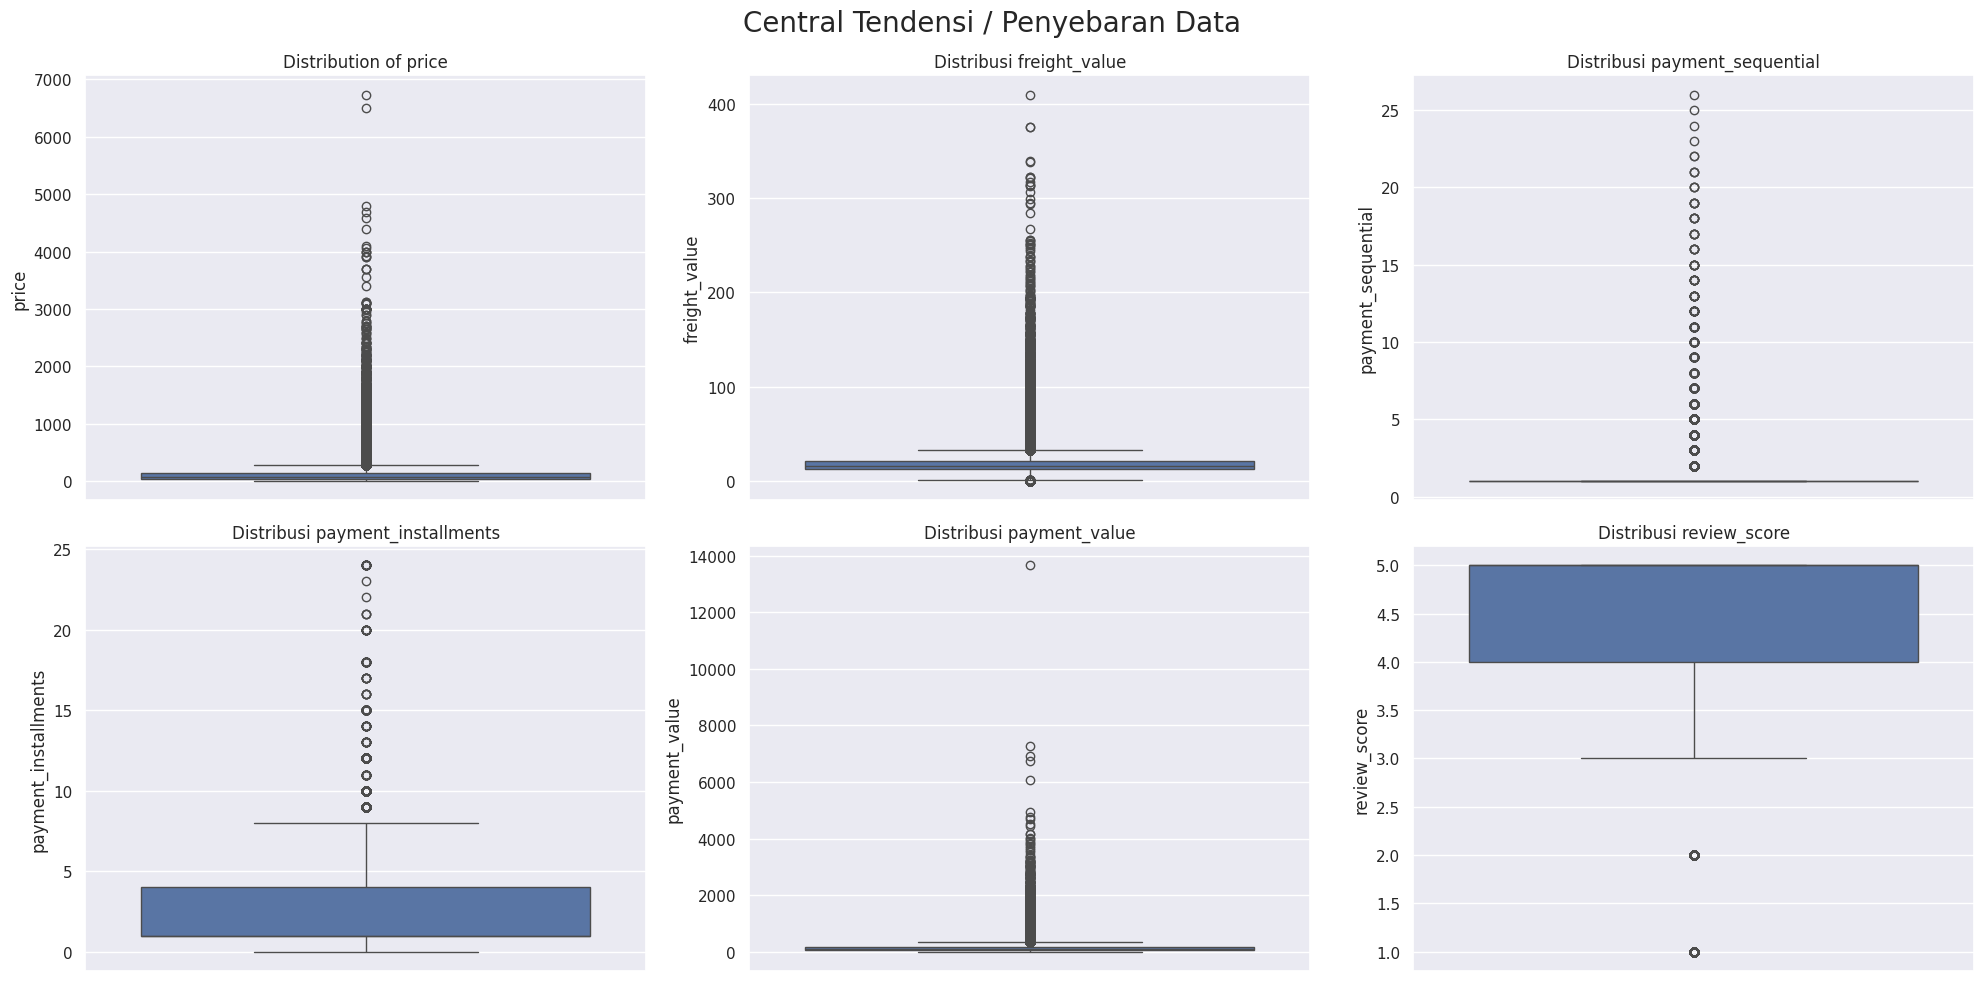

In [ ]:
plt.figure(figsize=(20,10))
plt.suptitle('Central Tendensi / Penyebaran Data',size=20)
plt.subplot(2,3,1)
sns.boxplot(data=df['price'])
plt.title('Distribution of price')

plt.subplot(2,3,2)
sns.boxplot(data=df['freight_value'])
plt.title('Distribusi freight_value')

plt.subplot(2,3,3)
sns.boxplot(data=df['payment_sequential'])
plt.title('Distribusi payment_sequential')
plt.tight_layout()

plt.subplot(2,3,4)
sns.boxplot(data=df['payment_installments'])
plt.title('Distribusi payment_installments')
plt.tight_layout()

plt.subplot(2,3,5)
sns.boxplot(data=df['payment_value'])
plt.title('Distribusi payment_value')
plt.tight_layout()

plt.subplot(2,3,6)
sns.boxplot(data=df['review_score'])
plt.title('Distribusi review_score')
plt.tight_layout()

Distibusi dari visualisasi boxplot di atas menunjukan bahwa terdapat banyak outlier, sehingga penentuan central tendensi menggunakan median

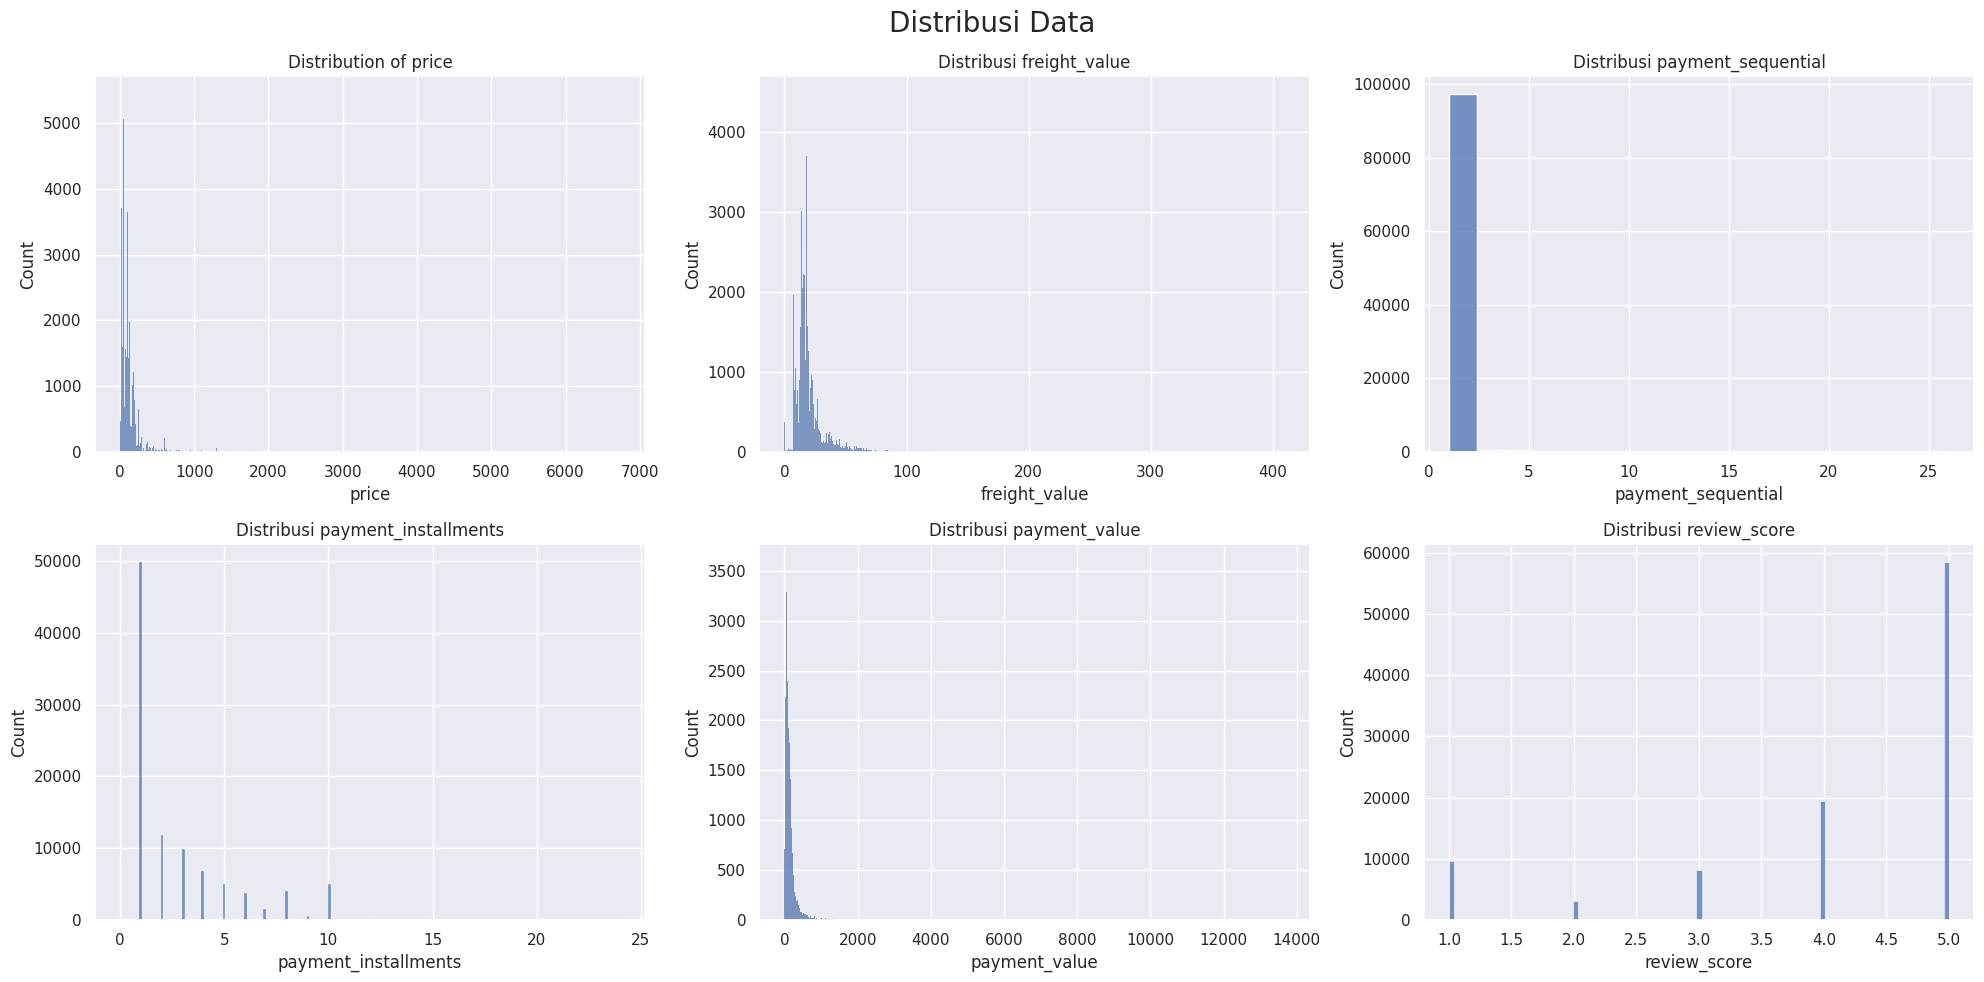

In [ ]:
plt.figure(figsize=(20,10))
plt.suptitle('Distribusi Data',size=20)
plt.subplot(2,3,1)
sns.histplot(data=df['price'])
plt.title('Distribution of price')

plt.subplot(2,3,2)
sns.histplot(data=df['freight_value'])
plt.title('Distribusi freight_value')

plt.subplot(2,3,3)
sns.histplot(data=df['payment_sequential'])
plt.title('Distribusi payment_sequential')
plt.tight_layout()

plt.subplot(2,3,4)
sns.histplot(data=df['payment_installments'])
plt.title('Distribusi payment_installments')
plt.tight_layout()

plt.subplot(2,3,5)
sns.histplot(data=df['payment_value'])
plt.title('Distribusi payment_value')
plt.tight_layout()

plt.subplot(2,3,6)
sns.histplot(data=df['review_score'])
plt.title('Distribusi review_score')
plt.tight_layout()

Distibusi dari visualisasi histplot di atas menunjukan bahwa distribusi tersebut tidak normal

In [ ]:
df['order_purchase_month_name'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df['order_purchase_month'] = df['order_purchase_timestamp'].dt.to_period('M')
df['order_purchase_date'] = df['order_purchase_timestamp'].dt.to_period('D')
df['order_purchase_dayofweek_name'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

df['order_purchase_hour'] = df['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 5, 11, 17, 20, 24]
hours_labels = ['late at night','morning', 'afternoon', 'evening', 'late evening']
df['order_purchase_time_day'] = pd.cut(df['order_purchase_hour'], hours_bins, labels=hours_labels)

In [ ]:
df.head()

order_id                       customer_id  \
0  d455a8cb295653b55abda06d434ab492  944b72539d7e1f7f7fc6e46639ef1fe3   
1  7f39ba4c9052be115350065d07583cac  d7fc82cbeafea77bd0a8fbbf6296e387   
2  9dc8d1a6f16f1b89874c29c9d8d30447  d9442164acf4b03109425633efaa0cfc   
3  0f548bd29148ebc519d6495e37a284e1  015faf9ec36eccd957c0f2782aab09a4   
4  4dcbd5ebfc13eef35e0fcb0ca1c2807e  033be315f82e41697260be39939d3662   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-09-26 22:17:05 2017-09-27 22:24:16   
1    delivered      2017-10-18 08:16:34 2017-10-18 23:56:20   
2    delivered      2017-10-12 13:33:22 2017-10-12 13:49:22   
3    delivered      2017-09-03 08:06:30 2017-09-03 08:25:50   
4    delivered      2017-10-22 16:39:09 2017-10-23 17:49:12   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-09-29 15:53:03           2017-10-07 16:12:47   
1          2017-10-20 14:29:01           2017-10-27 16:46:05   
2          2017-10-17 15:42:42           2017-10-24 20:17:44   
3          2017-09-04 22:03:06           2017-09-08 16:26:55   
4          2017-10-24 21:03:32           2017-11-08 18:28:44   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-30            1.0   
1                    2017-11-09            1.0   
2                    2017-11-06            1.0   
3                    2017-09-27            1.0   
4                    2017-11-16            1.0   

                         product_id                         seller_id  \
0  a2ff5a97bf95719e38ea2e3b4105bce8  0015a82c2db000af6aaaf3ae2ecb0532   
1  a2ff5a97bf95719e38ea2e3b4105bce8  0015a82c2db000af6aaaf3ae2ecb0532   
2  a2ff5a97bf95719e38ea2e3b4105bce8  0015a82c2db000af6aaaf3ae2ecb0532   
3  08574b074924071f4e201e151b152b4e  001cca7ae9ae17fb1caed9dfb1094831   
4  08574b074924071f4e201e151b152b4e  001cca7ae9ae17fb1caed9dfb1094831   

  shipping_limit_date  price  freight_value  payment_sequential payment_type  \
0 2017-10-12 22:24:16  895.0          21.02                 1.0  credit_card   
1 2017-10-24 23:56:20  895.0          21.02                 1.0  credit_card   
2 2017-10-18 14:49:22  895.0          21.02                 1.0  credit_card   
3 2017-09-08 08:25:50   99.0          33.08                 1.0  credit_card   
4 2017-10-27 17:49:12   99.0          33.08                 1.0  credit_card   

   payment_installments  payment_value                         review_id  \
0                  10.0         916.02  f6923b4d17e0f4e87b38cb26c758d3c6   
1                   8.0         916.02  2abb25fde5aafe9bc85d031dffb2f4ac   
2                   4.0         916.02  799c3e3362ac0d09cfa1b39b51647490   
3                   2.0         264.16  f402ea966112bd28646760b72d7f677f   
4                   4.0         132.08  7ce43134cd68a0f9c3ac301eedb46fd6   

   review_score review_creation_date review_answer_timestamp  \
0           5.0           2017-10-08     2017-10-11 21:42:45   
1           1.0           2017-10-28     2017-10-28 14:32:42   
2           5.0           2017-10-25     2017-10-25 23:15:15   
3           5.0           2017-09-09     2017-09-09 20:51:47   
4           1.0           2017-11-09     2017-11-14 18:39:14   

  product_category_name_english                customer_unique_id  \
0              small_appliances  3c7e305796add66698959fc7ad176f6b   
1              small_appliances  9de5797cddb92598755a0f76383ddbbb   
2              small_appliances  9915eb9f74b6c11aaf04833f65b00e93   
3                  garden_tools  dce323533e45e74d215e0fe7fb114118   
4                  garden_tools  acfca8c3549ceceba9e125afc0349610   

   customer_zip_code_prefix        customer_city customer_state seller_state  \
0                     87502             umuarama             PR           SP   
1                     35490  entre rios de minas             MG           SP   
2                     38600             paracatu             MG           SP   
3                     2471

In [ ]:
df['order_purchase_month']=df['order_purchase_month'].astype('str')

In [ ]:
monthorder=df.groupby(['order_purchase_month','order_purchase_month_name'])['order_id'].count().reset_index()

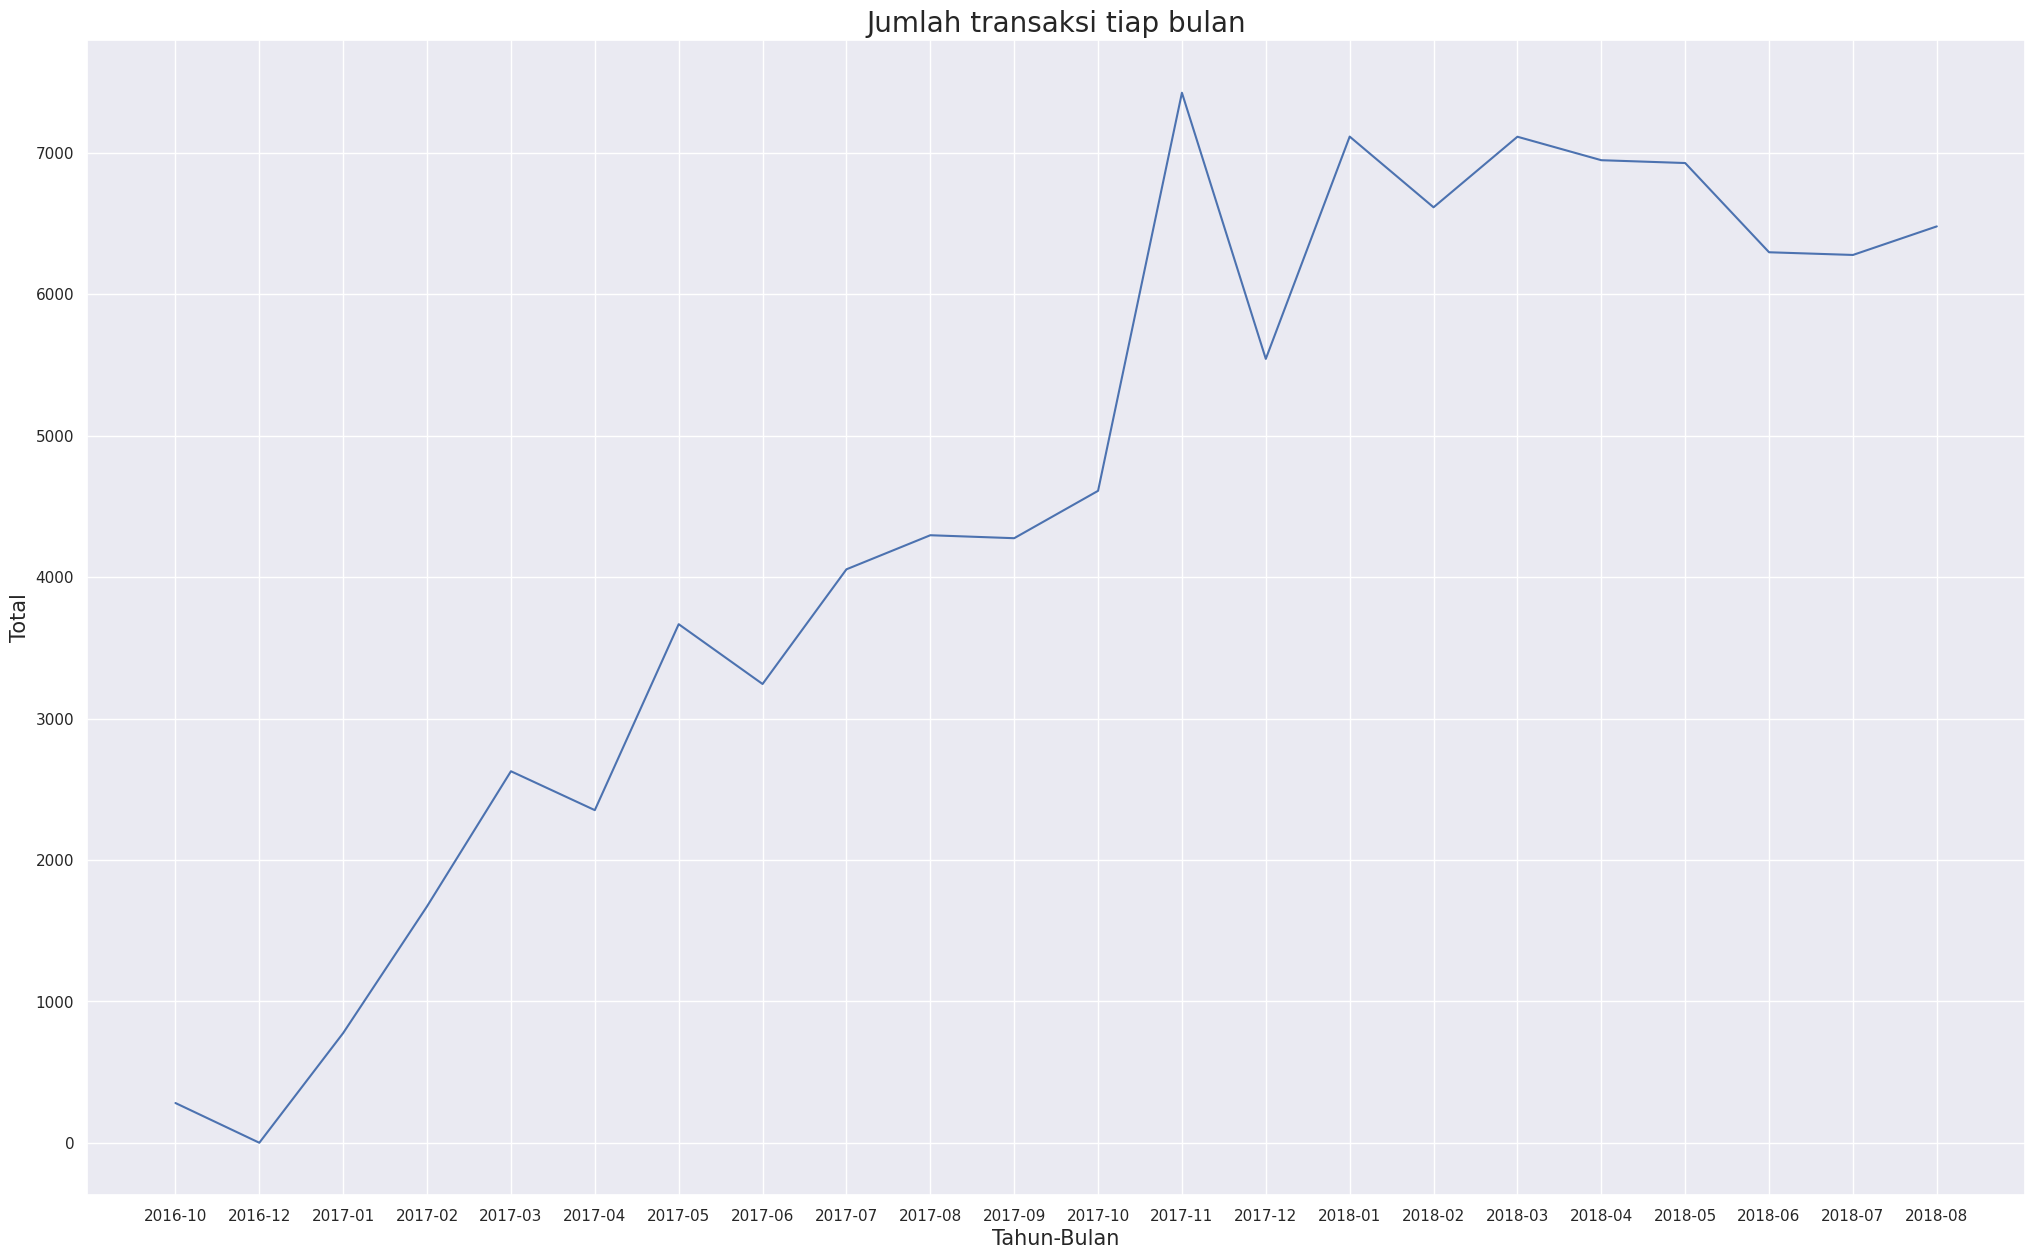

In [ ]:
plt.figure(figsize=(25,15))
sns.lineplot(x='order_purchase_month', y='order_id', data=monthorder)
plt.title('Jumlah transaksi tiap bulan', size=20)
plt.xlabel('Tahun-Bulan', size=15)
plt.ylabel('Total', size=15)
plt.show()

Dari visualisasi di atas, kita dapat melihat bahwa jumlah transaksi tiap bulan nya memiliki trend positif dimana titik tertinggi berada pada bulan november 2017 dan mengalami fluktuatif pada bulan-bulan berikutnya.

In [ ]:
valuemonth=df.groupby('order_purchase_month')['payment_value'].sum().reset_index()

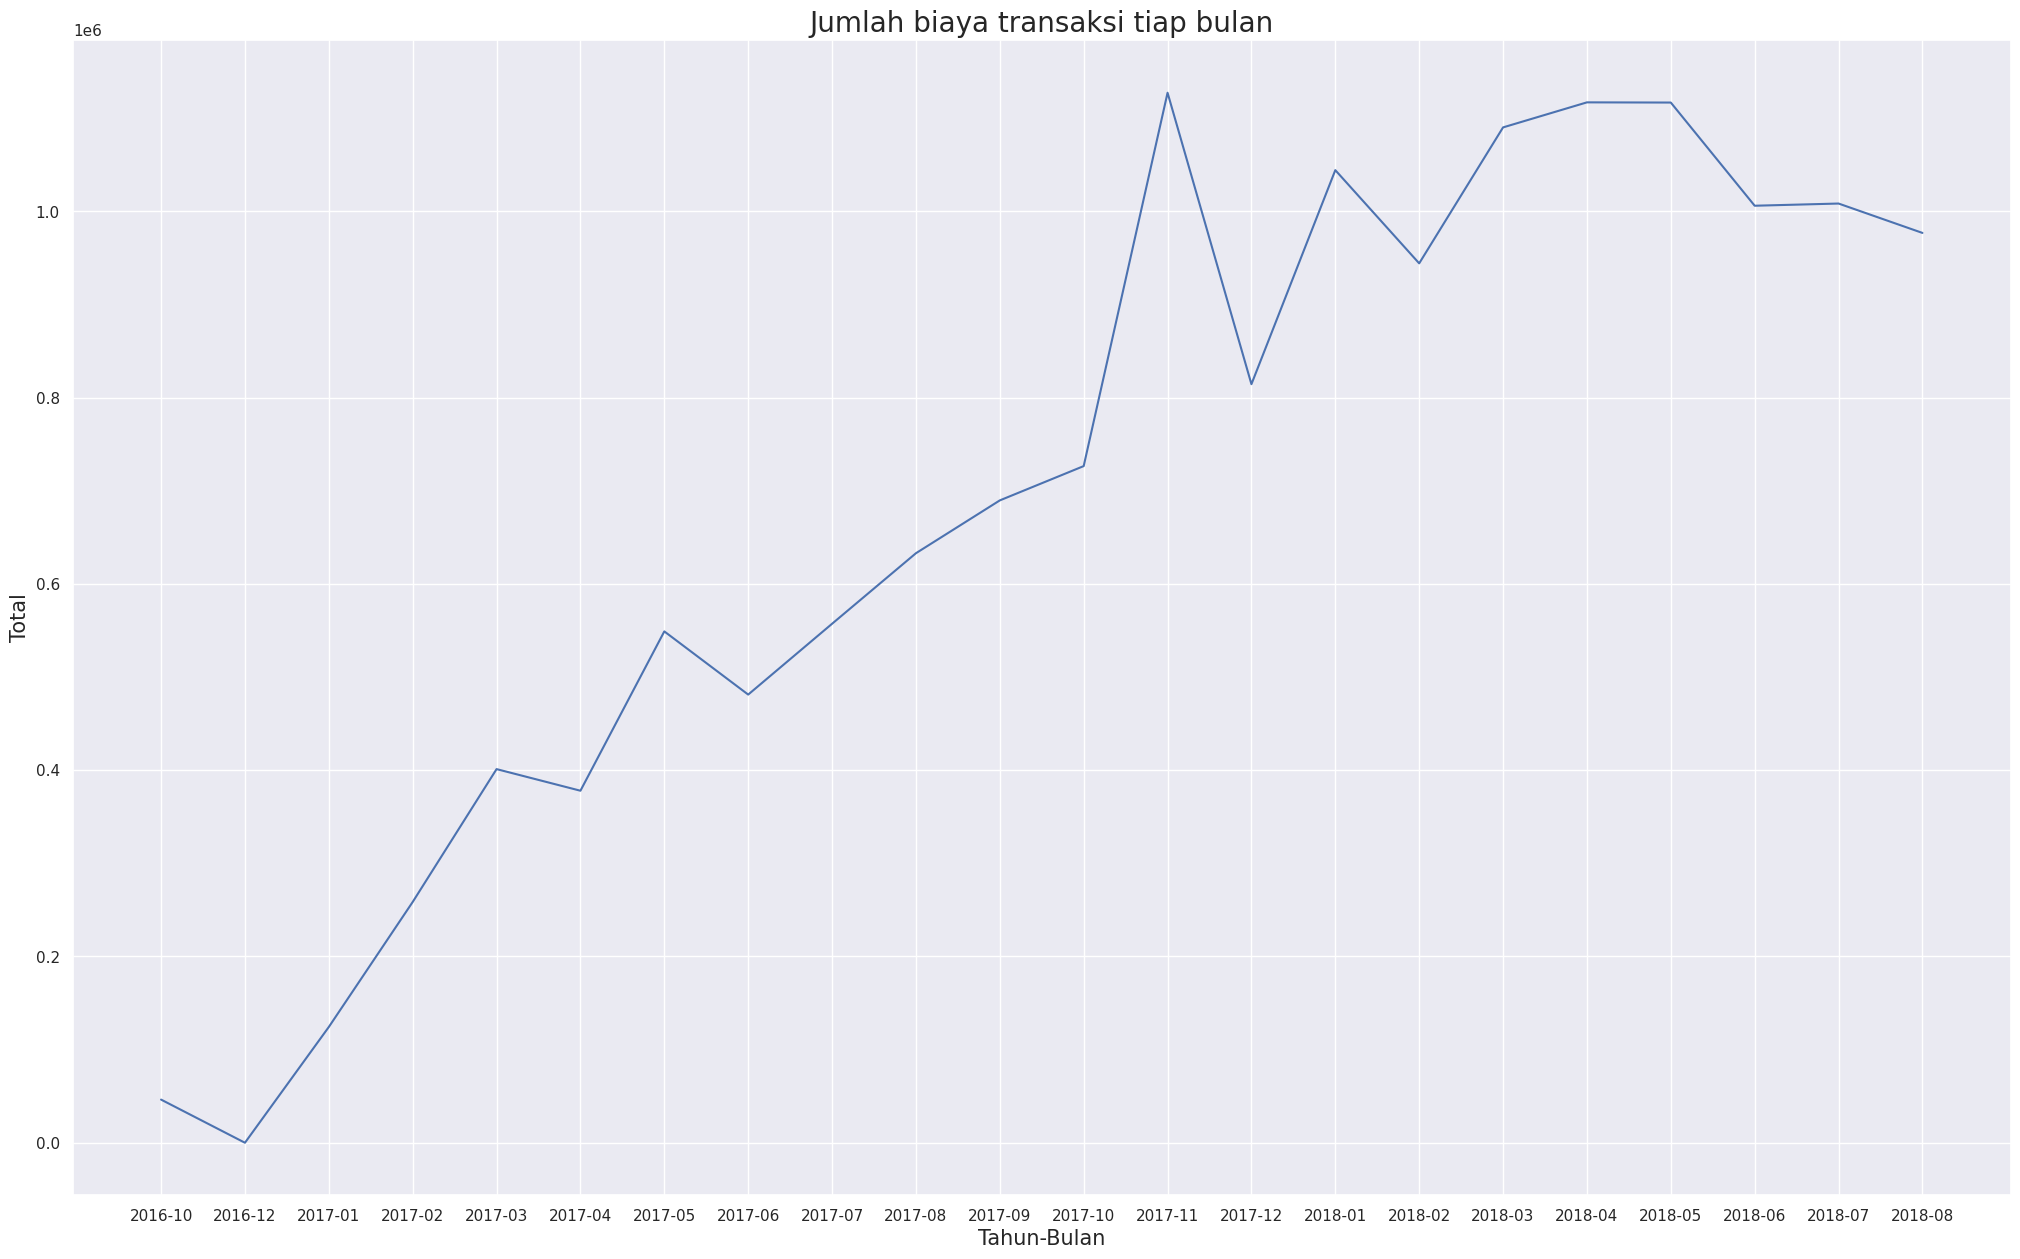

In [ ]:
plt.figure(figsize=(25,15))
sns.lineplot(x="order_purchase_month", y='payment_value', data=valuemonth)
plt.title('Jumlah biaya transaksi tiap bulan', size=20)
plt.xlabel('Tahun-Bulan', size=15)
plt.ylabel('Total', size=15)
plt.show()

Dari visualisasi di atas, kita dapat melihat bahwa jumlah transaksi tiap bulan nya memiliki trend positif dimana titik tertinggi berada pada bulan november 2017 dan mengalami fluktuatif pada bulan-bulan berikutnya. Dan jika di lihat lebih seksama, banyak event atau acara tertentu yang mempengaruhi tingkat pembelian konsumer. Contohnya pada titik tertinggi di november 2017, terdapat aktivitas tahunan seperti black friday dimana terdapat diskon besar-besaran dan juga terdapat event besar dimana pada bulan tersebut juga, Brazil menempati peringkat satu di kualifikasi WORLD CUP CONMEBOL dimana dapat meningkatkan pembelian pada kategori sports.
sehingga dapat direkomendasikan melakukan analysis lebih lanjut pada event2 yang sama seperti Black Friday pada jumat di minggu terakhir dan acara olahraga terutama sepak bola.
Berikut acara yang mungkin dapat mempengaruhi tingkat pembelian dimana dapat lebih ditingkatkan dengan cara kampanye pemasaran atau memberikan voucher terhadap barang yang mungkin berkaitan dengan acara tersebut

**Free shipping day**
* Kapan ? Hari jumat di minggu terakhir pada bulan April
* Apa ? semua segment

**Mothers day**
* Kapan ? Hari jumat di minggu terakhir pada bulan April
* Apa ? expensive clothing, luxury accessories, high-end makeup, jewelry, and fragrances.

**Fathers day**
* Kapan ? Hari minggu di minggu kedua pada bulan agustus
* Apa ? Fashion and Accessories,Electronics , Books, Fragrances

**Valentines day**
* Kapan ? 12 Juni
* Apa ?  Beauty and Health, followed by Fashion and Technology.

**Children's day**
* Kapan ? 12 Oktober
* Apa? toys were fashion dolls, superhero action figures, bikes, miniature cars and board games.

**Black Friday**
* Kapan ? Hari jumat di minggu terakhir pada bulan November
* Apa ?  Home Appliances, Electronics, Cosmetics, Fashion

**Christmas**
* Kapan ? 25 December
* Apa ? From Apparel to Toys, passing through Fragrances, Cosmetics, Home Appliances, and Electronics.

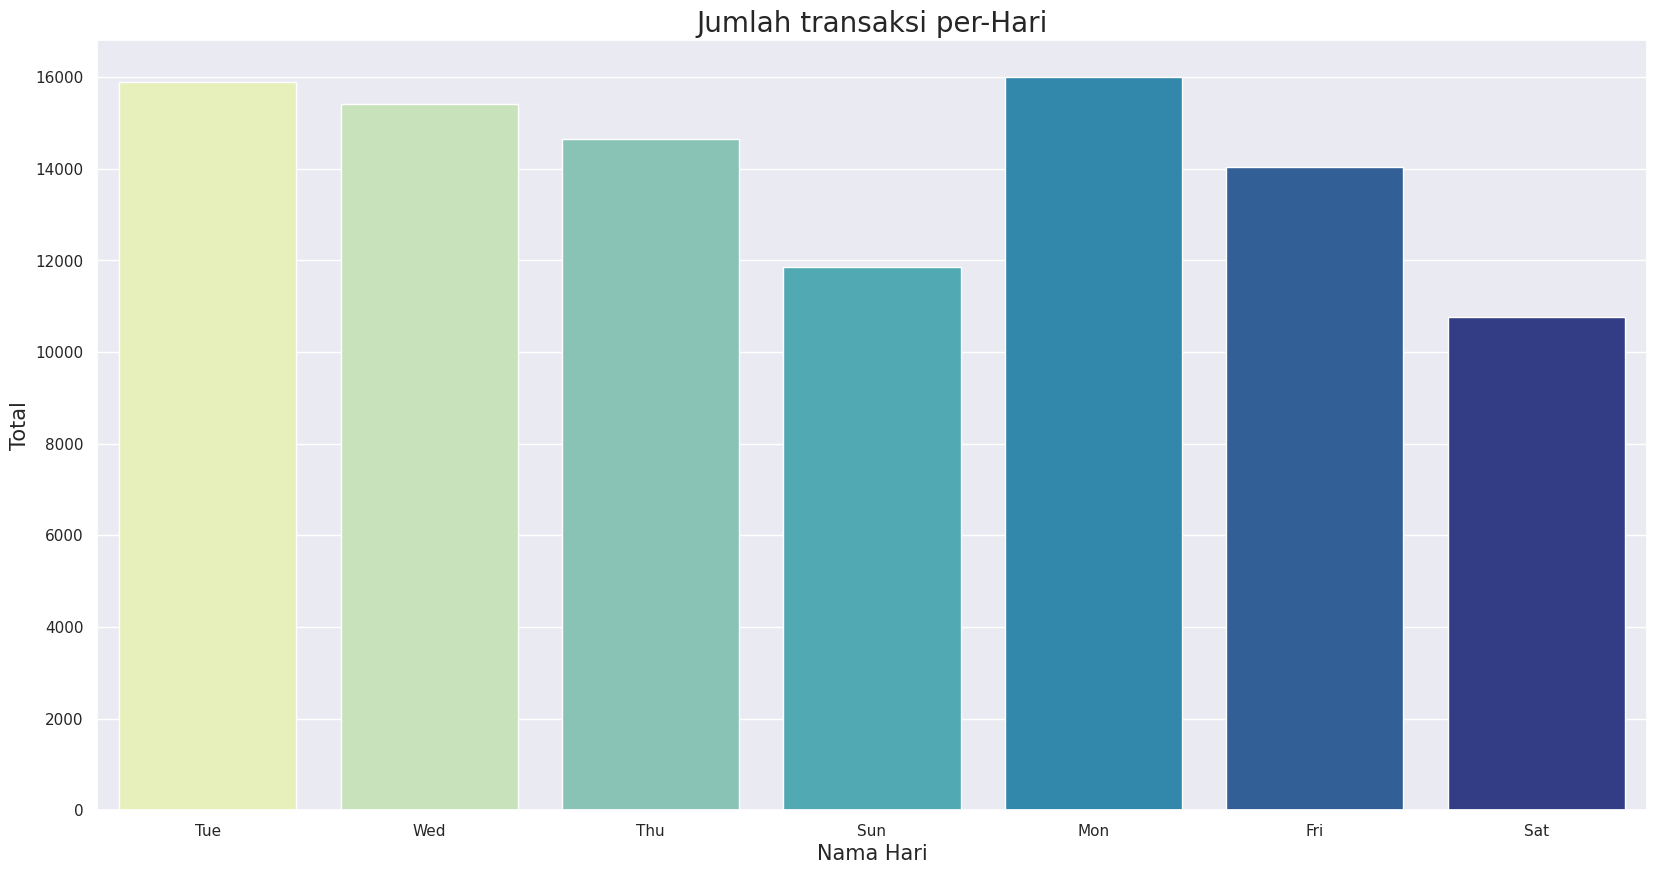

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x="order_purchase_dayofweek_name", data=df,palette='YlGnBu')
plt.title('Jumlah transaksi per-Hari', size=20)
plt.xlabel('Nama Hari', size=15)
plt.ylabel('Total', size=15)
plt.show()

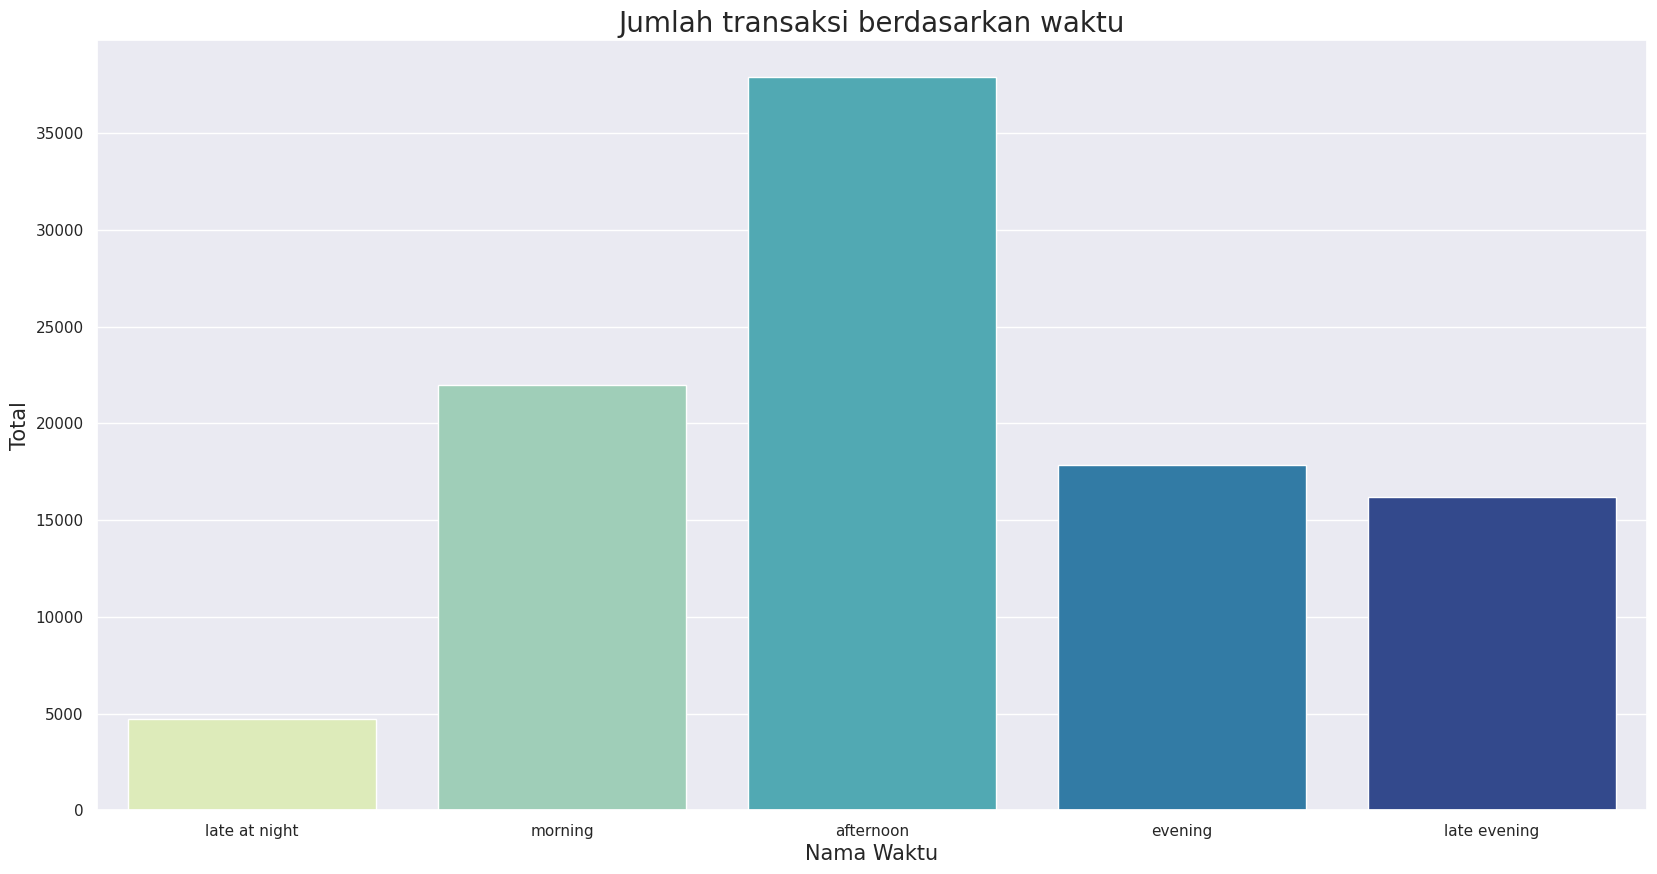

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x="order_purchase_time_day", data=df, palette='YlGnBu')
plt.title('Jumlah transaksi berdasarkan waktu', size=20)
plt.xlabel('Nama Waktu', size=15)
plt.ylabel('Total', size=15)
plt.show()

In [ ]:
day_hour=df.groupby(['order_purchase_dayofweek_name','order_purchase_hour']).agg({'order_id':'count'}).rename(columns={'order_id':'freq'}).reset_index()
day_hour['order_purchase_dayofweek_name']=pd.Categorical(day_hour['order_purchase_dayofweek_name'],categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],ordered=True)
day_hour = day_hour.pivot(index='order_purchase_dayofweek_name', columns='order_purchase_hour', values='freq')

In [ ]:
df['order_purchase_time_day'].value_counts(normalize=True)

order_purchase_time_day
afternoon        0.384405
morning          0.222896
evening          0.180805
late evening     0.164135
late at night    0.047759
Name: proportion, dtype: float64

Berdasarkan Barplot di atas, pembagian waktu dibagi berdasarkan :
- late at night : 00.00 - 05.00
- morning : 05.00 - 11.00
- afternoon : 12.00 - 17.00
- evening : 18.00 - 20.00
- late evening : 21.00 - 24.00

Terlihat bahwa jumlah transaksi terbanyak terdapat pada waktu "afternoon" dimana 38.44% transaksi terjadi waktu tersebut, sehingga team marketing dapat menjadikan opsi waktu tersebut untuk melakukan aktivitas pemasaran seperti adanya promo terbatas dalam waktu tersebut ataupun flash sale dan juga merchant untuk memasang iklan listing produk pada waktu tersebut.

Text(0.5, 1.0, 'Transaksi Tiap Jam Dalam Hari')

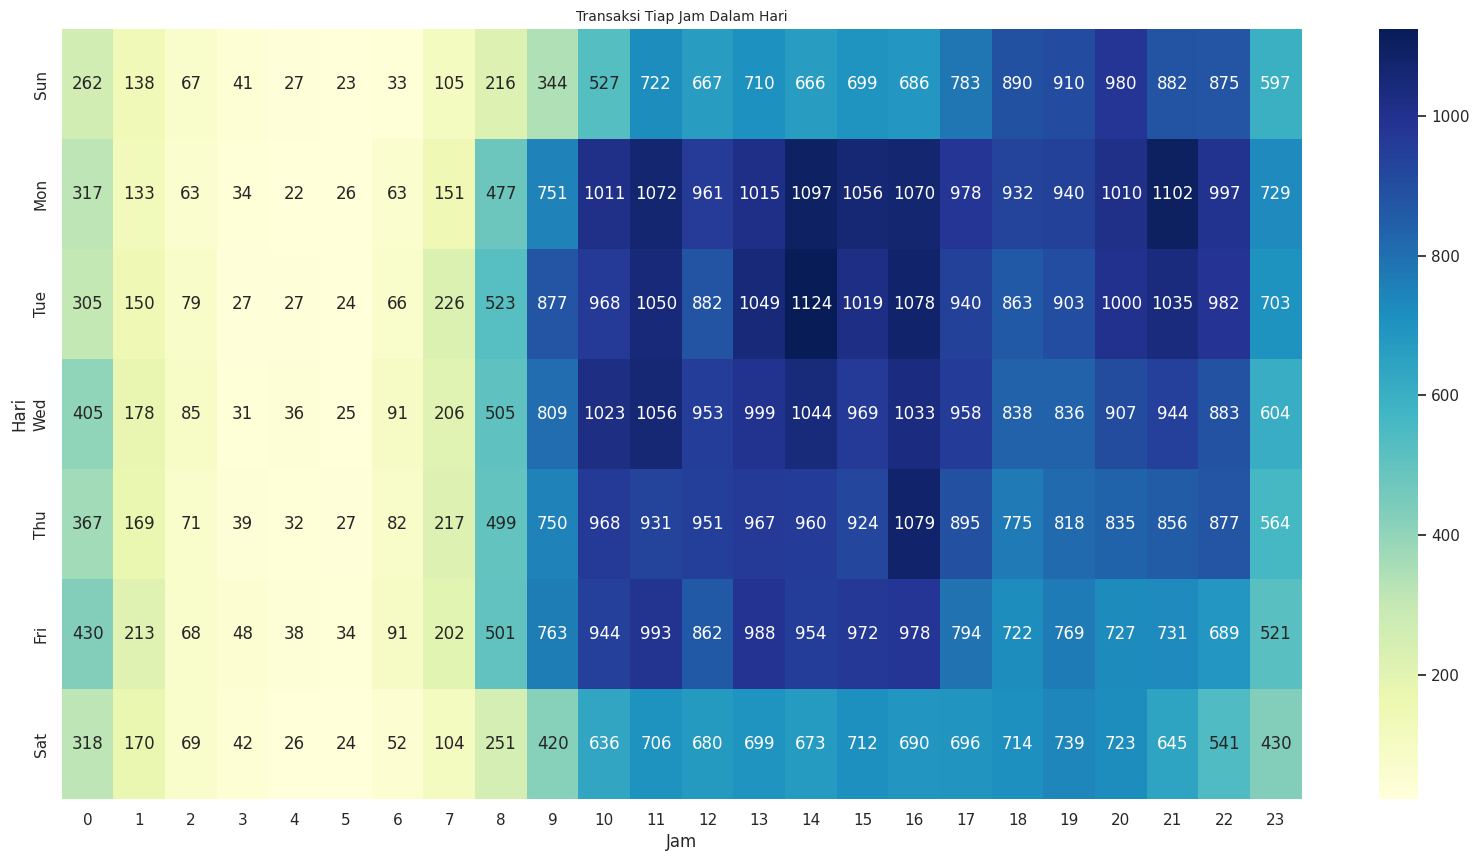

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.heatmap(day_hour,annot=True,fmt="d",cmap="YlGnBu")
ax.set_xlabel("Jam")
ax.set_ylabel("Hari")
ax.set_title("Transaksi Tiap Jam Dalam Hari",size=10)

Dapat dilihat dari heatmap diatas,

- frekuensi transaksi pada hari kerja lebih banyak dibandingkan pada akhir pekan.
- pada hari kerja, frekuensi transaksi meningkat pada jam 9 pagi, dan di hari minggu frekuensi pembelian hanya meningkat setelah jam 15.00.
- seiring berjalannya hari jumlah transaksi meningkat.



Dari ketiga grafik di atas, dapat dilihat bahwa jumlah order terbanyak berada pada hari senin dan terkecil pada hari sabtu yang mungkin disebabkan oleh banyak nya waktu luang di akhir pekan, konsumer memilih untuk berbelanja ke toko fisik.  Hari yang menunjukan order terbanyak mengindikasikan banyak nya customer yang mengunjungi e-commerce Olist, oleh karena itu direkomendasikan kegiatan promosi yang mungkin dapat dilakukan dengan cara :

1. Pemberian voucher khusus & diskon yang berlaku pada pembelian di akhir pekan
2. Pemberian voucher khusus & diskon yang berlaku pada pembelian di jam malam akhir pekan
3. Melakukan kampanye marketing seperti broadcast dan iklan sebelum jam 9 dimana frekuensi transaksi mulai meningkat.


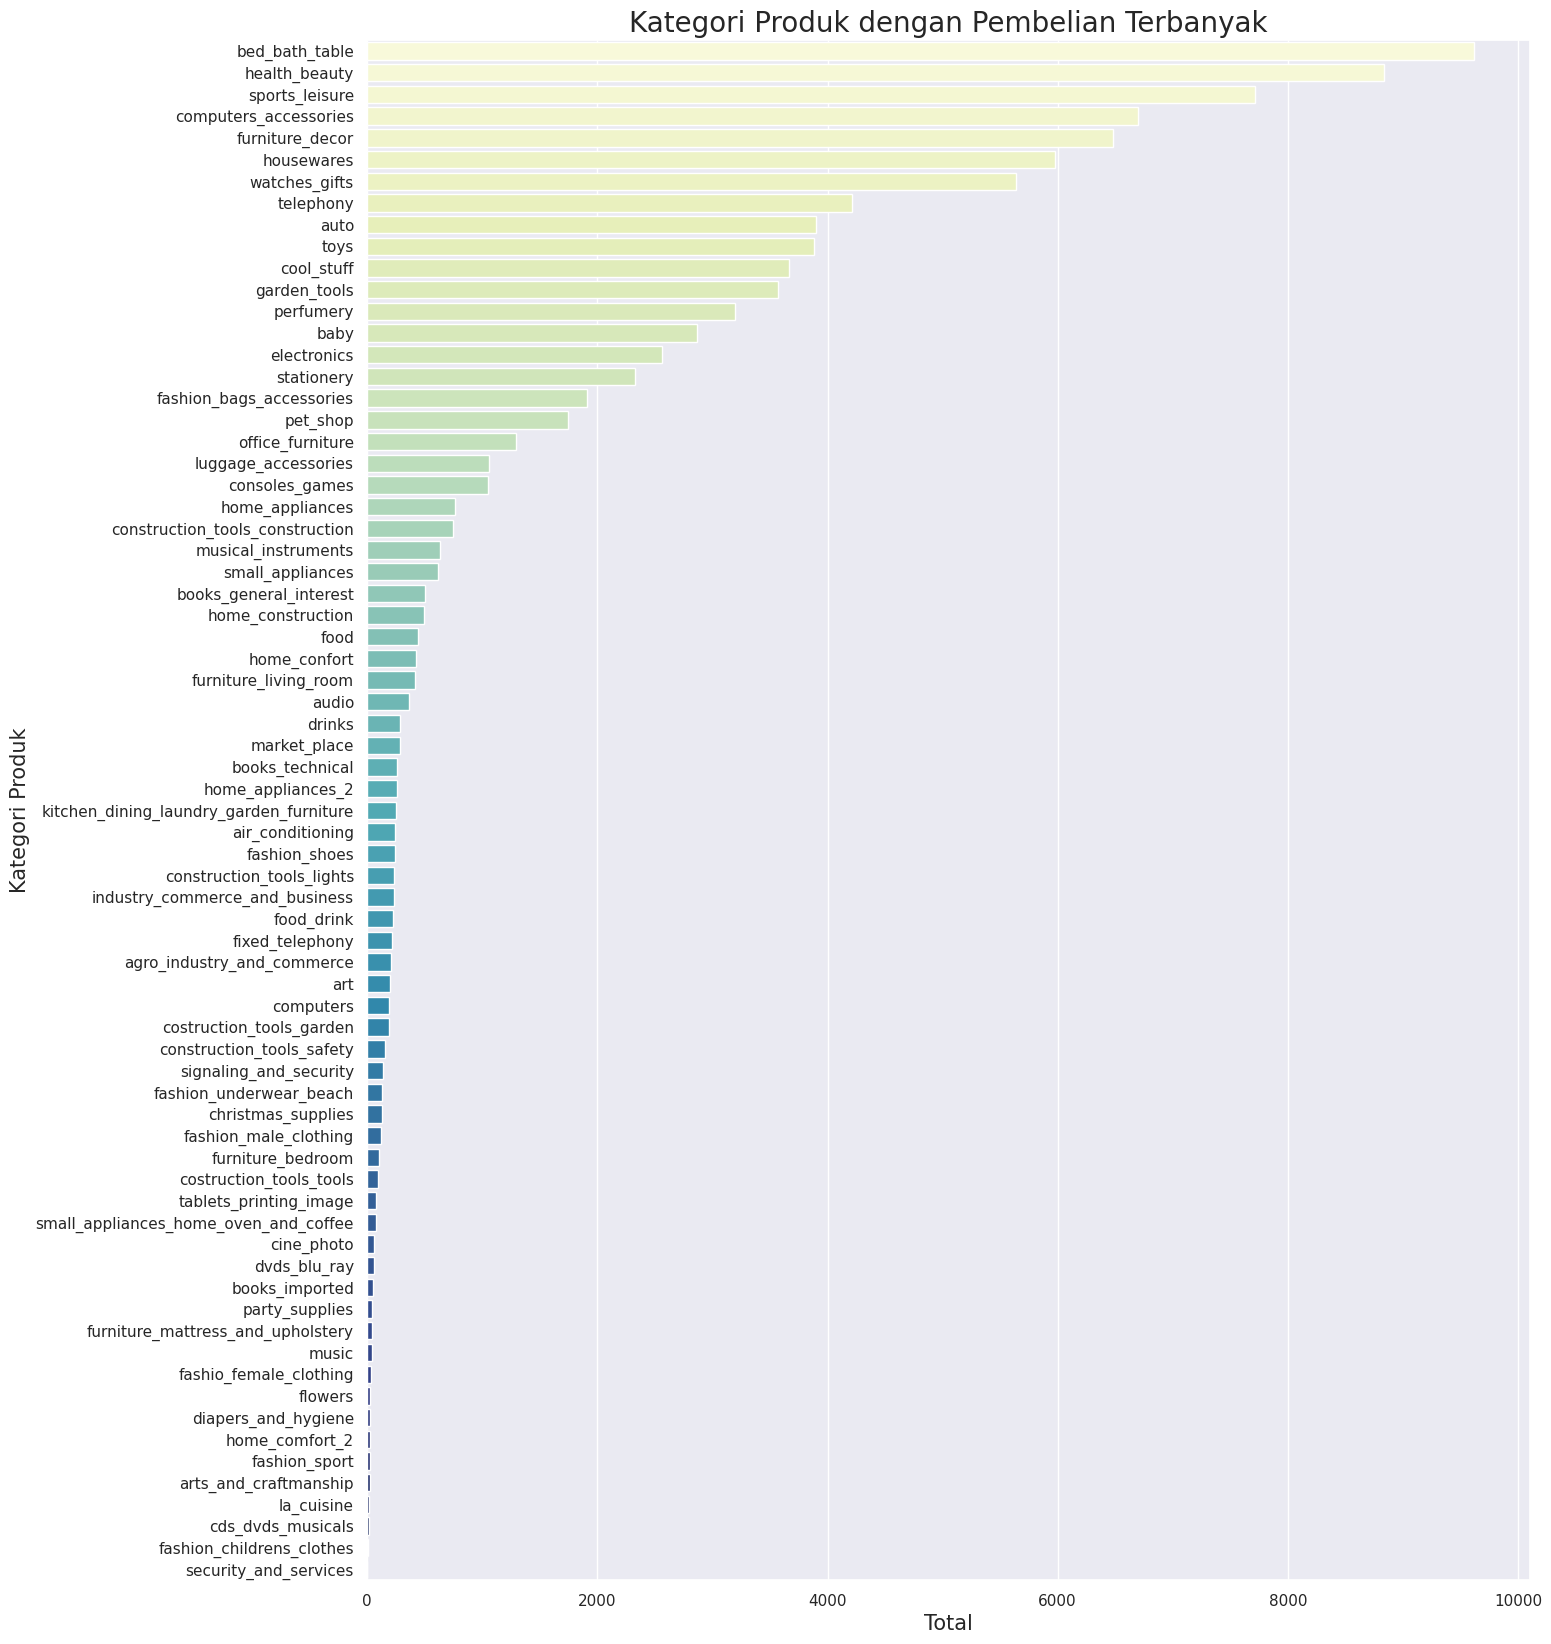

In [ ]:
plt.figure(figsize=(15,20))
sns.countplot(y="product_category_name_english", data=df, order=df['product_category_name_english'].value_counts().index, palette='YlGnBu')
plt.title('Kategori Produk dengan Pembelian Terbanyak', size=20)
plt.xlabel('Total', size=15)
plt.ylabel('Kategori Produk', size=15)
plt.show()

Terlihat dalam visualisasi diatas, 5 kategori produk dengan pembelian terbanyak adalah :

1. bed_bath_table
2. health_beauty
3. Sport_leisure
4. computers_accecoris
5. furniture_decors

dari kategori produk di atas, sebagian besar kategori produk merupakan produk bersifat tidak *repeatable* atau tidak dibeli secara rutin. jadi perlu di analisis lebih lanjut mengenai kategori produk lain yang kurang diminati, apakah bermasalah dalam periklanan atau ketersediaan barang tersebut.

karena terdapat perbedaan jauh dalam jumlah pembelian produk di tiap kategori yang berbeda dan menimbulkan ketidak seimbangan. Dimana, masih banyak produk yang kurang diminati konsumen sehingga tidak memiliki banyak pembelian. Sehingga dapat direkomendasikan juga, untuk melakukan periklanan pada setiap platform digital dengan cara re-marketing atau re-advertising untuk meningkatkan engagement dari setiap kategori produk.

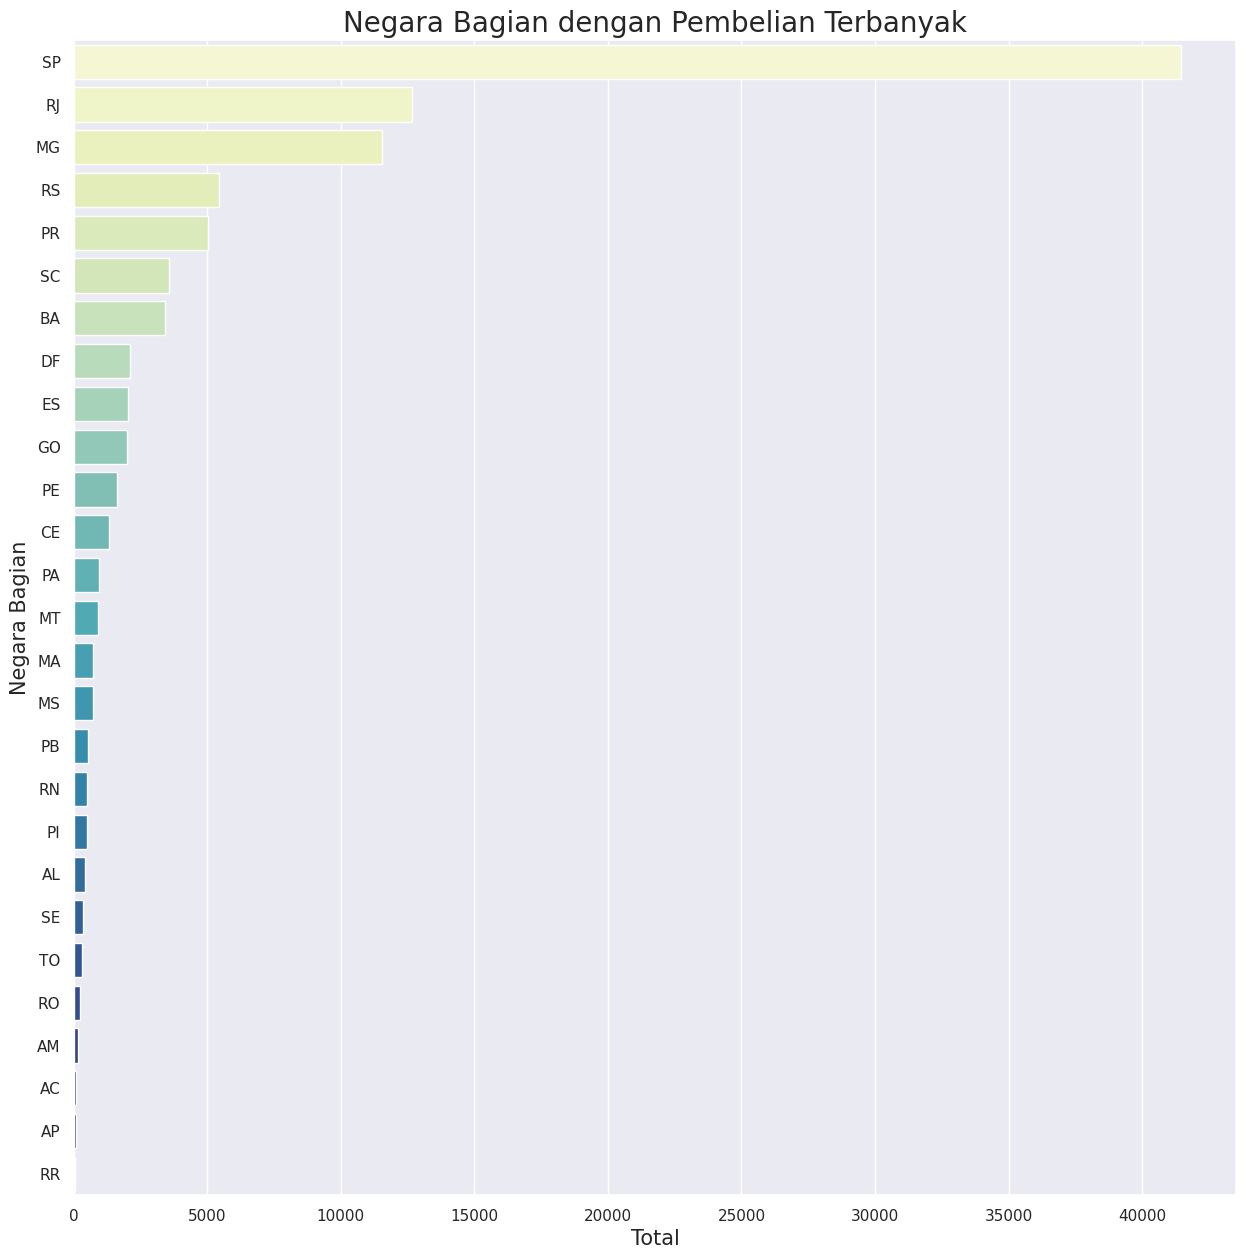

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(y="customer_state", data=df, order=df['customer_state'].value_counts().index, palette='YlGnBu')
plt.title('Negara Bagian dengan Pembelian Terbanyak', size=20)
plt.xlabel('Total', size=15)
plt.ylabel('Negara Bagian', size=15)
plt.show()

Terlihat dari barplot diatas, bahwa negara bagian dengan pembelian terbanyak berada di Sao Paulo.

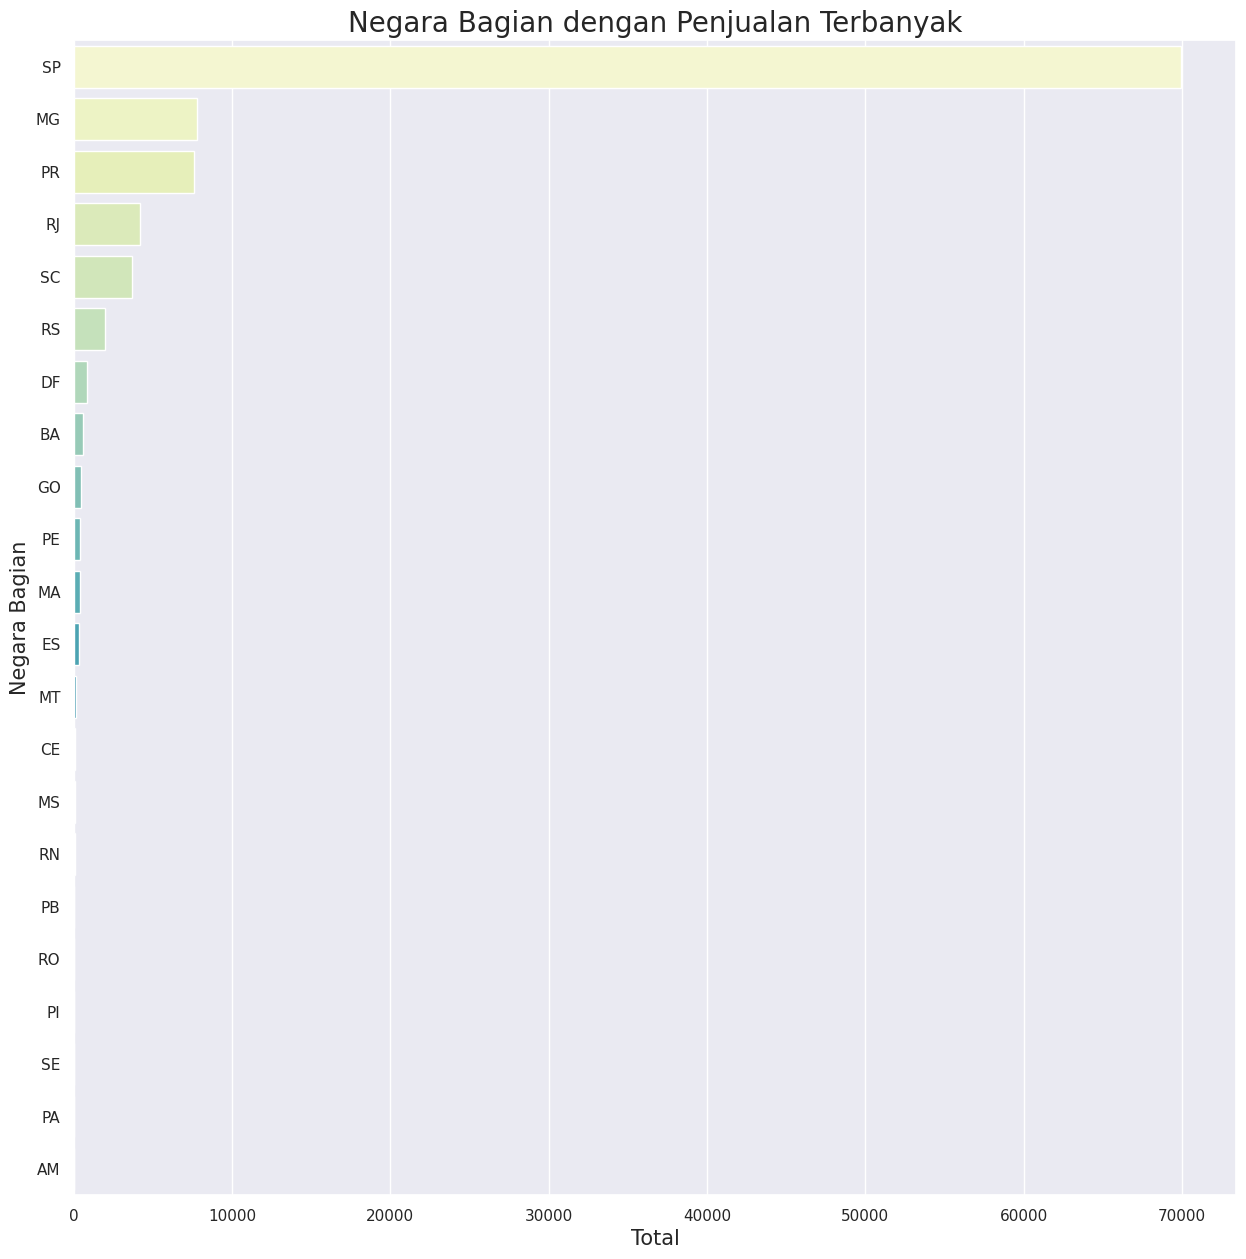

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(y="seller_state", data=df, order=df['seller_state'].value_counts().index, palette='YlGnBu')
plt.title('Negara Bagian dengan Penjualan Terbanyak', size=20)
plt.xlabel('Total', size=15)
plt.ylabel('Negara Bagian', size=15)
plt.show()

In [ ]:
df[df['customer_state']!= df['seller_state']]['freight_value'].mean()

np.float64(23.915954848202)

In [ ]:
df[df['customer_state']== df['seller_state']]['freight_value'].mean()

np.float64(13.568055688910226)

In [ ]:
df[df['customer_state']!= df['seller_state']].shape[0]/df.shape[0]*100

64.09349016426688

Terlihat dari barplot diatas, bahwa negara bagian dengan penjual terbanyak berada di Sao Paulo.

Dari kedua grafik tersebut ada keterhubungan dimana pembelian dan penjual terbanyak berada di Sao Paulo, hal tersebut wajar dimana jumlah populasi terbesar di negara bagian Brazil terdapat di Sao Paulo, dan dari analisis rata-rata ongkos pengiriman untuk ke sesama negara bagian dan ke luar negara bagian terdapat perbedaan dua kali lipat biaya yang harus dikeluarkan pelanggan, dan juga sebagian besar atau lebih tepatnya 64% pelanggan Olist melakukan pembelian dari negara bagian yang berbeda.

sehingga dapat di indikasikan bahwa ;

1. kemungkinan biaya ongkir yang mahal merupakan faktor pelanggan tidak melakukan pembelian berulang.
2. ketidak tersediaan produk dalam satu negara bagian yang mengaharuskan pembelian di negara bagian yang berbeda merupakan kemungkinan faktor pelanggan tidak melakukan pembelian berulang.

dari hal tersebut dapat direkomendasikan :

1. pembuatan campaign untuk meningkatkan jumlah seller di berbagai negara bagian
2. sales promotion gratis ongkir untuk semua negara bagian

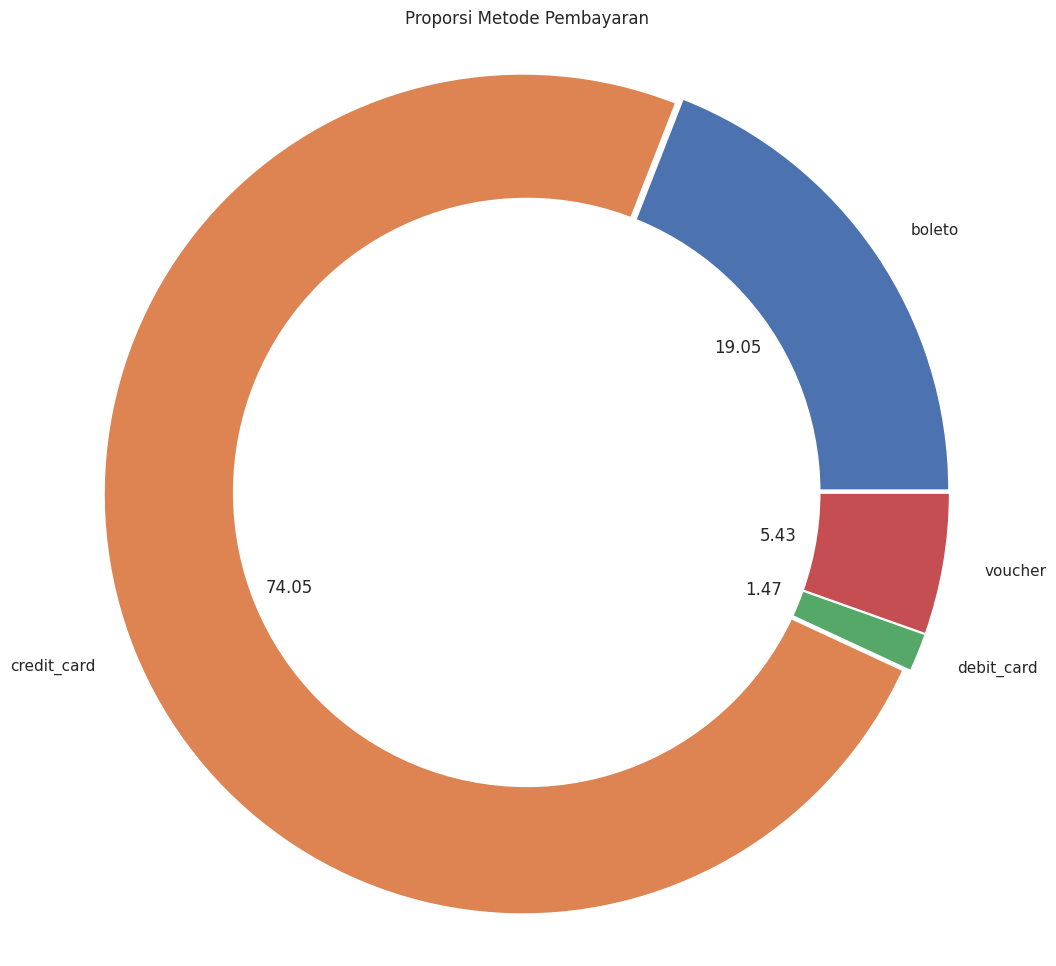

In [ ]:
plt.figure(figsize=(12,12))
df.groupby('payment_type').size().plot(kind='pie', autopct='%.2f', explode=(0.01,0.01,0.01,0.01))

plt.title('Proporsi Metode Pembayaran')
plt.axis('equal')
my_circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Dari informasi yang tercantum di dalam www.adyen.com, Konsumen Brasil adalah pengguna setia kartu kredit, dengan mayoritas lebih memilih kartu kredit untuk pembelian online mereka. Bersamaan dengan Visa dan Mastercard, skema kartu lokal ELO dan Boleto Bancário semakin populer. Dan jika dilihat dari visualisasi diatas, Proporsi tipe pembayaran di dominasi oleh kartu kredit dan boleto. Maka, rekomendasi yang dapat di berikan adalah pemberian voucher khusus & diskon yang berlaku pada pembelian dengan metode pembayaran kartu kredit dan boleto.

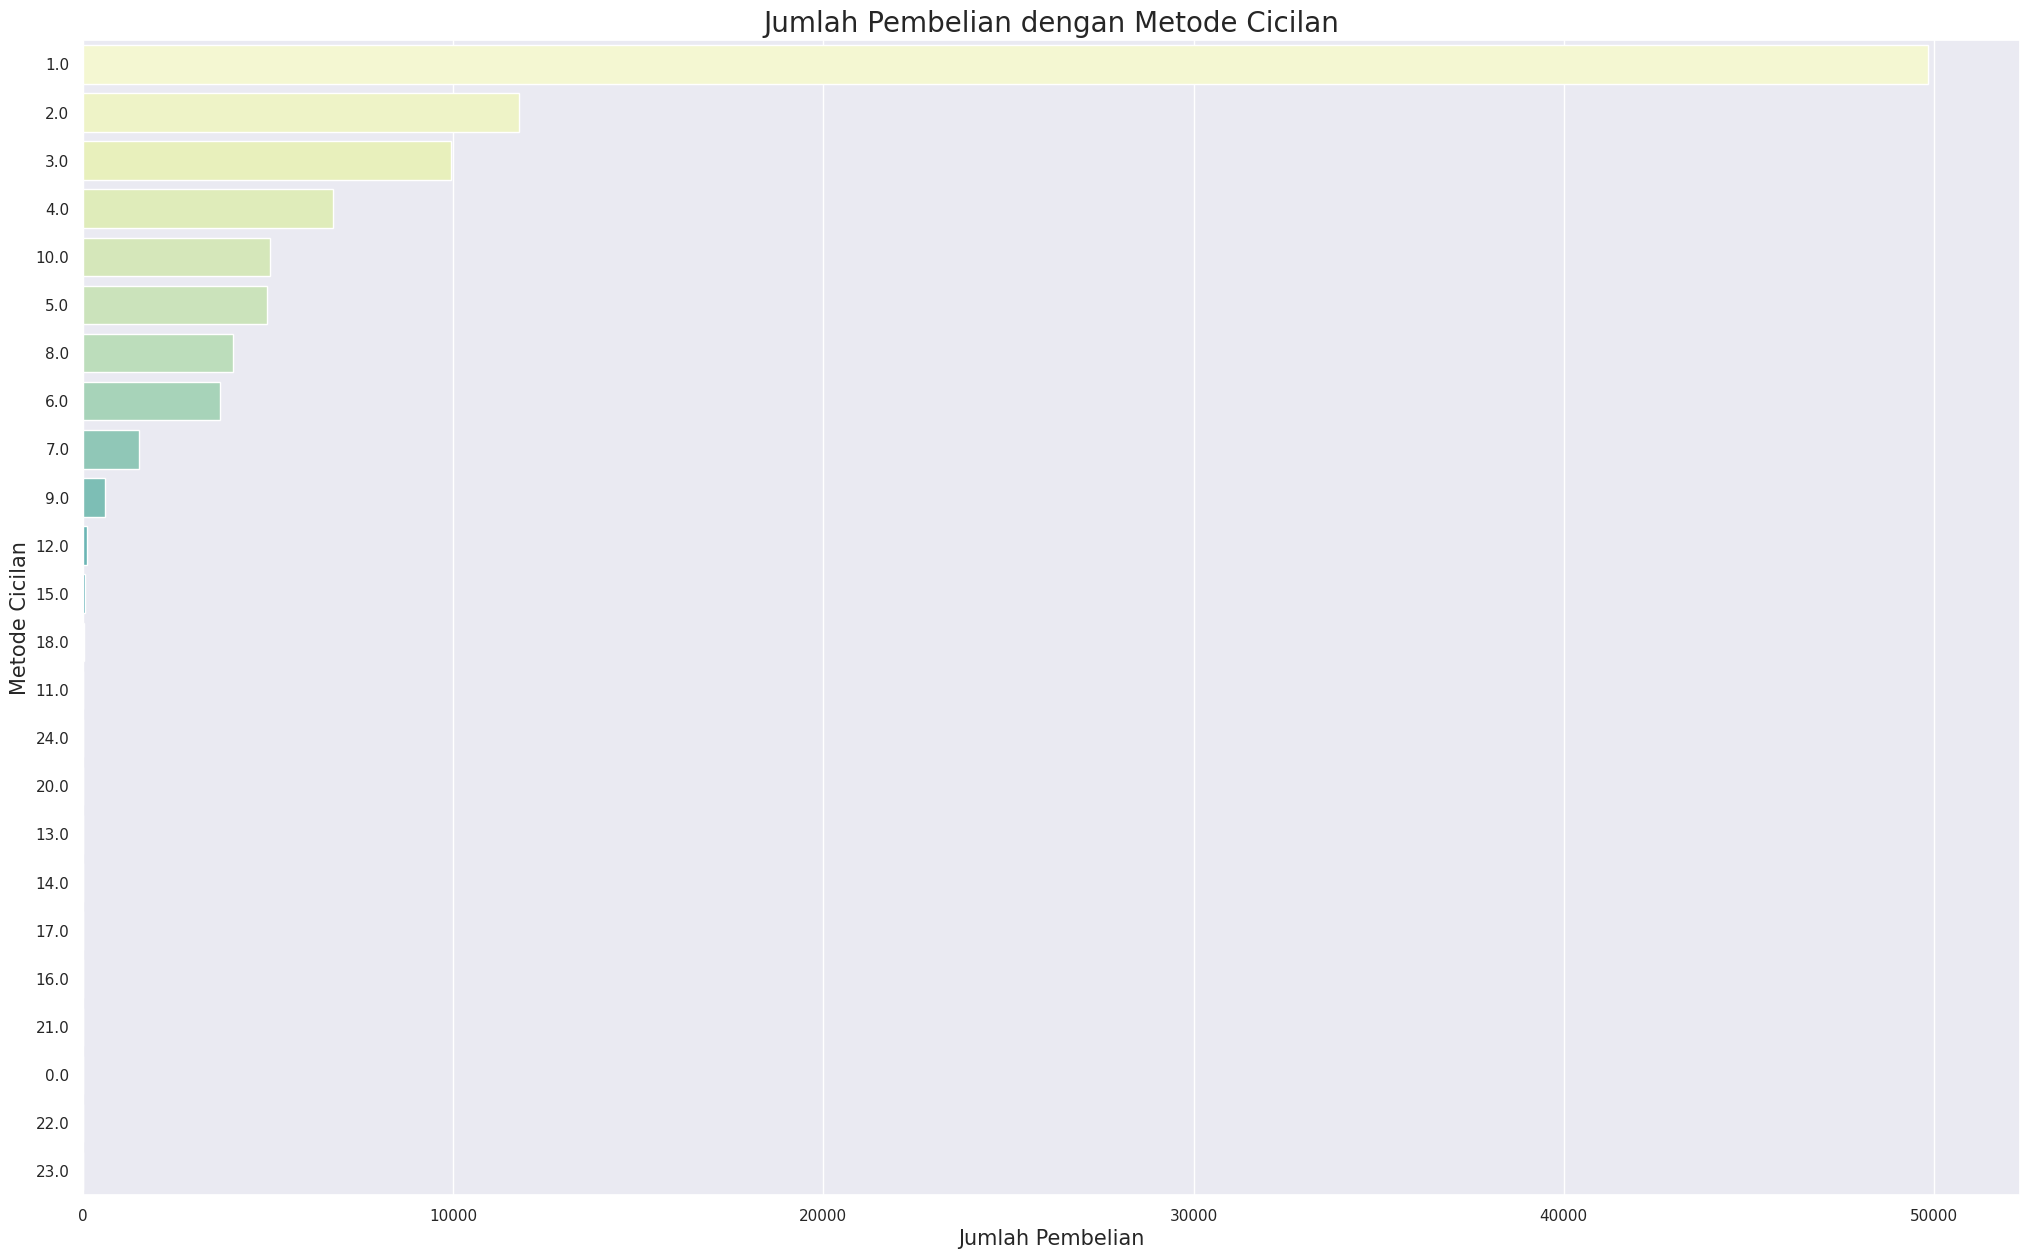

In [ ]:
plt.figure(figsize=(25,15))
sns.countplot(y="payment_installments", data=df, order=df['payment_installments'].value_counts().index, palette='YlGnBu')
plt.title('Jumlah Pembelian dengan Metode Cicilan', size=20)
plt.xlabel('Jumlah Pembelian', size=15)
plt.ylabel('Metode Cicilan', size=15)
plt.show()

Dapat dilihat dari barplot diatas, bahwa sebagian besar transaksi yang dilakukan oleh pelanggan Olist dengan metode tanpa cicilan.

berdasarkan informasi yang didapat dari situs https://www.adyen.com/ bahwa 80% transaksi di e-commerce dengan rata-rata transaksi tinggi, pelanggan lebih memilih pembayaran dengan metode cicilan. Sehingga dari grafik di atas menunjukan sebagian transaksi di e-commerce olist merupakan transaksi dengan rata-rata bernilai rendah.


Sehingga dalam aktivitas pemasaran dapat di adakan :

1. sales promotion khusus, seperti potongan harga dengan minimal transaksi yang cukup tinggi sehingga pelanggan lebih tertarik untuk berbelanja dan mengeluarkan lebih banyak uang untuk membeli suatu barang.
2. Broadcast message, ketika pelanggan memiliki product yang belum di check out dalam keranjang nya maka akan mendapatkan pesan persuasif untuk melakukan pembayaran.
3. Push Notification, pemberian notifikasi terhadap informasi-informasi menarik seputar promo atau ketersediaan produk.

In [ ]:
df['shipping_duration']=(df['order_delivered_customer_date'].dt.to_period('D')-df['order_delivered_carrier_date'].dt.to_period('D')).apply(attrgetter('n'))
df['estimate_shipping_duration']=(df['order_estimated_delivery_date'].dt.to_period('D')-df['order_delivered_carrier_date'].dt.to_period('D')).apply(attrgetter('n'))

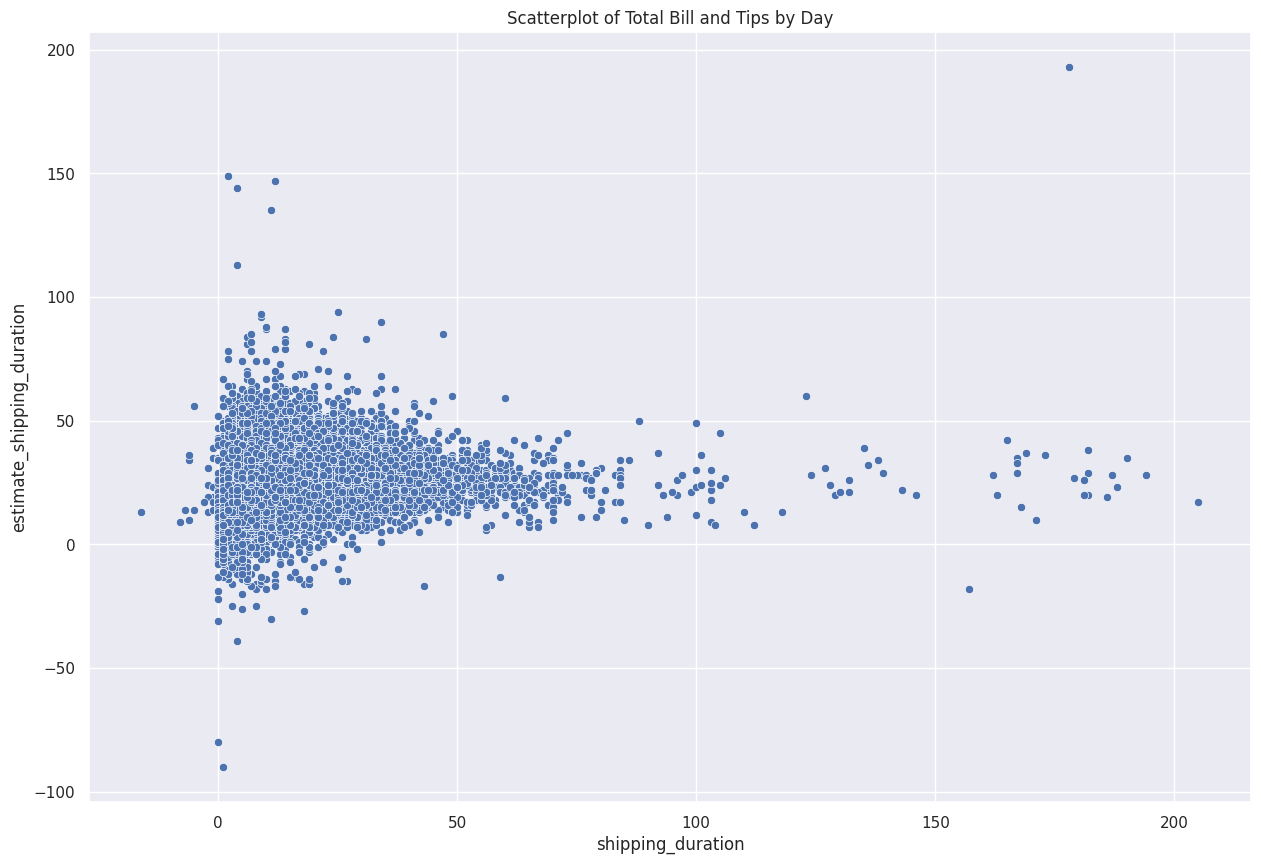

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df,x='shipping_duration',y='estimate_shipping_duration')
plt.title('Scatterplot of Total Bill and Tips by Day')
plt.show()

In [ ]:
df['shipping_acc']=df['estimate_shipping_duration']-df['shipping_duration']

In [ ]:
df[df['shipping_acc']<0].shape[0]/df.shape[0]*100

6.612249036706551

In [ ]:
df[df['shipping_acc']!=0].shape[0]/df.shape[0]*100

98.67775299127966

In [ ]:
df[df['shipping_acc']>7].shape[0]/df.shape[0]*100

74.12897992293652

In [ ]:
df['shipping_duration'].mean()

np.float64(9.262411275603325)

In [ ]:
df['estimate_shipping_duration'].mean()

np.float64(21.200750354897586)

Dapat dilihat dari visualisasi di atas, kita dapat melihat :
- 98% waktu pengiriman tidak sesuai dengan estimasi pengiriman.
- 6% dari transaksi yang waktu pengiriman nya lebih lama dari estimasi pengiriman.
- 74% waktu estimasi pengiriman melebihi 7 hari perbedaan dengan waktu pengiriman sebenarnya.
Apakah waktu estimasi pengiriman yang terlalu lama menjadi penyebab pelanggan tidak melakukan pembelian berulang?
dari analisis rata-rata estimasi pengiriman terdapat perbedaan cukup jauh yaitu dua kali lebih lama dari waktu pengiriman aktual.
- rata- rata waktu estimasi pengiriman 21 hari
- rata-rata waktu pengiriman aktuan 9 hari
hal tersebut mungkin mempengaruhi minat planggan untuk berbelanja karena estimasi waktu yang terlalu lama. Diperlukan perbaikan performa dalam memberikan estimasi waktu pengiriman agar pelanggan nyaman untuk berbelanja di e-commerce Olist.

jika dikaitkan dengan analisis seller dan customer state bahwa 64% transaksi dilakukan di negara bagian yang berbeda, dapat direkomendasikan sebagai berikut :

1. peningkatan kualitas estimasi sehingga akurasi estimasi lebih baik.
2. peningkatan jasa pengiriman dan menambahkan mitra pengiriman yang lebih berkualitas.
3. menambahkan fasilitas tracking barang agar pelanggan lebih nyaman berbelanja.
4. membuat warehousing agar pengiriman dapat di optimalkan


# Clustering With Main DataFrame Using KMeans

# Costumers Segmentation

Numerical Features `Untuk Numerical Features, traetment yang diberikan adalah di Scaling menggunakan StandardScaller`:
* order_item_id
* price
* freight_value
* payment_sequential
* payment_installments


In [ ]:
X=df[['order_item_id','price','freight_value','payment_sequential','payment_installments','payment_value']]

In [ ]:
X.head()

order_item_id  price  freight_value  payment_sequential  \
0            1.0  895.0          21.02                 1.0   
1            1.0  895.0          21.02                 1.0   
2            1.0  895.0          21.02                 1.0   
3            1.0   99.0          33.08                 1.0   
4            1.0   99.0          33.08                 1.0   

   payment_installments  payment_value  
0                  10.0         916.02  
1                   8.0         916.02  
2                   4.0         916.02  
3                   2.0         264.16  
4                   4.0         132.08

In [ ]:
scaler=StandardScaler()
pca=PCA(n_components=2)
pipeline=Pipeline([
    ('preprocess',scaler),
    ('PCA',pca)
])

In [ ]:
X_pca=pipeline.fit_transform(X)

In [ ]:
variance=[]

for i in range(2):
    variance.append(np.var(X_pca[:,i]))
print('informasi yang tersimpan pada 2 komponen pertama',round(sum(variance[:2])/sum(variance)*100,2),'%')

informasi yang tersimpan pada 2 komponen pertama 100.0 %


In [ ]:
X_pca=pd.DataFrame(X_pca, columns=['first component','second component'])
X_pca.head()

first component  second component
0         5.473226         -0.212791
1         5.219564         -0.103737
2         4.712239          0.114371
3         0.468405         -0.068159
4         0.351274         -0.200640

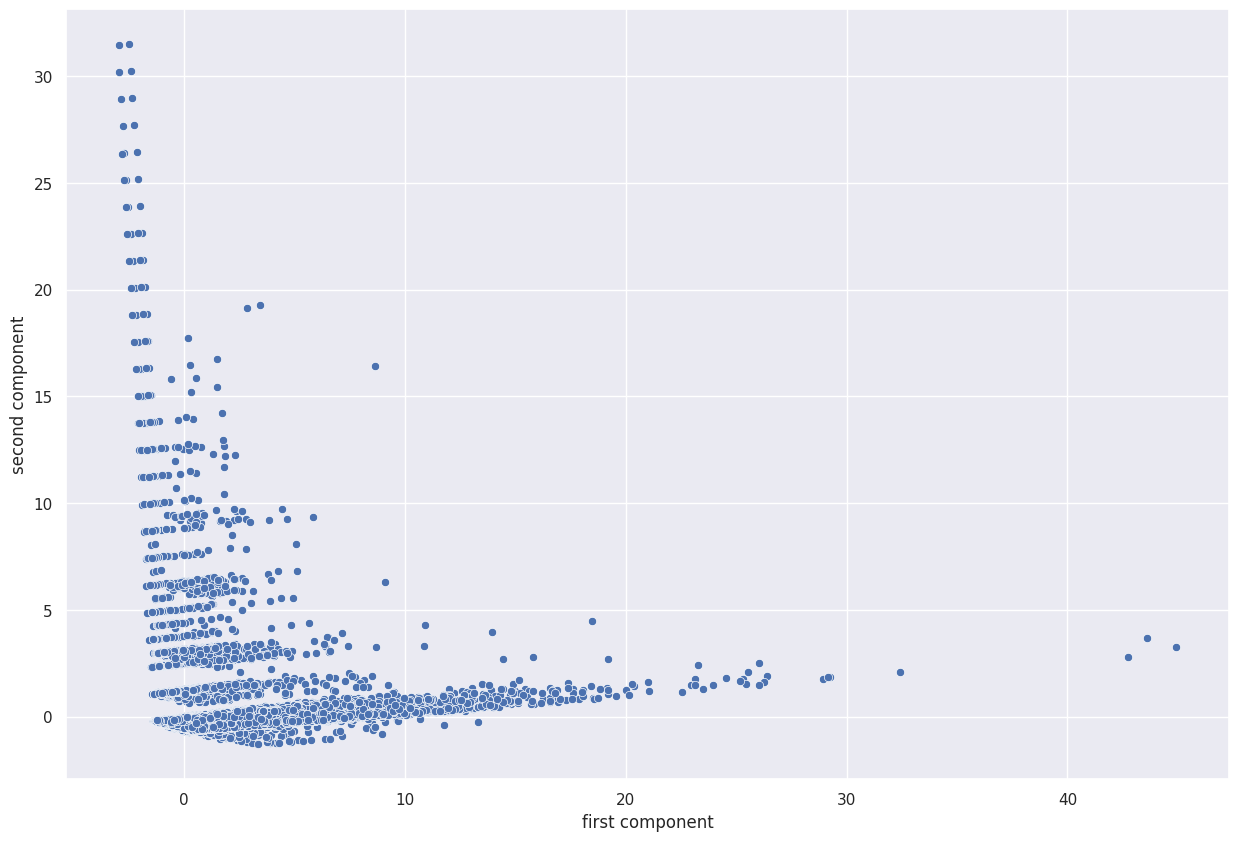

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='first component',y='second component', data=X_pca)
plt.show()

In [ ]:
score=[]
k_num= range(2,8)
best=0

for i in k_num:
    kmean=KMeans(n_clusters=i)
    kmean.fit(X_pca)
    labels=kmean.labels_
    sil_score=(silhouette_score(X_pca,labels,metric='euclidean'))
    score.append(sil_score)

    if best<sil_score:
        best=sil_score
        best_k=i

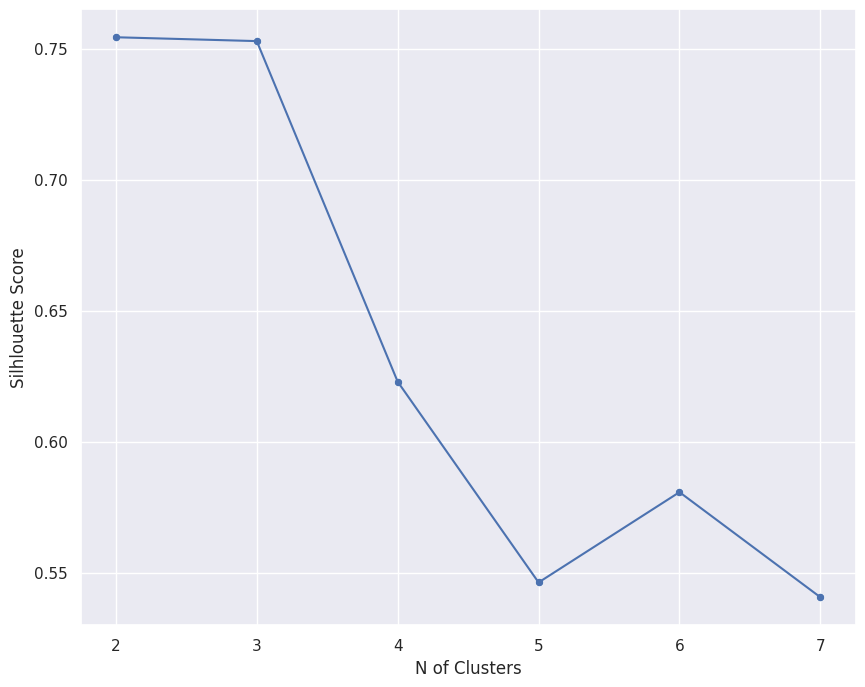

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x=k_num, y=score)
sns.scatterplot(x=k_num, y=score)
plt.xticks(k_num)
plt.ylabel('Silhlouette Score')
plt.xlabel('N of Clusters')
plt.show()

Hasil dari sillhouette score diatas, menunjukan bahwa N cluster dengan score terbesar adalah 2 cluster, tetapi dalam kasus ini, kita membutuhkan lebih dari 2 cluster untuk mengelompokan konsumen agar kita dapat mendapatkan cluster yang lebih spesifik. Sehingga kita memilih cluster yang memiliki sillhouette score kedua terbesar yaitu 5 cluster. Dari hasil pemilihan 5 cluster tersebut kita dapat memberikan aktifitas marketing yang lebih tepat dan spesifik kepada setiap kelompok konsumen/cluster agar lebih efektif dan efisien.

In [ ]:
kmeans=KMeans(n_clusters=5, random_state=2020)
kmeans.fit(X_pca)

KMeans(n_clusters=5, random_state=2020)

In [ ]:
X['cluster']=kmeans.labels_

In [ ]:
X_pca['cluster']=kmeans.labels_

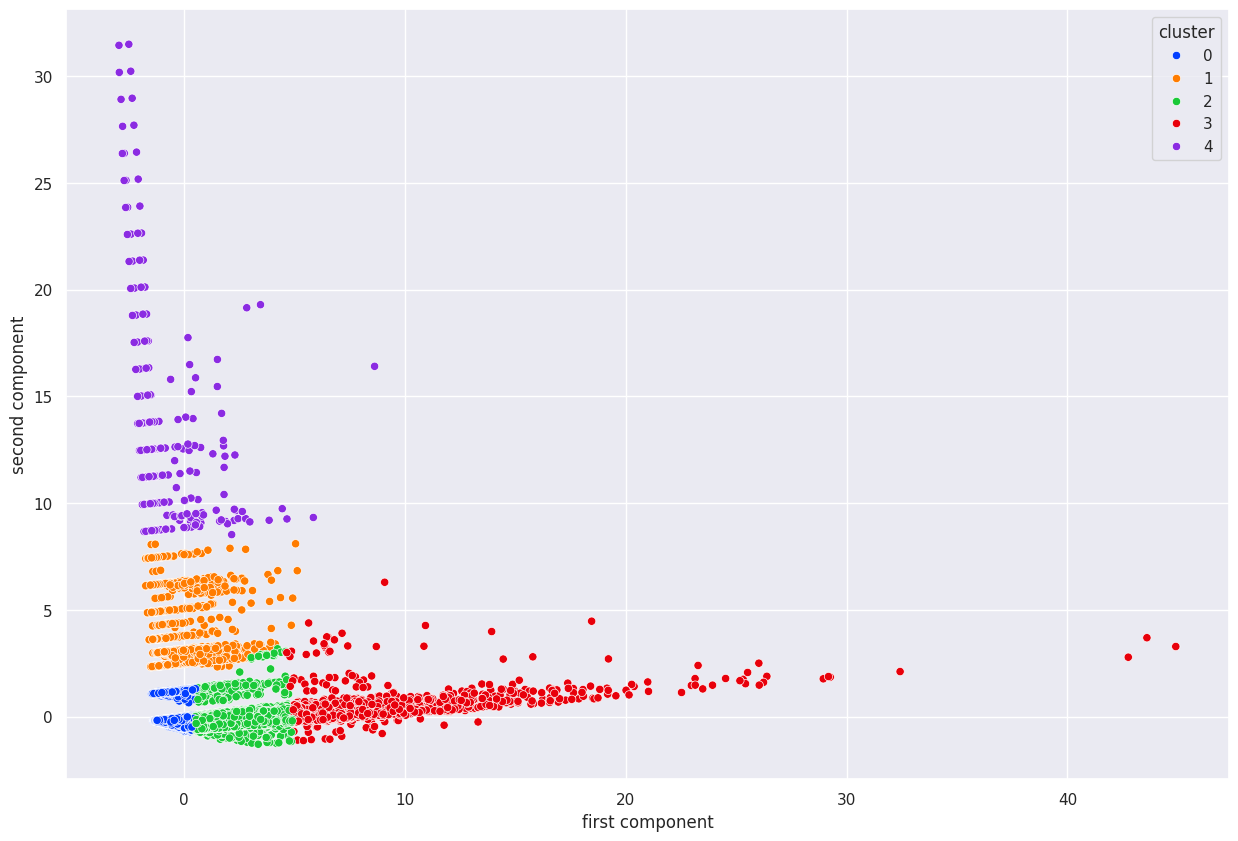

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='first component',y='second component',hue='cluster',data=X_pca,palette='bright')
plt.show()

In [ ]:
X.groupby('cluster').mean()

order_item_id        price  freight_value  payment_sequential  \
cluster                                                                  
0             1.000000    73.485086      16.293899            1.033514   
1             1.654689    92.469346      18.745059            2.260151   
2             1.000873   254.931101      31.961243            1.014346   
3             1.013828  1144.426543      73.135242            1.021370   
4             1.772894   125.550147      19.179597            9.468864   

         payment_installments  payment_value  
cluster                                       
0                    2.065851      92.665964  
1                    2.679123     135.783047  
2                    5.782130     307.447374  
3                    7.113765    1281.097278  
4                    1.655678     109.871429

Dari hasil clustering di atas, dapat di rekomendasikan untuk kegiatan pemasaran yang tepat kepada setiap cluster nya sebagai berikut :

1. Cluster 0 : pelanggan dengan kuantitas pembelian barang rata-rata 1, dengan harga barang rata-rata sedang dan ongkir juga sedang, pembayaran dilakukan rata-rata dengan tipe pembayaran 1 tipe dan rata-rata dilakukan 5 sampai 6 kali cicilan, dan total belanja rata-rata sedang. Cluster ini merupakan pelanggan yang membutuhkan perhatian berdasarkan tingkat pembelian yang sedang, kuantitas yang sedikit, serta melakukan cicilan untuk pembayaranya, maka untuk menarik perhatian dan mendapatkan kepercayaan dari cluster ini, direkomendasikan sebagai berikut ;

   * Pemberian voucer belanja dengan minimal transaksi
   * Pemberian promo cicilan tanpa bunga
   * Pemberian notifikasi mengenai campaign dan promo menarik

2. Cluster 1 : pelanggan dengan kuantitas pembelian barang rata-rata 1, dengan harga barang rata-rata tinggi dan ongkir juga tinggi, pembayaran dilakukan rata-rata dengan tipe pembayaran 1 tipe dan rata-rata dilakukan 7 kali cicilan, dan total belanja rata-rata tinggi. Cluster ini merupakan pelanggan berpotensi yang harus kita jaga berdasarkan tingkat daya beli yang tinggi, sehinga dapat direkomendasikan untuk cluster ini sebagai berikut :

   * Pemberian voucer gratis ongkir atau potongan biaya pengiriman
   * Pemberian promo cicilan tanpa bunga
   * Pemberian notifikasi mengenai campaign dan promo menarik

3. Cluster 2 : pelanggan dengan kuantitas pembelian barang rata-rata 1, dengan harga barang rata-rata rendah dan ongkir juga rendah, pembayaran dilakukan rata-rata dengan tipe pembayaran 1 tipe dan rata-rata dilakukan 2 kali pembayaran/cash, dan total belanja rata-rata rendah. Cluster ini merupakan pelanggan dengan daya beli rendah, untuk meningkatkan daya beli dari cluster tersebut dapat direkomendasikan sebagai berikut :

   * Pemberian sales promotion seperti potongan harga
   * Pemberian voucer belanja dengan minimal transaksi
   * Pemberian notifikasi mengenai campaign dan promo menarik

4. Cluster 3 : pelanggan dengan kuantitas pembelian barang rata-rata 2, dengan harga barang rata-rata rendah dan ongkir juga rendah, pembayaran dilakukan rata-rata dengan tipe pembayaran 1 tipe dan rata-rata dilakukan 3 sampai 4 kali cicilan, dan total belanja rata-rata sedang. Cluster ini merupakan pelanggan dengan metode pembayaran dilakukan sampai 4 kali tetapi pembelian nya rendah, untuk menarik perhatian cluster ini, dapat direkomendasikan sebagai berikut :

   * Pemberian voucer spesial potongan harga
   * Pemberian promo cicilan tanpa bunga
   * Pemberian notifikasi mengenai campaign dan promo menarik

5. Cluster 4 : pelanggan dengan kuantitas pembelian barang rata-rata 1, dengan harga barang rata-rata sedang dan ongkir juga sedang, pembayaran dilakukan rata-rata dengan tipe pembayaran 7 sampai 8 tipe dan rata-rata dilakukan 1 kali pembayaran/cash, dan total belanja rata-rata rendah. Cluster ini merupakan pelanggan dengan tipe pembayaran yang variatif, sehingga untuk menarik perhatian pelanggan tersebut, dapat direkomendasikan sebagai berikut :

   * Pemberian voucer potongan harga dengan tipe pembayaran tertentu
   * Pemberian voucer gratis ongkir atau potongan biaya pengiriman
   * Pemberian notifikasi mengenai campaign dan promo menarik

Diharapkan dengan setiap rekomendasi untuk mempermudah team pemasaran melakukan aktivitas kepada setiap clusternya dan pelanggan lebih terpacu untuk berbelanja kembali.

# RFM Data Preparation

In [ ]:
df_rfm=df[['order_id','customer_unique_id','price','order_purchase_timestamp']].copy()

In [ ]:
df_rfm['frequency']=1
df_rfm.head()

order_id                customer_unique_id  price  \
0  d455a8cb295653b55abda06d434ab492  3c7e305796add66698959fc7ad176f6b  895.0   
1  7f39ba4c9052be115350065d07583cac  9de5797cddb92598755a0f76383ddbbb  895.0   
2  9dc8d1a6f16f1b89874c29c9d8d30447  9915eb9f74b6c11aaf04833f65b00e93  895.0   
3  0f548bd29148ebc519d6495e37a284e1  dce323533e45e74d215e0fe7fb114118   99.0   
4  4dcbd5ebfc13eef35e0fcb0ca1c2807e  acfca8c3549ceceba9e125afc0349610   99.0   

  order_purchase_timestamp  frequency  
0      2017-09-26 22:17:05          1  
1      2017-10-18 08:16:34          1  
2      2017-10-12 13:33:22          1  
3      2017-09-03 08:06:30          1  
4      2017-10-22 16:39:09          1

In [ ]:
df_rfm=df_rfm.groupby(['customer_unique_id']).aggregate({'order_id' : 'first', 'price' : 'sum', 'order_purchase_timestamp' : 'max' ,'frequency' : 'sum'}).reset_index()
df_rfm

customer_unique_id                          order_id  \
0      0000366f3b9a7992bf8c76cfdf3221e2  e22acc9c116caa3f2b7121bbb380d08e   
1      0000b849f77a49e4a4ce2b2a4ca5be3f  3594e05a005ac4d06a72673270ef9ec9   
2      0000f46a3911fa3c0805444483337064  b33ec3b699337181488304f362a6b734   
3      0000f6ccb0745a6a4b88665a16c9f078  41272756ecddd9a9ed0180413cc22fb6   
4      0004aac84e0df4da2b147fca70cf8255  d957021f1127559cd947b62533f484f7   
...                                 ...                               ...   
91441  fffcf5a5ff07b0908bd4e2dbc735a684  725cf8e9c24e679a8a5a32cb92c9ce1e   
91442  fffea47cd6d3cc0a88bd621562a9d061  c71b9252fd7b3b263aaa4cb09319a323   
91443  ffff371b4d645b6ecea244b27531430a  fdc45e6c7555e6cb3cc0daca2557dbe1   
91444  ffff5962728ec6157033ef9805bacc48  94d3ee0bc2a0af9d4fa47a4d63616e8d   
91445  ffffd2657e2aad2907e67c3e9daecbeb  f79a35da168301ae56922475da21117b   

        price order_purchase_timestamp  frequency  
0      129.90      2018-05-10 10:56:27          1  
1       18.90      2018-05-07 11:11:27          1  
2       69.00      2017-03-10 21:05:03          1  
3       25.99      2017-10-12 20:29:41          1  
4      180.00      2017-11-14 19:45:42          1  
...       ...                      ...        ...  
91441  680.00      2017-06-08 21:00:36          1  
91442   64.89      2017-12-10 20:07:56          1  
91443   89.90      2017-02-07 15:49:16          1  
91444  115.00      2018-05-02 15:17:41          1  
91445   56.99      2017-05-02 20:18:45          1  

[91446 rows x 5 columns]

In [ ]:
df_rfm[['price']]

price
0      129.90
1       18.90
2       69.00
3       25.99
4      180.00
...       ...
91441  680.00
91442   64.89
91443   89.90
91444  115.00
91445   56.99

[91446 rows x 1 columns]

In [ ]:
df_rfm.shape[0]

91446

In [ ]:
df_rfm['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

In [ ]:
setpoint=pd.to_datetime(df_rfm['order_purchase_timestamp'].max())

In [ ]:
df_rfm['order_purchase_timestamp']=pd.to_datetime(df_rfm['order_purchase_timestamp'])

In [ ]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91446 entries, 0 to 91445
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        91446 non-null  object        
 1   order_id                  91446 non-null  object        
 2   price                     91446 non-null  float64       
 3   order_purchase_timestamp  91446 non-null  datetime64[ns]
 4   frequency                 91446 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.5+ MB


In [ ]:
df_rfm['recency'] = (df_rfm['order_purchase_timestamp'].apply(lambda x: setpoint - x) / pd.Timedelta(days=1)).astype(int)

#EDA RFM

In [ ]:
rfm=df_rfm[['customer_unique_id','recency','frequency','price']].rename(columns = {'price':'monetary'}).copy()
rfm.head()

customer_unique_id  recency  frequency  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     18.90
2  0000f46a3911fa3c0805444483337064      536          1     69.00
3  0000f6ccb0745a6a4b88665a16c9f078      320          1     25.99
4  0004aac84e0df4da2b147fca70cf8255      287          1    180.00

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91446 entries, 0 to 91445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  91446 non-null  object 
 1   recency             91446 non-null  int64  
 2   frequency           91446 non-null  int64  
 3   monetary            91446 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.8+ MB


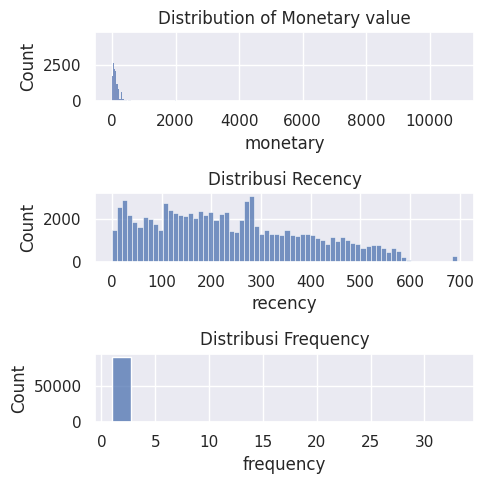

In [ ]:
plt.figure(figsize=(5,5))

plt.subplot(3,1,1)
sns.histplot(data=rfm['monetary'])
plt.title('Distribution of Monetary value')

plt.subplot(3,1,2)
sns.histplot(data=rfm['recency'])
plt.title('Distribusi Recency')

plt.subplot(3,1,3)
sns.histplot(data=rfm['frequency'])
plt.title('Distribusi Frequency')
plt.tight_layout()

Dari histplot diatas terlihat bahwa kolom recency, monetary, dan frequency datanya terdistribusi tidak normal, karena itu kita akan menggunakan median untuk menentukan titik tengah / central tendency nya.

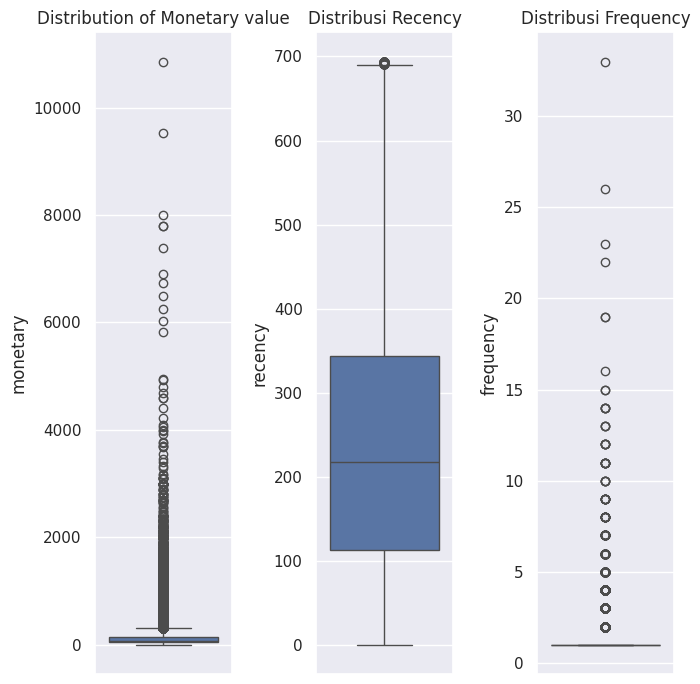

In [ ]:
plt.figure(figsize=(7,7))

plt.subplot(1,3,1)
sns.boxplot(data=rfm['monetary'])
plt.title('Distribution of Monetary value')

plt.subplot(1,3,2)
sns.boxplot(data=rfm['recency'])
plt.title('Distribusi Recency')

plt.subplot(1,3,3)
sns.boxplot(data=rfm['frequency'])
plt.title('Distribusi Frequency')
plt.tight_layout()

boxplot kolom monetary dan frequency tidak dapat dibaca karena memiliki outlier yang nilainya jauh

In [ ]:
df_rfm['frequency'].value_counts(normalize=True)

frequency
1     0.941944
2     0.048706
3     0.005566
4     0.001673
5     0.000733
6     0.000492
7     0.000317
8     0.000131
9     0.000087
11    0.000077
12    0.000055
10    0.000044
14    0.000044
13    0.000033
15    0.000022
19    0.000022
16    0.000011
22    0.000011
26    0.000011
33    0.000011
23    0.000011
Name: proportion, dtype: float64

In [ ]:
rfm.describe()

recency     frequency      monetary
count  91446.000000  91446.000000  91446.000000
mean     236.094963      1.078451    134.989856
std      152.586100      0.446384    220.505076
min        0.000000      1.000000      0.850000
25%      113.000000      1.000000     44.900000
50%      217.000000      1.000000     80.000000
75%      344.000000      1.000000    149.000000
max      694.000000     33.000000  10856.100000

# RFM Cluster Segmentation

Dari visualisasi diatas dapat dilihat bahwa banyak pengguna yang hanya melakukan 1 kali transaksi yaitu sebesar 94% dari seluruh pengguna di Olist marketplace. Karena terdapat 21 nunique pada nilai **`frequency`** dan nilai Q1,Q2 dan Q3 nya memiliki nilai yang sama besar (1) maka akan dilakukan pembagian sebagai berikut:

* Customer dengan frequency pembelian <=5 akan diberikan label frequency 1
* Customer dengan frequency pembelian 6-10 akan diberikan label frequency 2
* Customer dengan frequency pembelian 11-15 akan diberikan label frequency 3
* Customer dengan frequency pembelian >=16 akan diberikan label frequency 4

Sedangkan pada **`monetary`** dan **`recency`** akan dilakukan pembagian sebagai berikut :
* Customer dengan nilai monetary dan recency nya masing-masing <= Q1 akan diberikan label 1
* Customer dengan nilai monetary dan recency nya masing-masing > Q1 & <= median akan diberikan label 2
* Customer dengan nilai monetary dan recency nya masing-masing > median & <= Q3 akan diberikan label 3
* Customer dengan nilai monetary dan recency nya masing-masing > Q3 akan diberikan label 4

In [ ]:
# First calculate the quartiles once (outside the functions)
recency_quartiles = {
    'lower': rfm['recency'].quantile(0.25),
    'median': rfm['recency'].median(),
    'upper': rfm['recency'].quantile(0.75)
}

monetary_quartiles = {
    'lower': rfm['monetary'].quantile(0.25),
    'median': rfm['monetary'].median(),
    'upper': rfm['monetary'].quantile(0.75)
}

# Vectorized version for recency
def score_recency(series):
    conditions = [
        series <= recency_quartiles['lower'],
        (series > recency_quartiles['lower']) & (series <= recency_quartiles['median']),
        (series > recency_quartiles['median']) & (series <= recency_quartiles['upper']),
        series > recency_quartiles['upper']
    ]
    values = [1, 2, 3, 4]
    return np.select(conditions, values)

# Vectorized version for frequency
def score_frequency(series):
    conditions = [
        series <= 5,
        (series > 5) & (series <= 10),
        (series > 10) & (series <= 15),
        series > 15
    ]
    values = [1, 2, 3, 4]
    return np.select(conditions, values)

# Vectorized version for monetary
def score_monetary(series):
    conditions = [
        series <= monetary_quartiles['lower'],
        (series > monetary_quartiles['lower']) & (series <= monetary_quartiles['median']),
        (series > monetary_quartiles['median']) & (series <= monetary_quartiles['upper']),
        series > monetary_quartiles['upper']
    ]
    values = [1, 2, 3, 4]
    return np.select(conditions, values)

# Apply all transformations at once
rfm = rfm.assign(
    r=score_recency(rfm['recency']),
    f=score_frequency(rfm['frequency']),
    m=score_monetary(rfm['monetary'])
)

In [ ]:
rfm['r'].value_counts()

r
1    23163
4    22846
3    22747
2    22690
Name: count, dtype: int64

In [ ]:
rfm['f'].value_counts()

f
1    91320
2       98
3       21
4        7
Name: count, dtype: int64

In [ ]:
rfm['m'].value_counts()

m
3    23081
1    23058
2    22778
4    22529
Name: count, dtype: int64

In [ ]:
rfm['rfm_segment']=rfm['r'].map(str)+ rfm['f'].map(str) +rfm['m'].map(str)
rfm.head()

customer_unique_id  recency  frequency  monetary  r  f  m  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    129.90  1  1  3   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     18.90  2  1  1   
2  0000f46a3911fa3c0805444483337064      536          1     69.00  4  1  2   
3  0000f6ccb0745a6a4b88665a16c9f078      320          1     25.99  3  1  1   
4  0004aac84e0df4da2b147fca70cf8255      287          1    180.00  3  1  4   

  rfm_segment  
0         113  
1         211  
2         412  
3         311  
4         314

In [ ]:
rfm['rfm_segment']=rfm['rfm_segment'].map(int)

In [ ]:
rfm['rfm_score']=rfm[['r','f','m']].sum(axis=1)
rfm.head()

customer_unique_id  recency  frequency  monetary  r  f  m  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    129.90  1  1  3   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     18.90  2  1  1   
2  0000f46a3911fa3c0805444483337064      536          1     69.00  4  1  2   
3  0000f6ccb0745a6a4b88665a16c9f078      320          1     25.99  3  1  1   
4  0004aac84e0df4da2b147fca70cf8255      287          1    180.00  3  1  4   

   rfm_segment  rfm_score  
0          113          5  
1          211          4  
2          412          7  
3          311          5  
4          314          8

In [ ]:
rfm['rfm_score'].mean()

np.float64(5.9898519344749905)

In [ ]:
def rfm_level(rfm):
    if((rfm['rfm_score'] >= 8) & (rfm['r'] <= 2)) :
        return 'Cant Lose Them'
    elif rfm['rfm_score'] >= 9 :
        return 'Champion'
    elif ((rfm['rfm_score'] >= 7) & (rfm['f'] >= 2)) :
        return 'Loyal Customers'
    elif rfm['rfm_score'] >= 5.992049779099777 :
        return 'Need Attention'
    elif ((rfm['rfm_score'] < 5.992049779099777) & (rfm['rfm_score'] >= 4)) :
        return 'About to Sleep'
    else:
        return 'Lost Customers'

In [ ]:
rfm['customer_segment'] = rfm.apply(rfm_level, axis=1)

In [ ]:
rfm['customer_segment'].value_counts(normalize=True)

customer_segment
Need Attention     0.561982
About to Sleep     0.311047
Lost Customers     0.064257
Champion           0.062102
Cant Lose Them     0.000339
Loyal Customers    0.000273
Name: proportion, dtype: float64

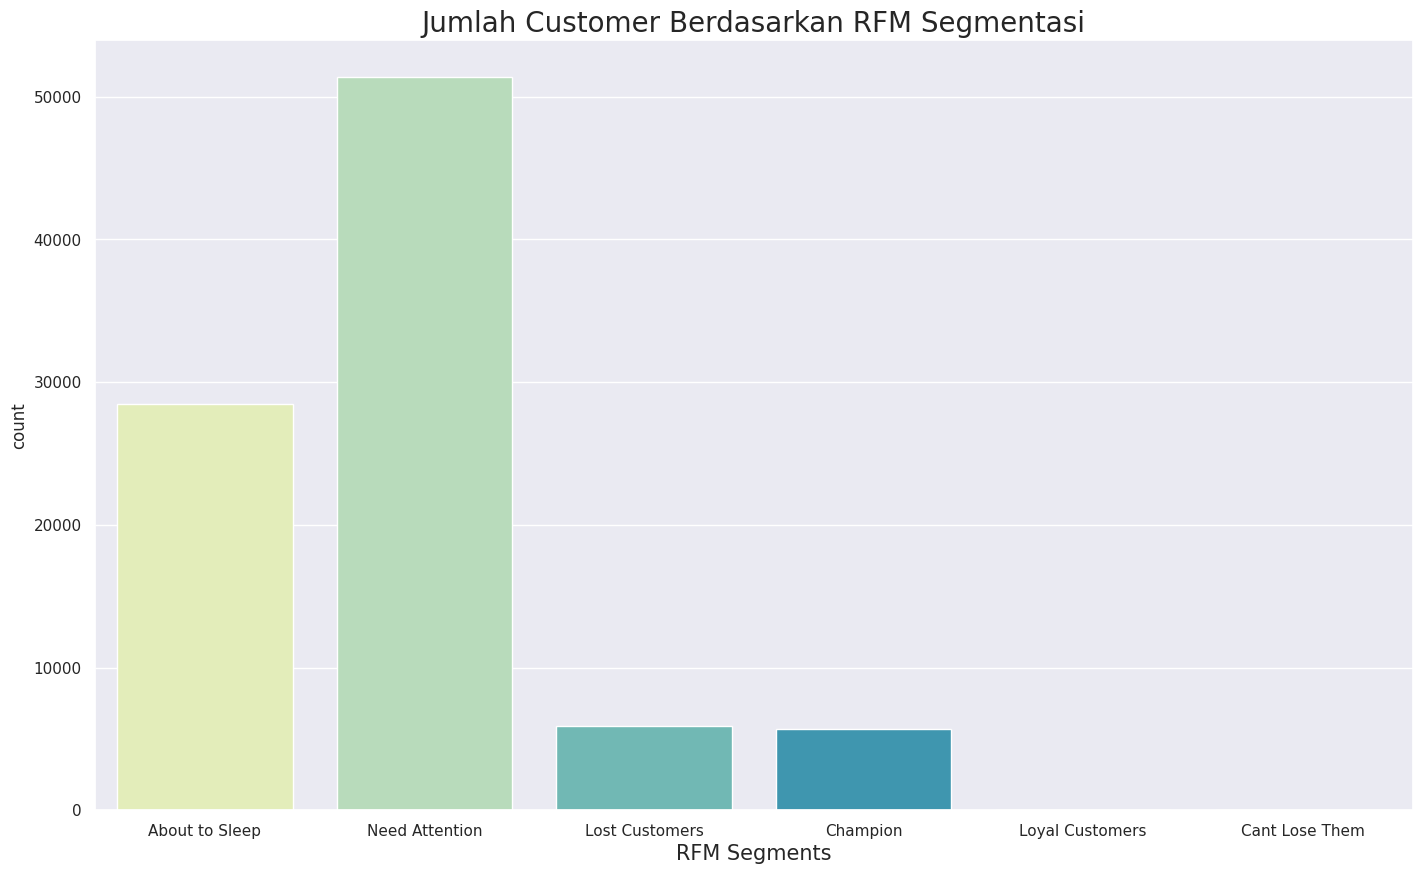

In [ ]:
plt.figure(figsize=(17,10))
sns.countplot(data=rfm, x='customer_segment',palette='YlGnBu')
plt.xlabel('RFM Segments',size=15)
plt.title('Jumlah Customer Berdasarkan RFM Segmentasi',size=20)
plt.show()

Customer Segmentation menggunakan RFM dibagi berdasarkan :

* Champion : Melakukan pembelian dalam waktu dekat, terus menerus, dan mengeluarkan banyak uang, Mereka adalah top custemer yang mendukung perusahaan. Hubungan baik antar Olist dan kelompok customer ini perlu dijaga agar tetap terjalin dengan baik.

Direkomendasikan untuk cluster ini sebagai berikut :

    1. Menawarkan program loyalitas seperti pembagian kelompok berdasarkan frekuensi transaksi untuk mendapatkan promo menarik di setiap pengelompokan nya.
    2. Memberikan pesan personal dengan sifat persuasif dengan penawaran promo spesial atau khusus untuk cluster tersebut
    3. Memberikan kupon spesial sebagai reward

* Cant Lose Them : Sempat melakukan pembelian terus menerus, dan mengeluarkan banyak uang, tetapi sudah lama tidak melakukan pembelian, Penting untuk mendapatkan kembali minat orang-orang ini di perusahaan. Grup ini menunjukkan sebagian pelanggan yang lama kelamaan kehilangan minat terhadap perusahaan. Oleh karena itu perusahaan perlu mendapatkan kembali perhatian dari kelompok customer ini.

Direkomendasikan untuk cluster ini sebagai berikut :

    1. Memberikan kupon spesial sebagai reward
    2. Memberikan pesan personal dengan sifat persuasif dengan penawaran promo spesial atau khusus untuk cluster tersebut
    3. Memberikan push notification dan broadcast message untuk menarik perhatian

* Need Attention : Melakukan pembelian, menghabiskan uang, dan menggunakan Olist diatas rata-rata tetapi tidak terlalu besar, Kelompok ini membutuhkan tindakan agar mereka dapat merasakan bahwa perusahaan (Olist) dapat menawarkan kondisi terbaik dan memenuhi semua harapan mereka.

Direkomendasikan untuk cluster ini sebagai berikut :

    1. Melakukan kampanye dan memilih Brand ambasador yang kuat untuk mendapatkan perhatian dan kepercayaan pelanggan
    2. Menawarkan voucer promo terbatas
    3. Memberikan push notification dan broadcast message untuk menarik perhatian

* About to Sleep : Melakukan pembelian, menghabiskan uang, dan menggunakan Olist dibawah rata-rata tetapi masih aktif, Grup ini penting diperhatikan karena masih adanya potensi pembelian dari kelompok customer ini.

Direkomendasikan untuk cluster ini sebagai berikut :

    1. Menawarkan voucer promo terbatas
    2. Menawarkan voucer potongan harga dengan minimal transaksi
    3. Memberikan push notification dan broadcast message untuk menarik perhatian

* Lost Customer : Customer yang memiliki nilai rfm terkecil, dianggap customer yang churn.

Direkomendasikan untuk cluster ini sebagai berikut :

    1. Menawarkan program loyalitas atau voucher diskon
    2. Memberikan pesan personal dengan sifat persuasif dengan penawaran promo spesial atau khusus untuk cluster tersebut
    3. Kampanye promosi dengan waktu yang terbatas, untuk menciptakan sensasi yang tidak dapat dilewatkan

In [ ]:
rfm.groupby('customer_segment')[['recency', 'frequency', 'monetary']].mean().round(2)

recency  frequency  monetary
customer_segment                              
About to Sleep     142.40       1.03     58.61
Cant Lose Them     157.52       8.45   1365.10
Champion           447.82       1.26    362.60
Lost Customers      55.99       1.01     27.88
Loyal Customers    120.92       6.80    924.15
Need Attention     285.25       1.09    163.23

<Axes: title={'center': 'Jumlah Pelanggan per Segmen'}, ylabel='customer_segment'>

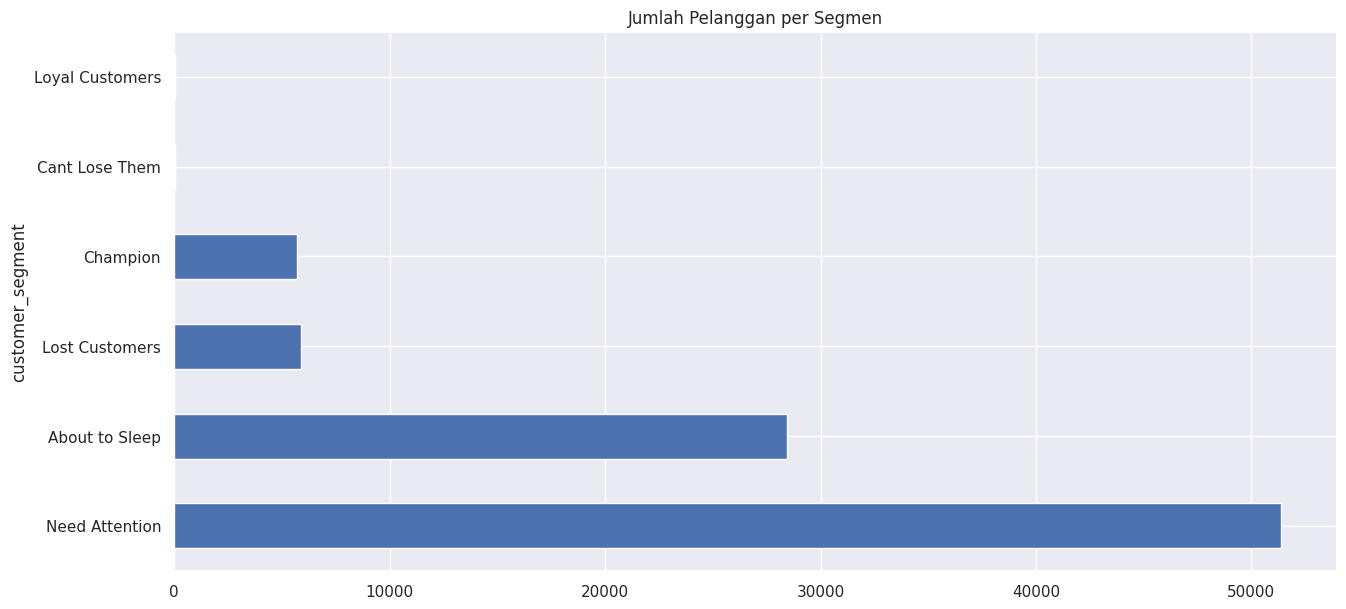

In [ ]:
rfm['customer_segment'].value_counts().plot(kind='barh', title='Jumlah Pelanggan per Segmen')

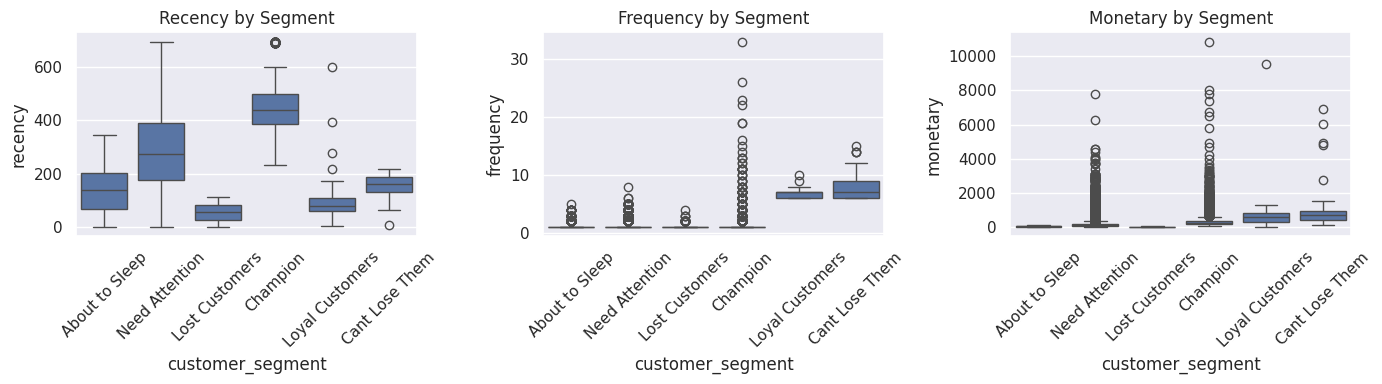

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.boxplot(x='customer_segment', y='recency', data=rfm)
plt.xticks(rotation=45)
plt.title('Recency by Segment')

plt.subplot(1,3,2)
sns.boxplot(x='customer_segment', y='frequency', data=rfm)
plt.xticks(rotation=45)
plt.title('Frequency by Segment')

plt.subplot(1,3,3)
sns.boxplot(x='customer_segment', y='monetary', data=rfm)
plt.xticks(rotation=45)
plt.title('Monetary by Segment')

plt.tight_layout()
plt.show()


<Axes: title={'center': 'Jumlah Pelanggan per Segmen'}, ylabel='customer_segment'>

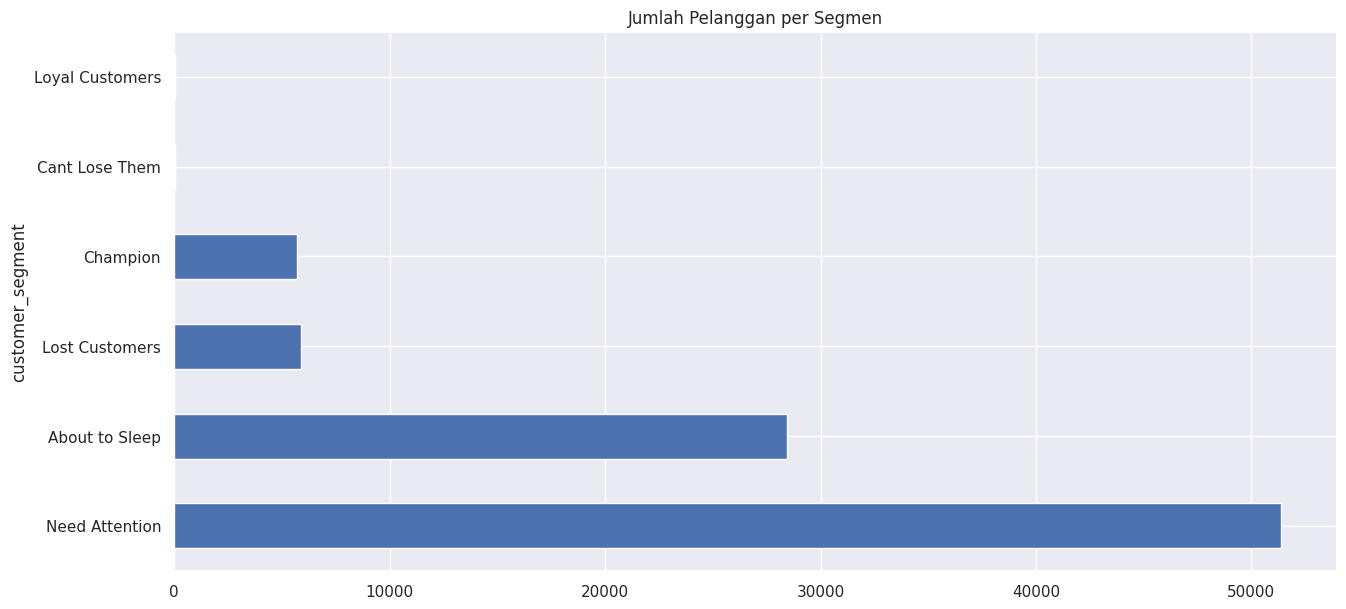

In [ ]:
rfm['customer_segment'].value_counts().plot(kind='barh', title='Jumlah Pelanggan per Segmen')


<Axes: ylabel='proportion'>

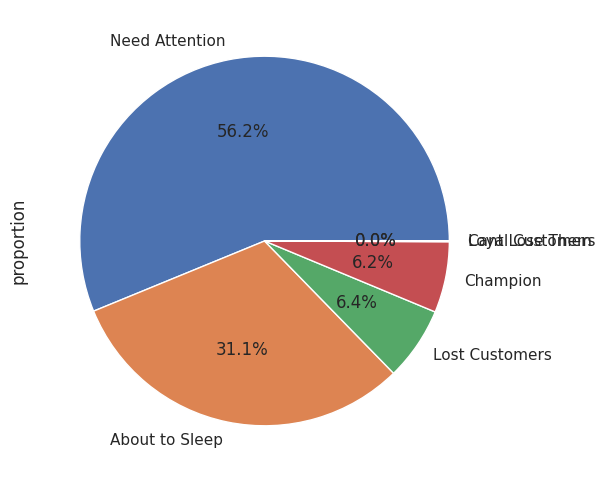

In [ ]:
rfm['customer_segment'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))


In [ ]:
rfm.groupby(['r', 'f'])['customer_segment'].count().unstack().fillna(0).style.background_gradient(cmap='Blues')


In [ ]:
# Rata-rata recency, frequency, monetary per segmen
rfm_behavior = rfm.groupby('customer_segment')[['recency', 'frequency', 'monetary']].mean().round(2)
print(rfm_behavior)


                  recency  frequency  monetary
customer_segment                              
About to Sleep     142.40       1.03     58.61
Cant Lose Them     157.52       8.45   1365.10
Champion           447.82       1.26    362.60
Lost Customers      55.99       1.01     27.88
Loyal Customers    120.92       6.80    924.15
Need Attention     285.25       1.09    163.23


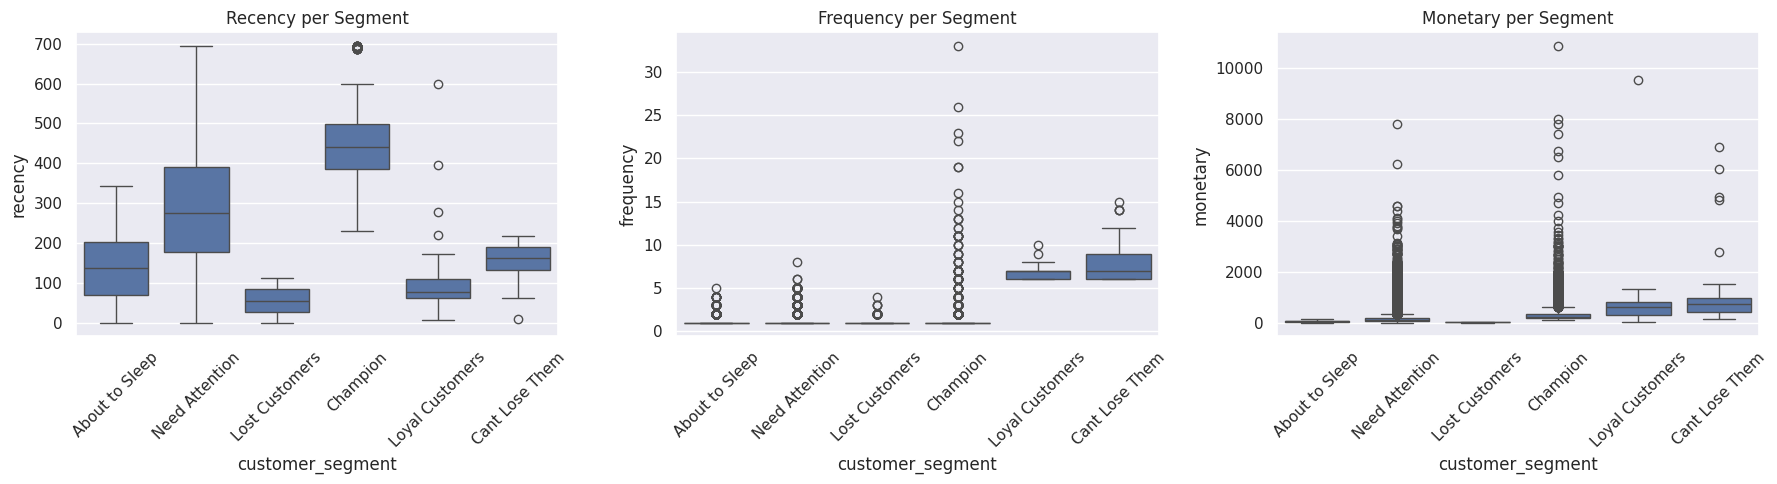

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

# Recency
plt.subplot(1, 3, 1)
sns.boxplot(x='customer_segment', y='recency', data=rfm)
plt.xticks(rotation=45)
plt.title('Recency per Segment')

# Frequency
plt.subplot(1, 3, 2)
sns.boxplot(x='customer_segment', y='frequency', data=rfm)
plt.xticks(rotation=45)
plt.title('Frequency per Segment')

# Monetary
plt.subplot(1, 3, 3)
sns.boxplot(x='customer_segment', y='monetary', data=rfm)
plt.xticks(rotation=45)
plt.title('Monetary per Segment')

plt.tight_layout()
plt.show()


<Axes: title={'center': 'Proporsi Segmen Pelanggan'}, ylabel='proportion'>

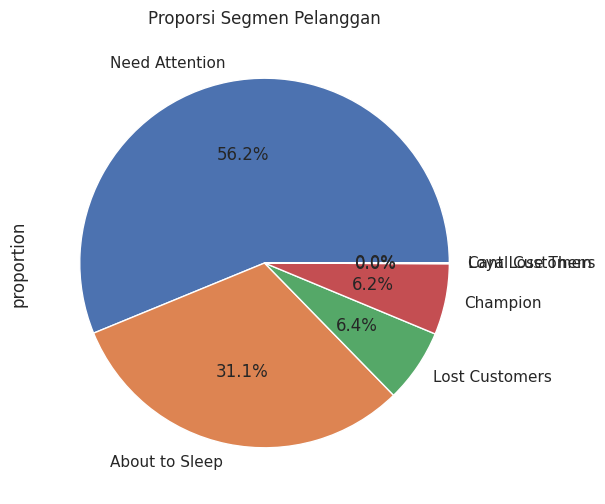

In [ ]:
rfm['customer_segment'].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    title='Proporsi Segmen Pelanggan'
)


<Axes: title={'center': 'Jumlah Pelanggan per Segmen'}, ylabel='customer_segment'>

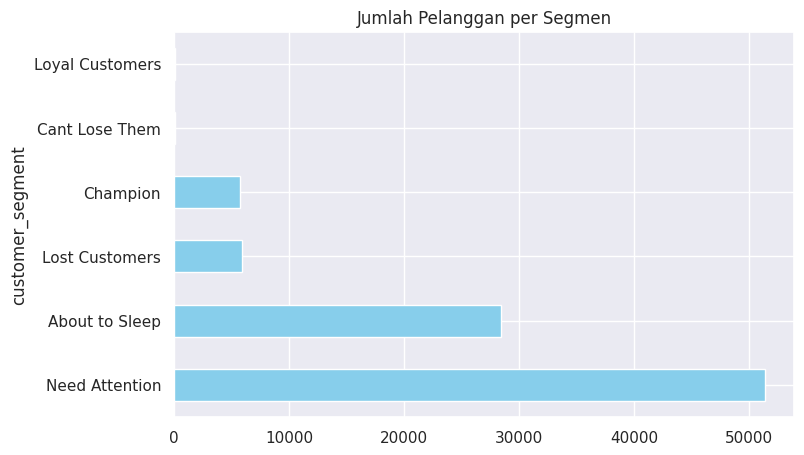

In [ ]:
rfm['customer_segment'].value_counts().plot(
    kind='barh',
    figsize=(8,5),
    title='Jumlah Pelanggan per Segmen',
    color='skyblue'
)


In [ ]:
pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(
    rfm,
    x='recency',
    y='frequency',
    size='monetary',
    color='customer_segment',
    hover_data=['customer_unique_id'],
    title='Customer Segmentation based on RFM',
    size_max=60,
    opacity=0.6
)
fig.show()


In [ ]:
rfm_heatmap = rfm.groupby(['r', 'f'])['m'].mean().reset_index()

fig = px.density_heatmap(
    rfm_heatmap,
    x='r', y='f', z='m',
    color_continuous_scale='Blues',
    title='Heatmap RFM: R vs F by avg Monetary'
)
fig.show()


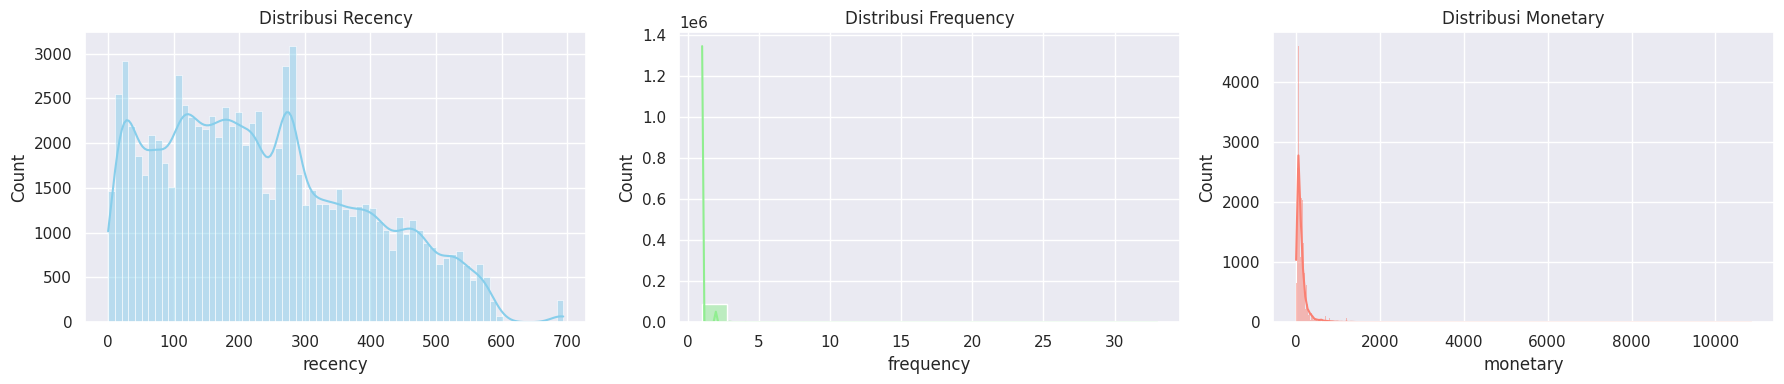

In [ ]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
sns.histplot(rfm['recency'], kde=True, color='skyblue')
plt.title('Distribusi Recency')

plt.subplot(1, 3, 2)
sns.histplot(rfm['frequency'], kde=True, color='lightgreen')
plt.title('Distribusi Frequency')

plt.subplot(1, 3, 3)
sns.histplot(rfm['monetary'], kde=True, color='salmon')
plt.title('Distribusi Monetary')

plt.tight_layout()
plt.show()


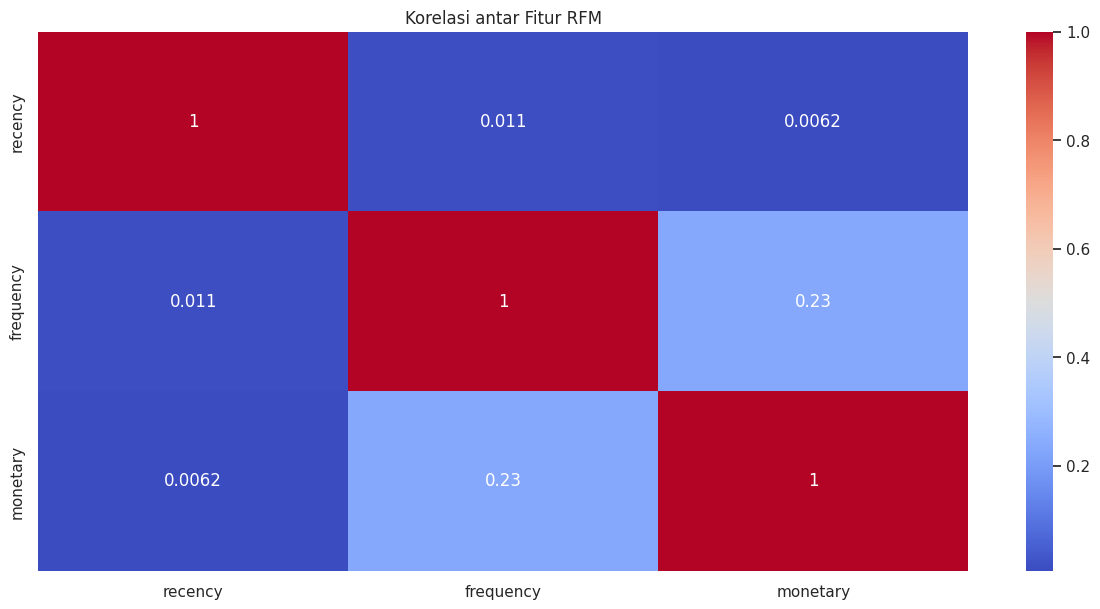

In [ ]:
corr = rfm[['recency', 'frequency', 'monetary']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur RFM')
plt.show()


# Clustering RFM with KMeans

In [ ]:
rfm.head()

customer_unique_id  recency  frequency  monetary  r  f  m  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    129.90  1  1  3   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     18.90  2  1  1   
2  0000f46a3911fa3c0805444483337064      536          1     69.00  4  1  2   
3  0000f6ccb0745a6a4b88665a16c9f078      320          1     25.99  3  1  1   
4  0004aac84e0df4da2b147fca70cf8255      287          1    180.00  3  1  4   

   rfm_segment  rfm_score customer_segment  
0          113          5   About to Sleep  
1          211          4   About to Sleep  
2          412          7   Need Attention  
3          311          5   About to Sleep  
4          314          8   Need Attention

In [ ]:
x=rfm[['recency','frequency','monetary']]
x.head()

recency  frequency  monetary
0      111          1    129.90
1      114          1     18.90
2      536          1     69.00
3      320          1     25.99
4      287          1    180.00

In [ ]:
score = []
k_range = range(2, 10)
best_score = -1
best_k = None

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(x)
    sil_score = silhouette_score(x, labels, metric='euclidean')
    score.append(sil_score)

    if sil_score > best_score:
        best_score = sil_score
        best_k = k

Text(0.5, 0, 'N of Clusters')

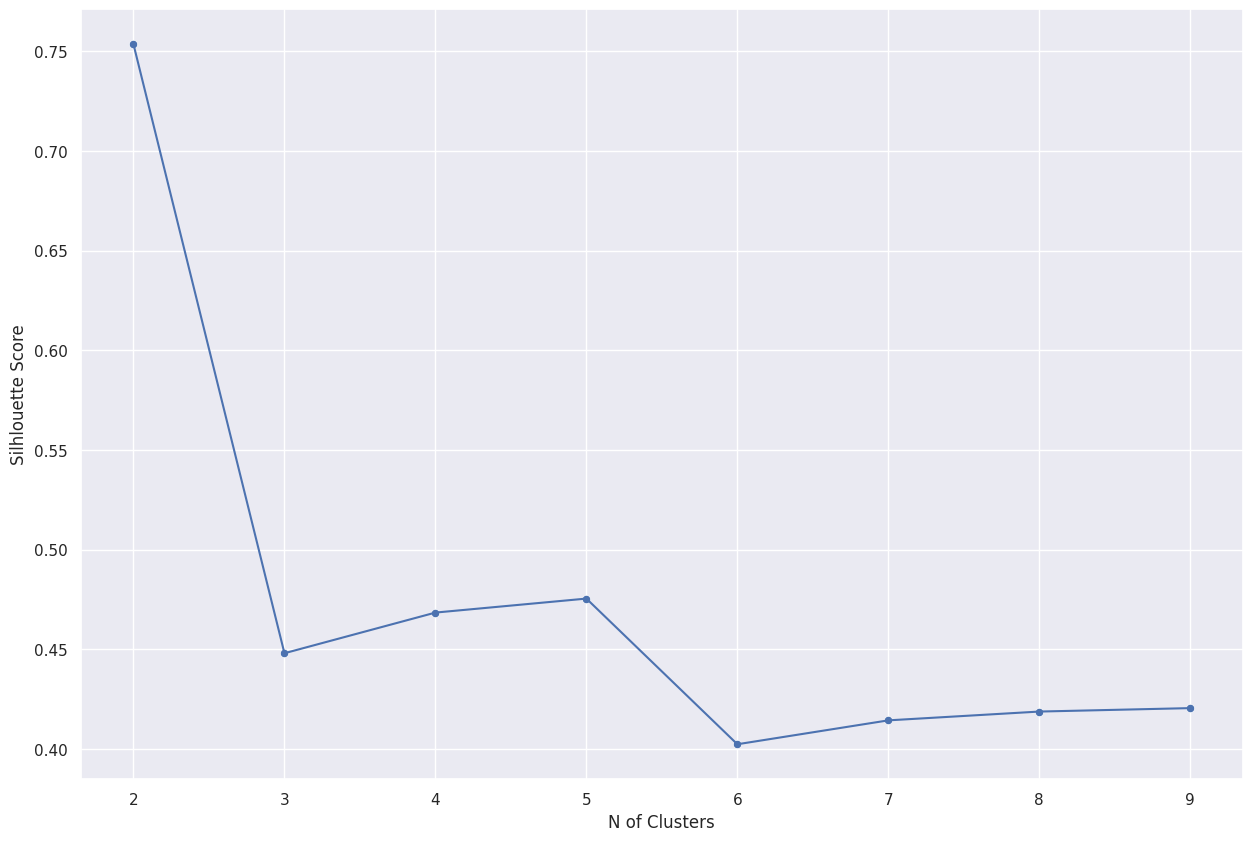

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x=range(2, 10), y=score) # Pass x and y as keyword arguments
sns.scatterplot(x=range(2, 10), y=score) # Pass x and y as keyword arguments
plt.xticks(range(2, 10))
plt.ylabel('Silhlouette Score')
plt.xlabel('N of Clusters')

In [ ]:
k=range(1,10)
inertia=[]

for i in k:
    model=KMeans(n_clusters=i)
    model.fit(x)
    inertia.append(model.inertia_)

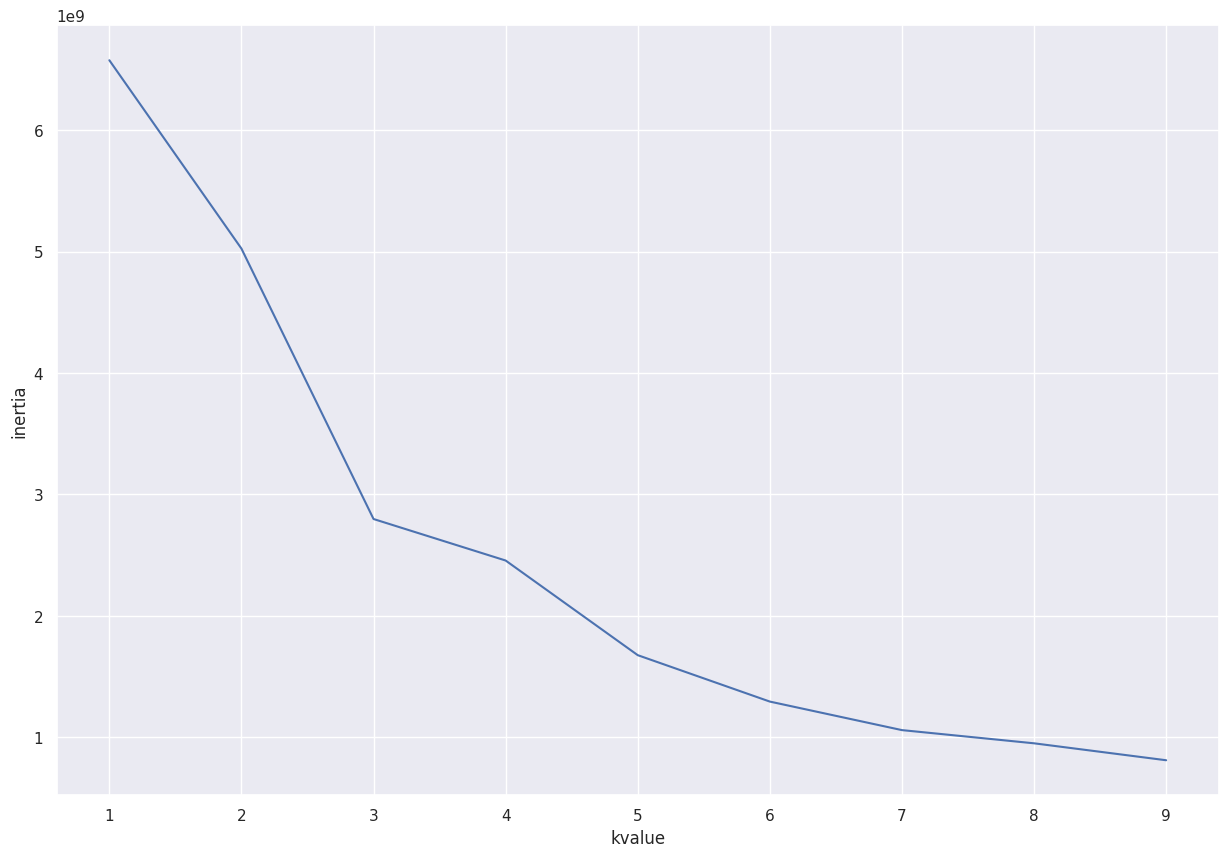

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(k,inertia)
plt.xlabel('kvalue')
plt.ylabel('inertia')
plt.show()

Hasil dari sillhouette score diatas, menunjukan bahwa N cluster dengan score terbesar adalah 2 cluster, tetapi dalam kasus ini, kita membutuhkan lebih dari 2 cluster untuk mengelompokan konsumen agar kita dapat mendapatkan cluster yang lebih spesifik. Sehingga kita memilih cluster yang memiliki sillhouette score kedua terbesar yaitu 5 cluster. Dari hasil pemilihan 5 cluster tersebut kita dapat memberikan aktifitas marketing yang lebih tepat dan spesifik kepada setiap kelompok konsumen/cluster agar lebih efektif dan efisien.

In [ ]:
kmeans=KMeans(n_clusters=5, random_state=2020)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=2020)

In [ ]:
x['cluster4']=kmeans.labels_
x.head()

recency  frequency  monetary  cluster4
0      111          1    129.90         1
1      114          1     18.90         1
2      536          1     69.00         0
3      320          1     25.99         0
4      287          1    180.00         0

In [ ]:
x.groupby('cluster4').mean()

recency  frequency     monetary
cluster4                                    
0         386.563899   1.059511    94.127518
1         125.907717   1.056185    92.617986
2         239.659394   1.575758  1570.968533
3         228.972130   1.300993   516.692144
4         268.354839   3.709677  5451.676129

Dari hasil clustering di atas, dapat di rekomendasikan untuk kegiatan pemasaran yang tepat kepada setiap cluster nya sebagai berikut :
* Cluster 0 : pelanggan yang lebih dari satu tahun tidak melakukan transaksi, dengan rata-rata frekuensi pembelian 1 kali dan telah melakukan transaksi dengan total pembelian rendah. Cluster ini dapat dibilang pelanggan lost, sehingga dapat direkomendasikan untuk cluster ini sebagai berikut :

    1. Menawarkan program loyalitas atau voucher diskon
    2. Memberikan pesan personal dengan sifat persuasif dengan penawaran promo spesial atau khusus untuk cluster tersebut
    3. Kampanye promosi dengan waktu yang terbatas, untuk menciptakan sensasi yang tidak dapat dilewatkan
   

* Cluster 1 : pelanggan yang melakukan transaksi 8 bulan terakhir, dengan rata-rata frekuensi pembelian 1 sampai 2 kali dan telah melakukan transaksi dengan total pembelian tinggi. Cluster ini dapat kita simpulkan perusahaan tidak dapat kehilangan pelanggan ini karena berpotensi menjadi pelanggan loyal berdasarkan frekuensi pembelian yang lebih dari 1. Sehingga dapat direkomendasikan untuk cluster ini sebagai berikut :


    1. Menawarkan program loyalitas seperti pembagian kelompok berdasarkan frekuensi transaksi untuk mendapatkan promo menarik di setiap pengelompokan nya.
    2. Memberikan pesan personal dengan sifat persuasif dengan penawaran promo spesial atau khusus untuk cluster tersebut
    3. Memberikan kupon spesial sebagai reward


* Cluster 2 : pelanggan yang melakukan transaksi 4 bulan terakhir, dengan rata-rata frekuensi pembelian 1 kali dan telah melakukan transaksi dengan total pembelian rendah. cluster ini dapat kita simpulkan merupakan cluster pengguna baru, sehingga dapat direkomendasikan untuk cluster ini sebagai berikut :

    1. Melakukan kampanye dan memilih Brand ambasador yang kuat untuk mendapatkan perhatian dan kepercayaan pelanggan
    2. Menawarkan voucer promo terbatas
    3. Memberikan push notification dan broadcast message untuk menarik perhatian


* Cluster 3 : pelanggan yang melakukan transaksi kurang dari 8 bulan terakhir, dengan rata-rata frekuensi pembelian 1 kali dan telah melakukan transaksi dengan total pembelian sedang. Cluster ini merupakan pelanggan yang masih berpotensi melakukan pembelian ulang tetapi dibutuhkan dorongan dan hal yang sesuatu yang menarik untuk terwujudnya tahap pembelian ulang, sehingga direkomendasikan untuk cluster ini sebagai berikut :

    1. Menawarkan voucer promo terbatas
    2. Menawarkan voucer potongan harga dengan minimal transaksi
    3. Memberikan push notification dan broadcast message untuk menarik perhatian


* Cluster 4 : pelanggan yang melakukan transaksi kurang dari 9 bulan terakhir, dengan rata-rata frekuensi pembelian 3 sampai 4 kali dan telah melakukan transaksi dengan total pembelian tinggi. cluster ini dapat kita simpulkan pelanggan yang membutuhkan perhatian. sehingga dapat direkomendasikan untuk cluster ini sebagai berikut :

    1. Memberikan kupon spesial sebagai reward
    2. Memberikan pesan personal dengan sifat persuasif dengan penawaran promo spesial atau khusus untuk cluster tersebut
    3. Memberikan push notification dan broadcast message untuk menarik perhatian

In [ ]:
x_combine=df[['customer_unique_id','order_item_id','price','freight_value','payment_installments','payment_sequential','payment_value']]

In [ ]:
x_combine=x_combine.groupby(['customer_unique_id']).aggregate({'order_item_id' : 'sum', 'price' : 'max','freight_value' : 'max','payment_installments' : 'max','payment_sequential' : 'max','payment_value' : 'sum'}).reset_index()

In [ ]:
x_combine.head()

customer_unique_id  order_item_id   price  freight_value  \
0  0000366f3b9a7992bf8c76cfdf3221e2            1.0  129.90          12.00   
1  0000b849f77a49e4a4ce2b2a4ca5be3f            1.0   18.90           8.29   
2  0000f46a3911fa3c0805444483337064            1.0   69.00          17.22   
3  0000f6ccb0745a6a4b88665a16c9f078            1.0   25.99          17.63   
4  0004aac84e0df4da2b147fca70cf8255            1.0  180.00          16.89   

   payment_installments  payment_sequential  payment_value  
0                   8.0                 1.0         141.90  
1                   1.0                 1.0          27.19  
2                   8.0                 1.0          86.22  
3                   4.0                 1.0          43.62  
4                   6.0                 1.0         196.89

In [ ]:
x_combine.shape

(91446, 7)

In [ ]:
x_combine=x_combine.join(x).drop(columns=['monetary','cluster4','customer_unique_id'])
x_combine.head()

order_item_id   price  freight_value  payment_installments  \
0            1.0  129.90          12.00                   8.0   
1            1.0   18.90           8.29                   1.0   
2            1.0   69.00          17.22                   8.0   
3            1.0   25.99          17.63                   4.0   
4            1.0  180.00          16.89                   6.0   

   payment_sequential  payment_value  recency  frequency  
0                 1.0         141.90      111          1  
1                 1.0          27.19      114          1  
2                 1.0          86.22      536          1  
3                 1.0          43.62      320          1  
4                 1.0         196.89      287          1

# Clustering main Dataframe plus RFM with KMeans

In [ ]:
scaler=StandardScaler()
pca=PCA(n_components=2)
pipeline=Pipeline([
    ('preprocess',scaler),
    ('PCA',pca)
])

In [ ]:
x_pca_combine=pipeline.fit_transform(x_combine)

In [ ]:
variance=[]

for i in range(2):
    variance.append(np.var(x_pca_combine[:,i]))
print('informasi yang tersimpan pada 2 komponen pertama',round(sum(variance[:2])/sum(variance)*100,2),'%')

informasi yang tersimpan pada 2 komponen pertama 100.0 %


In [ ]:
x_pca_combine=pd.DataFrame(x_pca_combine, columns=['first component','second component'])
x_pca_combine.head()

first component  second component
0        -0.258956          0.413886
1        -0.508555         -1.186011
2        -0.262204          0.199313
3        -0.386990         -0.516956
4        -0.195768          0.582110

In [ ]:
score=[]
k_num= range(2,8)
best=0

for i in k_num:
    kmean=KMeans(n_clusters=i)
    kmean.fit(x_pca_combine)
    labels=kmean.labels_
    sil_score=(silhouette_score(x_pca_combine,labels,metric='euclidean'))
    score.append(sil_score)

    if best<sil_score:
        best=sil_score
        best_k=i

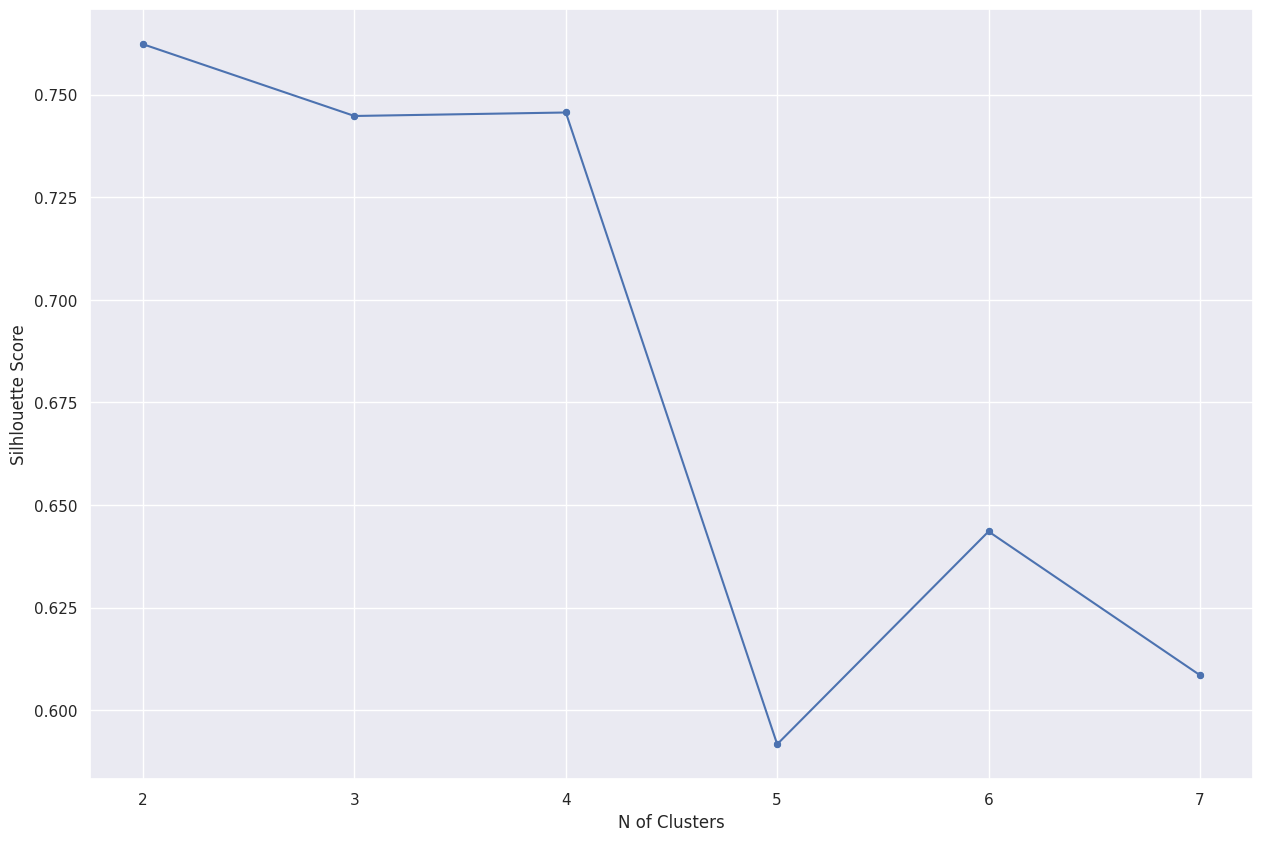

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x=k_num, y=score) # Specify x and y using keyword arguments
sns.scatterplot(x=k_num, y=score)
plt.xticks(k_num)
plt.ylabel('Silhlouette Score')
plt.xlabel('N of Clusters')
plt.show()

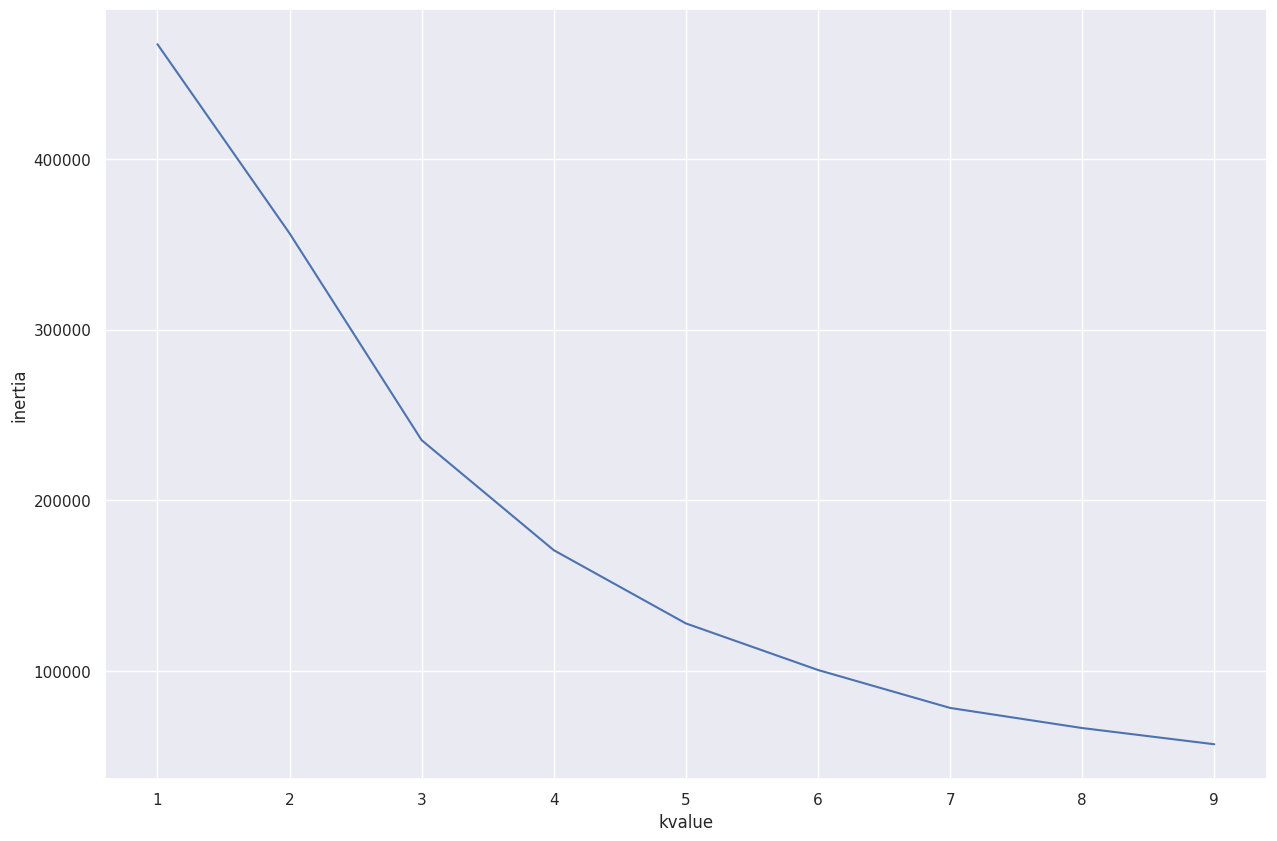

In [ ]:
k=range(1,10)
inertia=[]
plt.figure(figsize=(15,10))
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(x_pca_combine)
    inertia.append(model.inertia_)

plt.plot(k,inertia)
plt.xlabel('kvalue')
plt.ylabel('inertia')
plt.show()

Hasil dari sillhouette score diatas, menunjukan bahwa N cluster dengan score terbesar adalah 2 cluster, tetapi dalam kasus ini, kita membutuhkan lebih dari 2 cluster untuk mengelompokan konsumen agar kita dapat mendapatkan cluster yang lebih spesifik. Sehingga kita memilih cluster yang memiliki sillhouette score kedua terbesar yaitu 4 cluster. Dari hasil pemilihan 4 cluster tersebut kita dapat memberikan aktifitas marketing yang lebih tepat dan spesifik kepada setiap kelompok konsumen/cluster agar lebih efektif dan efisien.

In [ ]:
kmeans=KMeans(n_clusters=4, random_state=2020)
kmeans.fit(x_pca_combine)

KMeans(n_clusters=4, random_state=2020)

In [ ]:
x_pca_combine['cluster']=kmeans.labels_

In [ ]:
x_pca_combine['cluster']=x_pca_combine['cluster'].apply(lambda x : 'Loyal Customers' if x==3 else 'Need Atenttion' if x==1 else 'Big Spenders' if x==2 else 'Hibernating')

In [ ]:
x_combine['cluster']=kmeans.labels_

In [ ]:
x_combine['cluster']=x_combine['cluster'].apply(lambda x : 'Loyal Customers' if x==3 else 'Need Atenttion' if x==1 else 'Big Spenders' if x==2 else 'Hibernating')

In [ ]:
x_combine.groupby('cluster').mean()

order_item_id        price  freight_value  \
cluster                                                      
Big Spenders          1.094957  1054.603058      69.220671   
Hibernating           1.396119   229.131680      30.067279   
Loyal Customers       8.074713   138.357701      23.502989   
Need Atenttion        1.013016    78.033029      16.681797   

                 payment_installments  payment_sequential  payment_value  \
cluster                                                                    
Big Spenders                 7.157189            1.031116    1236.001819   
Hibernating                  5.176474            1.173776     307.215828   
Loyal Customers              1.471264            6.942529     210.348506   
Need Atenttion               2.294017            1.000556     102.788979   

                    recency  frequency  
cluster                                 
Big Spenders     230.863197   1.077790  
Hibernating      236.360641   1.327459  
Loyal Customers  269.494253   7.672414  
Need Atenttion   236.085416   1.002278

In [ ]:
x_combine['cluster'].value_counts(normalize=True)*100

cluster
Need Atenttion     78.722962
Hibernating        19.048400
Big Spenders        2.038361
Loyal Customers     0.190276
Name: proportion, dtype: float64

In [ ]:
x_pca_combine['cluster'].value_counts()

cluster
Need Atenttion     71989
Hibernating        17419
Big Spenders        1864
Loyal Customers      174
Name: count, dtype: int64

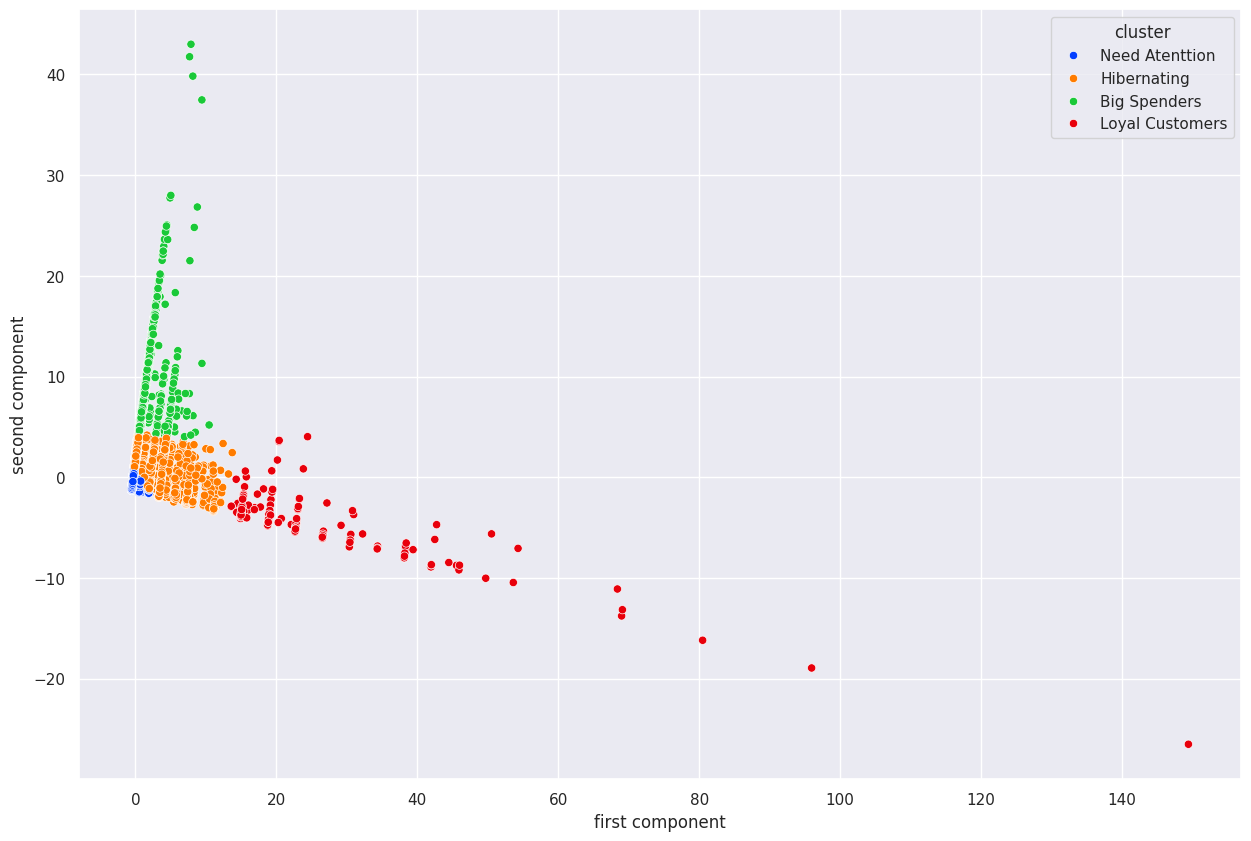

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='first component',y='second component',hue='cluster',data=x_pca_combine, palette='bright')
plt.show()

Cluster 0 : pelanggan dengan kuantitas pembelian barang rata-rata 1, dengan harga barang rata-rata rendah dan ongkir juga rendah, pembayaran dilakukan rata-rata dengan tipe pembayaran 2 sampai 3 tipe dan rata-rata dilakukan 1 kali pembayaran/cash, dan total belanja rata-rata rendah, melakukan transaksi kurang dari 8 bulan terakhir, dengan rata-rata frekuensi pembelian 1 kali. Cluster ini dapat dilihat dari daya beli dan retensi nya sangat rendah sehingga dapat direkomendasikan sebagai berikut :

Memberikan push notification dan broadcast message untuk menarik perhatian
Pemberian voucer belanja dengan minimal transaksi
Menawarkan voucer promo terbatas
Cluster 1 : pelanggan dengan kuantitas pembelian barang rata-rata 2, dengan harga barang rata-rata tinggi dan ongkir juga tinggi, pembayaran dilakukan rata-rata dengan tipe pembayaran 3 tipe dan rata-rata dilakukan 1 sampai 2 kali pembayaran, total belanja rata-rata tinggi, melakukan transaksi kurang dari 8 bulan terakhir, dan dengan rata-rata frekuensi pembelian 2 kali. Cluster ini merupakan pelanggan yang membutuhkan perhatian dimana berdasarkan tingkat frekuensi mereka sudah melakukan repeat purchase dan dari segi daya beli pun tinggi, sehingga dapat direkomendasikan sebagai berikut :

Pemberian voucer belanja dengan minimal transaksi
Pemberian voucer gratis ongkir atau potongan biaya pengiriman
Pemberian promo cicilan tanpa bunga
Cluster 2 : pelanggan dengan kuantitas pembelian barang rata-rata 1, dengan harga barang rata-rata tinggi dan ongkir juga tinggi, pembayaran dilakukan rata-rata dengan tipe pembayaran 6 sampai 7 tipe dan rata-rata dilakukan 1 kali pembayaran/cash, dan total belanja rata-rata tinggi, melakukan transaksi kurang dari 8 bulan terakhir, dengan rata-rata frekuensi pembelian 1 kali. cluster ini mempunyai daya beli yang tinggi sehingga dapat direkomendasikan sebagai berikut :

Pemberian voucer gratis ongkir atau potongan biaya pengiriman
Pemberian voucer belanja dengan minimal transaksi
Pemberian push notification dan broadcast message untuk menarik perhatian
Cluster 3 : pelanggan dengan kuantitas pembelian barang rata-rata 9, dengan harga barang rata-rata tinggi dan ongkir juga tinggi, pembayaran dilakukan rata-rata dengan tipe pembayaran 1 tipe dan rata-rata dilakukan 8 kali pembayaran, total belanja rata-rata tinggi, melakukan transaksi kurang dari 10 bulan terakhir, dan dengan rata-rata frekuensi pembelian 8 kali. Cluster ini merupakan pelanggan yang berpotensi dimana tingkat retensi nya tinggi dan daya beli nya pun tinggi sehingga dapat direkomendasikan sebagai berikut :

Menawarkan program loyalitas seperti pembagian kelompok berdasarkan frekuensi transaksi untuk mendapatkan promo menarik di setiap pengelompokan nya.
Pemberian promo cicilan tanpa bunga
Memberikan kupon spesial sebagai reward
Conclusion
Berdasarkan hasil analisis yang telah kami lakukan, terdapat permasalahan utama dari hasil cohort Analisis dimana sebagian besar atau lebih tepatnya 94% pelanggan yang telah bertransaksi di e-commerce Olist tidak melakukan pembelian berulang, maka dari itu untuk memecahkan permasalahan kami melakukan clustering menggunakan KMeans dan RFM analisis untuk Customer Segmentation, kami melakukan 4 modeling yaitu :

Clustering dengan feature data customer menggunakan KMeans, dari hasil clustering tersebut menunjukan jumlah cluster optimal nya adalah 2 dengan silhoutte score nya 0,75 tetapi pembagian 2 cluster tidak dapat mewakili segmentasi yang inginkan sehingga kita memilih jumlah cluster 5 dengan silhoutte score tertinggi kedua yaitu 0,60. kami tidak memilih model ini karena dari pembagian cluster dihasilkan dari faktor yang sama yaitu jenis data payment sehingga pembagian cluster tersebut hanya berdasarkan pengeluaran yang tinggi, sedang, dan rendah.

RFM segmentasi, RFM segmentasi terdiri dari Recency, frequency, dan Monetary, dari hasil segmentasi tersebut pembagian sudah cukup beragam yaitu terdiri dari 6 cluster dan intepretasi setiap cluster nya sudah cukup baik, tetapi penentuan segmentasinya terlalu subjective karena hasilnya bukan berdasarkan hasil algoritma tetapi hasil yang kita tentukan berdasarkan domain knowledge sehingga kita tidak dapat memvalidasi hasil segemntasi tersebut.

Clustering RFM dengan KMeans, dari hasil clustering tersebut menunjukan jumlah cluster optimal nya adalah 2 dengan silhoutte score nya 0,75 tetapi pembagian 2 cluster tidak dapat mewakili segmentasi yang inginkan sehingga kita memilih jumlah cluster 5 dengan silhoutte score tertinggi kedua yaitu lebih rendah dari 0,50. kami tidak memilih model ini karena dari pembagian cluster nya tidak adanya perbedaan yang signifikan dari setiap clusternya dapat dibuktikan dari silhoutte score nya yang rendah.

Clustering dengan feature ditambah recency dan frequency menggunakan KMeans, dari hasil clustering tersebut menunjukan jumlah cluster optimal nya adalah 4 dengan silhoutte score nya 0,76, kami memilih model ini karen dari hasil pembagian cluster nya sudah cukup baik dan karakteristik tiap clusternya berbeda sehingga model ini dapat di interpretasikan dengan jelas, didukung dengan hasil silhoutte score yang tinggi, sehingga dengan cluster ini kami dapat menentukan target segmen yang diutamakan untuk memecahkan permasalahan.

Dari hasil clustering yang kami, kami mengetahui bahwa cluster degan proporsi terbanyak yaitu 89% adalah Hibernating, sehingga cluster tersebut merupakan target segmen kami dan didukung dengan keterhubungan permasalahan hasil cohort analisis yang menunjukan 94% tidak melakukan pembelian berulang. Menurut Reichheld (1996), suatu perusahaan sangat penting untuk memuaskan dan mempertahankan pelanggan yang ada karena mencari pelanggan baru biaya nya dapat mencapai lima kali lipat lebih besar dari biaya untuk memuaskan dan mempertahankan pelanggan.

Hasil analisis kami terhadap data customer menemukan beberapa insight yang dapat di indikasikan sebagai penyebab dari permasalahan target segmen kami yaitu Hibernating, insight tersebut yaitu adanya kategori produk yang banyak diminati pelanggan tetapi bersifat produk yang tidak reapeatable sehingga dapat mewajarkan tidak adanya repurchashing dalam jangka waktu pendek, berdasarkan insight lain menunjukan bahwa rata-rata waktu pengiriman di e-commerce olist ini adalah 9 hari dan estimasi waktu pengiriman 21 hari, didukung dengan adanya insight bahwa sebesar 64% transaksi dilakukan antar negara bagian yang berarti pengiriman antar negara bagian pastinya membutuhkan waktu yang lama, sehingga jika dilihat dari insight di awal bahwa kategori produk yang popular itu wajar merupakan kategori yang bukan reapeatable karena jika kategori produk yang bersifat reapeatable seperti makanan, kecantikan, dan lain-lain membutuhkan waktu yang lama untuk menunggu produk sampai, dan pelanggan pun akan lebih memilih berbelanja langsung di offline store yang tidak memerlukan waktu yang lama untuk mendapatkan produk yang diinginkan. Hal tersebut tentunya menjadi suatu permasalahan pelanggan untuk berbelanja di e-commerce olist.

Berdasarkan analisis di atas, sesuai dengan pernyataan Reichheld bahwa mempertahankan pelanggan yang sudah ada dapat menghemat biaya yang dikeluarkan, dengan ini kami menyarankan sebelum melakukan aktivitas pemasaran seperti campaign besar dan lain-lain, perlu dilakukan perbaikan kinerja terlebih dahulu di setiap sektor permasalahan di atas, sehingga kami memberikan rekomendasi sebagai berikut :

Bekerja sama dengan jasa pengiriman atau membuat jasa pengiriman sendiri agar pengiriman lebih optimal baik itu dari segi pengiriman ataupun estimasi waktu pengiriman.
pembuatan campaign untuk meningkatkan jumlah seller di berbagai negara bagian, seperti pencerdasan peningkatan penjualan untuk para seller.
Melakukan sales promotion seperti voucer gratis ongkir untuk menarik perhatian target segmen kita karena biaya pengiriman dinilai tinggi dan cicilan tanpa bunga karena 50% pelanggan Olist melakukan cicilan.
Konsistensi untuk melakukan perubahan kearah yang lebih baik seperti membuat produk yang mempermudah pelanggan untuk berbelanja di Olist, contohnya Olist now yaitu program untuk berbelanja dengan pengiriman hanya 2 jam.
Impact yang diharapkan yaitu target segmen kami melakukan pembelian berulang tetapi dari segmentasi ini tidak dapat diukur karena data untuk melihat impact tersebut belum tersedia. kami merekomendasikan untuk melakukan analisis lebih lanjut untuk mengetahui impact nya, analisis tersebut dapat berupa A/B testing terhadap target segmen dengan membandingkan pelanggan yang diberikan perlakukan sesuai rekomendasi dan pelanggan yang tidak di berikan perlakukan apapun, sehingga dapat terlihat hasil dari rekomendasi berdampak baik dan dapat diukur.

# New Section